In [2]:
import numpy as np
from matplotlib import pyplot as plt

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from sklearn import cluster as skc
from sklearn.neighbors import KDTree
import pandas as pd
import shapely.geometry as geo
import shapely.ops as geoops
import math
import time

from demand_generator import fpca_demand_generator as dg

In [3]:
poly_join_tol = 0.00001
floor_height = 3.0

def unit_energy(landtype):
    if landtype == 'CIE':
        return 128395.1903
    elif landtype == 'MED':
        return 220923.75
    elif landtype == 'MIPS':
        return 147457.7754
    elif landtype == 'MIXED':
        return -3618.51737
    elif landtype == 'MIXRES':
        return -24523.30092
    elif landtype == 'PDR':
        return 40046.04562
    elif landtype == 'RETAIL/ENT':
        return 50559.17407
    elif landtype == 'RESIDENT':
        return -45428.08446
    elif landtype == 'VISITOR':
        return -14967.66339
    else:
        return 0

In [4]:
global dg_CIE
global dg_MED
global dg_MIPS
global dg_MIXED
global dg_MIXRES
global dg_PDR
global dg_RETAILENT
global dg_RESIDENT
global dg_VISITOR

dg_CIE = dg('hourly_demand/CIE.csv', 365, 24)
dg_CIE.calc_fpca(False, True, 150, 5, 5)
dg_CIE.distribution_est('gaussian')
dg_MED = dg('hourly_demand/MED.csv', 365, 24)
dg_MED.calc_fpca(False, True, 150, 5, 5)
dg_MED.distribution_est('gaussian')
dg_MIPS = dg('hourly_demand/MIPS.csv', 365, 24)
dg_MIPS.calc_fpca(False, True, 150, 5, 5)
dg_MIPS.distribution_est('gaussian')
dg_MIXED = dg('hourly_demand/MIXED.csv', 365, 24)
dg_MIXED.calc_fpca(False, True, 150, 5, 5)
dg_MIXED.distribution_est('gaussian')
dg_MIXRES = dg('hourly_demand/MIXRES.csv', 365, 24)
dg_MIXRES.calc_fpca(False, True, 150, 5, 5)
dg_MIXRES.distribution_est('gaussian')
dg_PDR = dg('hourly_demand/PDR.csv', 365, 24)
dg_PDR.calc_fpca(False, True, 150, 5, 5)
dg_PDR.distribution_est('gaussian')
dg_RETAILENT = dg('hourly_demand/RETAILENT.csv', 365, 24)
dg_RETAILENT.calc_fpca(False, True, 150, 5, 5)
dg_RETAILENT.distribution_est('gaussian')
dg_RESIDENT = dg('hourly_demand/RESIDENT.csv', 365, 24)
dg_RESIDENT.calc_fpca(False, True, 150, 5, 5)
dg_RESIDENT.distribution_est('gaussian')
dg_VISITOR = dg('hourly_demand/VISITOR.csv', 365, 24)
dg_VISITOR.calc_fpca(False, True, 150, 5, 5)
dg_VISITOR.distribution_est('gaussian')

#dg.calc_total_demand(365)

Initializing...
Compute Karcher Mean of 365 function in SRSF space...
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
updating step: r=6
updating step: r=7
updating step: r=8
updating step: r=9
updating step: r=10
updating step: r=11
updating step: r=12
updating step: r=13
updating step: r=14
updating step: r=15
updating step: r=16
updating step: r=17
updating step: r=18
updating step: r=19
updating step: r=20
updating step: r=21
updating step: r=22
updating step: r=23
updating step: r=24
updating step: r=25
updating step: r=26
updating step: r=27
updating step: r=28
updating step: r=29
updating step: r=30
updating step: r=31
updating step: r=32
updating step: r=33
updating step: r=34
updating step: r=35
updating step: r=36
updating step: r=37
updating step: r=38
updating step: r=39
updating step: r=40
updating step: r=41
updating step: r=42
updating step: r=43
updating step: r=44
updating step: r=45
updating step: r=46
updating step: r=47

updating step: r=25
updating step: r=26
updating step: r=27
updating step: r=28
updating step: r=29
updating step: r=30
updating step: r=31
updating step: r=32
updating step: r=33
Initializing...
Compute Karcher Mean of 365 function in SRSF space...
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
updating step: r=6
updating step: r=7
updating step: r=8
updating step: r=9
updating step: r=10
updating step: r=11
updating step: r=12
updating step: r=13
updating step: r=14
updating step: r=15
updating step: r=16
updating step: r=17
updating step: r=18
updating step: r=19
updating step: r=20
updating step: r=21
updating step: r=22
updating step: r=23
updating step: r=24
updating step: r=25
updating step: r=26
updating step: r=27
updating step: r=28
updating step: r=29
updating step: r=30
updating step: r=31
updating step: r=32
updating step: r=33
Initializing...
Compute Karcher Mean of 365 function in SRSF space...
updating step: r=1
updating s

updating step: r=149
updating step: r=150
maximal number of iterations is reached


In [5]:
def unit_energy_rnd(landtype):
    if landtype == 'CIE':
        return dg_CIE.calc_total_demand(365)
    elif landtype == 'MED':
        return dg_MED.calc_total_demand(365)
    elif landtype == 'MIPS':
        return dg_MIPS.calc_total_demand(365)
    elif landtype == 'MIXED':
        return dg_MIXED.calc_total_demand(365)
    elif landtype == 'MIXRES':
        return dg_MIXRES.calc_total_demand(365)
    elif landtype == 'PDR':
        return dg_PDR.calc_total_demand(365)
    elif landtype == 'RETAIL/ENT':
        return dg_RETAILENT.calc_total_demand(365)
    elif landtype == 'RESIDENT':
        return dg_RESIDENT.calc_total_demand(365)
    elif landtype == 'VISITOR':
        return dg_VISITOR.calc_total_demand(365)
    else:
        return 0

In [6]:
#process land use data
data_landuse = pd.read_csv('LandUse2016.csv')
print('Number of parcels in LandUse map:',len(data_landuse))

start_t = time.time()
data_shape = list(data_landuse['the_geom'])
centroid_landuse = np.empty((len(data_shape), 2))
count = 0
for shape_str in data_shape:
    shape_vec = []
    # parse vertices data
    shape_p1 = shape_str[16:-3].split(')), ((')
    for shape1 in shape_p1:
        shape_p2 = shape1.split('), (')
        for shape2 in shape_p2:
            shape_vec.append(shape2)
    coord_x = 0
    coord_y = 0
    # for each polygon, compute its centroid
    for shape in shape_vec:
        coords = shape.split(', ')
        vert = []
        for coord in coords:
            vert.append([float(coord.split(' ')[0]), float(coord.split(' ')[1])])
        poly = geo.Polygon(vert)
        coord_x += list(poly.centroid.coords)[0][0]
        coord_y += list(poly.centroid.coords)[0][1]
    # take mean of centroid of all the polygon, as centroid of this building
    centroid_landuse[count, 0] = coord_x / len(shape_vec)
    centroid_landuse[count, 1] = coord_y / len(shape_vec)
    count += 1

end_t = time.time()
time_s = (end_t - start_t)
print('Compute centroids of parcels in LandUse map:',round(time_s, 4),'s')

Number of parcels in LandUse map: 155468
Compute centroids of parcels in LandUse map: 20.2684 s


In [7]:
data_footprint = pd.read_csv('Building_Footprints.csv')
print('Number of buildings in BuildingFootprint map:',len(data_footprint))

start_t = time.time()
data_shape = list(data_footprint['shape'])
centroid_footprint = np.empty((len(data_shape), 2))
count = 0
for shape_str in data_shape:
    shape_vec = []
    # parse vertices data
    shape_p1 = shape_str[16:-3].split(')), ((')
    for shape1 in shape_p1:
        shape_p2 = shape1.split('), (')
        for shape2 in shape_p2:
            shape_vec.append(shape2)
    coord_x = 0
    coord_y = 0
    # for each polygon, compute its centroid
    for shape in shape_vec:
        coords = shape.split(', ')
        vert = []
        for coord in coords:
            vert.append([float(coord.split(' ')[0]), float(coord.split(' ')[1])])
        poly = geo.Polygon(vert)
        coord_x += list(poly.centroid.coords)[0][0]
        coord_y += list(poly.centroid.coords)[0][1]
    # take mean of centroid of all the polygon, as centroid of this building
    centroid_footprint[count, 0] = coord_x / len(shape_vec)
    centroid_footprint[count, 1] = coord_y / len(shape_vec)
    count += 1

end_t = time.time()
time_s = (end_t - start_t)
print('Compute centroids of buildings in BuildingFootprint map:',round(time_s, 4),'s')

Number of buildings in BuildingFootprint map: 177023
Compute centroids of buildings in BuildingFootprint map: 25.7869 s


In [8]:
#KDtree
start_t = time.time()
X = centroid_landuse
kdt = KDTree(X, leaf_size=30, metric='euclidean')
X2 = centroid_footprint
index=kdt.query(X2, k=1, return_distance=False)

end_t = time.time()
time_s = (end_t - start_t)
print('Mapping from BuildingFootprint to LandUse by KDTree:',round(time_s, 4),'s')

Mapping from BuildingFootprint to LandUse by KDTree: 0.6585 s


In [9]:
#merge two datafram
start_t = time.time()
data_footprint['OBJECTID']=index+1
temp = data_footprint[['hgt_meancm','OBJECTID']]
temp = temp.groupby(by=["OBJECTID"], dropna=False).mean().reset_index()
data_processed = data_landuse[['OBJECTID','BLOCK_NUM','the_geom','LANDUSE','SHAPE_Area']]
data_processed = data_processed.astype({'OBJECTID': 'int64'}).merge(temp, how='left', on='OBJECTID')
#print(data_processed.head())
data_processed = data_processed.rename(columns={'hgt_meancm':'height'})
#compute energy use for each parcel
list_landtype = list(data_processed["LANDUSE"])
list_area = list(data_processed["SHAPE_Area"])
list_height = list(data_processed["height"])
list_energy = [0] * len(data_processed)
list_energy_rnd = [0] * len(data_processed)
print('total_num:',len(data_processed))
for i in range(0, len(data_processed)):
    print('i=',i)
    uenergy = unit_energy(list_landtype[i])
    uenergy_rnd = unit_energy_rnd(list_landtype[i])
    if math.isnan(list_area[i]):
        area = 0
    else:
        area = list_area[i] * 0.09290304
    if math.isnan(list_height[i]):
        height = 0
    else:
        height = list_height[i] / 100
    tenergy = uenergy * area * height / floor_height
    tenergy_rnd = uenergy_rnd * area * height / floor_height
    list_energy[i] = tenergy
    list_energy_rnd[i] = tenergy_rnd
data_processed['energy'] = list_energy
data_processed['energy_rnd'] = list_energy_rnd

end_t = time.time()
time_s = (end_t - start_t)
print('Merge data and compute building energy usage:',round(time_s, 4),'s')
#data_processed.to_csv (r'data_processed.csv', index = False, header=True)

total_num: 155468
i= 0
i= 1
i= 2
i= 3
i= 4
i= 5
i= 6
i= 7
i= 8
i= 9
i= 10
i= 11
i= 12
i= 13
i= 14
i= 15
i= 16
i= 17
i= 18
i= 19
i= 20
i= 21
i= 22
i= 23
i= 24
i= 25
i= 26
i= 27
i= 28
i= 29
i= 30
i= 31
i= 32
i= 33
i= 34
i= 35
i= 36
i= 37
i= 38
i= 39
i= 40
i= 41
i= 42
i= 43
i= 44
i= 45
i= 46
i= 47
i= 48
i= 49
i= 50
i= 51
i= 52
i= 53
i= 54
i= 55
i= 56
i= 57
i= 58
i= 59
i= 60
i= 61
i= 62
i= 63
i= 64
i= 65
i= 66
i= 67
i= 68
i= 69
i= 70
i= 71
i= 72
i= 73
i= 74
i= 75
i= 76
i= 77
i= 78
i= 79
i= 80
i= 81
i= 82
i= 83
i= 84
i= 85
i= 86
i= 87
i= 88
i= 89
i= 90
i= 91
i= 92
i= 93
i= 94
i= 95
i= 96
i= 97
i= 98
i= 99
i= 100
i= 101
i= 102
i= 103
i= 104
i= 105
i= 106
i= 107
i= 108
i= 109
i= 110
i= 111
i= 112
i= 113
i= 114
i= 115
i= 116
i= 117
i= 118
i= 119
i= 120
i= 121
i= 122
i= 123
i= 124
i= 125
i= 126
i= 127
i= 128
i= 129
i= 130
i= 131
i= 132
i= 133
i= 134
i= 135
i= 136
i= 137
i= 138
i= 139
i= 140
i= 141
i= 142
i= 143
i= 144
i= 145
i= 146
i= 147
i= 148
i= 149
i= 150
i= 151
i= 152
i= 153
i= 154
i= 155


i= 1161
i= 1162
i= 1163
i= 1164
i= 1165
i= 1166
i= 1167
i= 1168
i= 1169
i= 1170
i= 1171
i= 1172
i= 1173
i= 1174
i= 1175
i= 1176
i= 1177
i= 1178
i= 1179
i= 1180
i= 1181
i= 1182
i= 1183
i= 1184
i= 1185
i= 1186
i= 1187
i= 1188
i= 1189
i= 1190
i= 1191
i= 1192
i= 1193
i= 1194
i= 1195
i= 1196
i= 1197
i= 1198
i= 1199
i= 1200
i= 1201
i= 1202
i= 1203
i= 1204
i= 1205
i= 1206
i= 1207
i= 1208
i= 1209
i= 1210
i= 1211
i= 1212
i= 1213
i= 1214
i= 1215
i= 1216
i= 1217
i= 1218
i= 1219
i= 1220
i= 1221
i= 1222
i= 1223
i= 1224
i= 1225
i= 1226
i= 1227
i= 1228
i= 1229
i= 1230
i= 1231
i= 1232
i= 1233
i= 1234
i= 1235
i= 1236
i= 1237
i= 1238
i= 1239
i= 1240
i= 1241
i= 1242
i= 1243
i= 1244
i= 1245
i= 1246
i= 1247
i= 1248
i= 1249
i= 1250
i= 1251
i= 1252
i= 1253
i= 1254
i= 1255
i= 1256
i= 1257
i= 1258
i= 1259
i= 1260
i= 1261
i= 1262
i= 1263
i= 1264
i= 1265
i= 1266
i= 1267
i= 1268
i= 1269
i= 1270
i= 1271
i= 1272
i= 1273
i= 1274
i= 1275
i= 1276
i= 1277
i= 1278
i= 1279
i= 1280
i= 1281
i= 1282
i= 1283
i= 1284
i= 1285


i= 2186
i= 2187
i= 2188
i= 2189
i= 2190
i= 2191
i= 2192
i= 2193
i= 2194
i= 2195
i= 2196
i= 2197
i= 2198
i= 2199
i= 2200
i= 2201
i= 2202
i= 2203
i= 2204
i= 2205
i= 2206
i= 2207
i= 2208
i= 2209
i= 2210
i= 2211
i= 2212
i= 2213
i= 2214
i= 2215
i= 2216
i= 2217
i= 2218
i= 2219
i= 2220
i= 2221
i= 2222
i= 2223
i= 2224
i= 2225
i= 2226
i= 2227
i= 2228
i= 2229
i= 2230
i= 2231
i= 2232
i= 2233
i= 2234
i= 2235
i= 2236
i= 2237
i= 2238
i= 2239
i= 2240
i= 2241
i= 2242
i= 2243
i= 2244
i= 2245
i= 2246
i= 2247
i= 2248
i= 2249
i= 2250
i= 2251
i= 2252
i= 2253
i= 2254
i= 2255
i= 2256
i= 2257
i= 2258
i= 2259
i= 2260
i= 2261
i= 2262
i= 2263
i= 2264
i= 2265
i= 2266
i= 2267
i= 2268
i= 2269
i= 2270
i= 2271
i= 2272
i= 2273
i= 2274
i= 2275
i= 2276
i= 2277
i= 2278
i= 2279
i= 2280
i= 2281
i= 2282
i= 2283
i= 2284
i= 2285
i= 2286
i= 2287
i= 2288
i= 2289
i= 2290
i= 2291
i= 2292
i= 2293
i= 2294
i= 2295
i= 2296
i= 2297
i= 2298
i= 2299
i= 2300
i= 2301
i= 2302
i= 2303
i= 2304
i= 2305
i= 2306
i= 2307
i= 2308
i= 2309
i= 2310


i= 3212
i= 3213
i= 3214
i= 3215
i= 3216
i= 3217
i= 3218
i= 3219
i= 3220
i= 3221
i= 3222
i= 3223
i= 3224
i= 3225
i= 3226
i= 3227
i= 3228
i= 3229
i= 3230
i= 3231
i= 3232
i= 3233
i= 3234
i= 3235
i= 3236
i= 3237
i= 3238
i= 3239
i= 3240
i= 3241
i= 3242
i= 3243
i= 3244
i= 3245
i= 3246
i= 3247
i= 3248
i= 3249
i= 3250
i= 3251
i= 3252
i= 3253
i= 3254
i= 3255
i= 3256
i= 3257
i= 3258
i= 3259
i= 3260
i= 3261
i= 3262
i= 3263
i= 3264
i= 3265
i= 3266
i= 3267
i= 3268
i= 3269
i= 3270
i= 3271
i= 3272
i= 3273
i= 3274
i= 3275
i= 3276
i= 3277
i= 3278
i= 3279
i= 3280
i= 3281
i= 3282
i= 3283
i= 3284
i= 3285
i= 3286
i= 3287
i= 3288
i= 3289
i= 3290
i= 3291
i= 3292
i= 3293
i= 3294
i= 3295
i= 3296
i= 3297
i= 3298
i= 3299
i= 3300
i= 3301
i= 3302
i= 3303
i= 3304
i= 3305
i= 3306
i= 3307
i= 3308
i= 3309
i= 3310
i= 3311
i= 3312
i= 3313
i= 3314
i= 3315
i= 3316
i= 3317
i= 3318
i= 3319
i= 3320
i= 3321
i= 3322
i= 3323
i= 3324
i= 3325
i= 3326
i= 3327
i= 3328
i= 3329
i= 3330
i= 3331
i= 3332
i= 3333
i= 3334
i= 3335
i= 3336


i= 4237
i= 4238
i= 4239
i= 4240
i= 4241
i= 4242
i= 4243
i= 4244
i= 4245
i= 4246
i= 4247
i= 4248
i= 4249
i= 4250
i= 4251
i= 4252
i= 4253
i= 4254
i= 4255
i= 4256
i= 4257
i= 4258
i= 4259
i= 4260
i= 4261
i= 4262
i= 4263
i= 4264
i= 4265
i= 4266
i= 4267
i= 4268
i= 4269
i= 4270
i= 4271
i= 4272
i= 4273
i= 4274
i= 4275
i= 4276
i= 4277
i= 4278
i= 4279
i= 4280
i= 4281
i= 4282
i= 4283
i= 4284
i= 4285
i= 4286
i= 4287
i= 4288
i= 4289
i= 4290
i= 4291
i= 4292
i= 4293
i= 4294
i= 4295
i= 4296
i= 4297
i= 4298
i= 4299
i= 4300
i= 4301
i= 4302
i= 4303
i= 4304
i= 4305
i= 4306
i= 4307
i= 4308
i= 4309
i= 4310
i= 4311
i= 4312
i= 4313
i= 4314
i= 4315
i= 4316
i= 4317
i= 4318
i= 4319
i= 4320
i= 4321
i= 4322
i= 4323
i= 4324
i= 4325
i= 4326
i= 4327
i= 4328
i= 4329
i= 4330
i= 4331
i= 4332
i= 4333
i= 4334
i= 4335
i= 4336
i= 4337
i= 4338
i= 4339
i= 4340
i= 4341
i= 4342
i= 4343
i= 4344
i= 4345
i= 4346
i= 4347
i= 4348
i= 4349
i= 4350
i= 4351
i= 4352
i= 4353
i= 4354
i= 4355
i= 4356
i= 4357
i= 4358
i= 4359
i= 4360
i= 4361


i= 5263
i= 5264
i= 5265
i= 5266
i= 5267
i= 5268
i= 5269
i= 5270
i= 5271
i= 5272
i= 5273
i= 5274
i= 5275
i= 5276
i= 5277
i= 5278
i= 5279
i= 5280
i= 5281
i= 5282
i= 5283
i= 5284
i= 5285
i= 5286
i= 5287
i= 5288
i= 5289
i= 5290
i= 5291
i= 5292
i= 5293
i= 5294
i= 5295
i= 5296
i= 5297
i= 5298
i= 5299
i= 5300
i= 5301
i= 5302
i= 5303
i= 5304
i= 5305
i= 5306
i= 5307
i= 5308
i= 5309
i= 5310
i= 5311
i= 5312
i= 5313
i= 5314
i= 5315
i= 5316
i= 5317
i= 5318
i= 5319
i= 5320
i= 5321
i= 5322
i= 5323
i= 5324
i= 5325
i= 5326
i= 5327
i= 5328
i= 5329
i= 5330
i= 5331
i= 5332
i= 5333
i= 5334
i= 5335
i= 5336
i= 5337
i= 5338
i= 5339
i= 5340
i= 5341
i= 5342
i= 5343
i= 5344
i= 5345
i= 5346
i= 5347
i= 5348
i= 5349
i= 5350
i= 5351
i= 5352
i= 5353
i= 5354
i= 5355
i= 5356
i= 5357
i= 5358
i= 5359
i= 5360
i= 5361
i= 5362
i= 5363
i= 5364
i= 5365
i= 5366
i= 5367
i= 5368
i= 5369
i= 5370
i= 5371
i= 5372
i= 5373
i= 5374
i= 5375
i= 5376
i= 5377
i= 5378
i= 5379
i= 5380
i= 5381
i= 5382
i= 5383
i= 5384
i= 5385
i= 5386
i= 5387


i= 6288
i= 6289
i= 6290
i= 6291
i= 6292
i= 6293
i= 6294
i= 6295
i= 6296
i= 6297
i= 6298
i= 6299
i= 6300
i= 6301
i= 6302
i= 6303
i= 6304
i= 6305
i= 6306
i= 6307
i= 6308
i= 6309
i= 6310
i= 6311
i= 6312
i= 6313
i= 6314
i= 6315
i= 6316
i= 6317
i= 6318
i= 6319
i= 6320
i= 6321
i= 6322
i= 6323
i= 6324
i= 6325
i= 6326
i= 6327
i= 6328
i= 6329
i= 6330
i= 6331
i= 6332
i= 6333
i= 6334
i= 6335
i= 6336
i= 6337
i= 6338
i= 6339
i= 6340
i= 6341
i= 6342
i= 6343
i= 6344
i= 6345
i= 6346
i= 6347
i= 6348
i= 6349
i= 6350
i= 6351
i= 6352
i= 6353
i= 6354
i= 6355
i= 6356
i= 6357
i= 6358
i= 6359
i= 6360
i= 6361
i= 6362
i= 6363
i= 6364
i= 6365
i= 6366
i= 6367
i= 6368
i= 6369
i= 6370
i= 6371
i= 6372
i= 6373
i= 6374
i= 6375
i= 6376
i= 6377
i= 6378
i= 6379
i= 6380
i= 6381
i= 6382
i= 6383
i= 6384
i= 6385
i= 6386
i= 6387
i= 6388
i= 6389
i= 6390
i= 6391
i= 6392
i= 6393
i= 6394
i= 6395
i= 6396
i= 6397
i= 6398
i= 6399
i= 6400
i= 6401
i= 6402
i= 6403
i= 6404
i= 6405
i= 6406
i= 6407
i= 6408
i= 6409
i= 6410
i= 6411
i= 6412


i= 7313
i= 7314
i= 7315
i= 7316
i= 7317
i= 7318
i= 7319
i= 7320
i= 7321
i= 7322
i= 7323
i= 7324
i= 7325
i= 7326
i= 7327
i= 7328
i= 7329
i= 7330
i= 7331
i= 7332
i= 7333
i= 7334
i= 7335
i= 7336
i= 7337
i= 7338
i= 7339
i= 7340
i= 7341
i= 7342
i= 7343
i= 7344
i= 7345
i= 7346
i= 7347
i= 7348
i= 7349
i= 7350
i= 7351
i= 7352
i= 7353
i= 7354
i= 7355
i= 7356
i= 7357
i= 7358
i= 7359
i= 7360
i= 7361
i= 7362
i= 7363
i= 7364
i= 7365
i= 7366
i= 7367
i= 7368
i= 7369
i= 7370
i= 7371
i= 7372
i= 7373
i= 7374
i= 7375
i= 7376
i= 7377
i= 7378
i= 7379
i= 7380
i= 7381
i= 7382
i= 7383
i= 7384
i= 7385
i= 7386
i= 7387
i= 7388
i= 7389
i= 7390
i= 7391
i= 7392
i= 7393
i= 7394
i= 7395
i= 7396
i= 7397
i= 7398
i= 7399
i= 7400
i= 7401
i= 7402
i= 7403
i= 7404
i= 7405
i= 7406
i= 7407
i= 7408
i= 7409
i= 7410
i= 7411
i= 7412
i= 7413
i= 7414
i= 7415
i= 7416
i= 7417
i= 7418
i= 7419
i= 7420
i= 7421
i= 7422
i= 7423
i= 7424
i= 7425
i= 7426
i= 7427
i= 7428
i= 7429
i= 7430
i= 7431
i= 7432
i= 7433
i= 7434
i= 7435
i= 7436
i= 7437


i= 8338
i= 8339
i= 8340
i= 8341
i= 8342
i= 8343
i= 8344
i= 8345
i= 8346
i= 8347
i= 8348
i= 8349
i= 8350
i= 8351
i= 8352
i= 8353
i= 8354
i= 8355
i= 8356
i= 8357
i= 8358
i= 8359
i= 8360
i= 8361
i= 8362
i= 8363
i= 8364
i= 8365
i= 8366
i= 8367
i= 8368
i= 8369
i= 8370
i= 8371
i= 8372
i= 8373
i= 8374
i= 8375
i= 8376
i= 8377
i= 8378
i= 8379
i= 8380
i= 8381
i= 8382
i= 8383
i= 8384
i= 8385
i= 8386
i= 8387
i= 8388
i= 8389
i= 8390
i= 8391
i= 8392
i= 8393
i= 8394
i= 8395
i= 8396
i= 8397
i= 8398
i= 8399
i= 8400
i= 8401
i= 8402
i= 8403
i= 8404
i= 8405
i= 8406
i= 8407
i= 8408
i= 8409
i= 8410
i= 8411
i= 8412
i= 8413
i= 8414
i= 8415
i= 8416
i= 8417
i= 8418
i= 8419
i= 8420
i= 8421
i= 8422
i= 8423
i= 8424
i= 8425
i= 8426
i= 8427
i= 8428
i= 8429
i= 8430
i= 8431
i= 8432
i= 8433
i= 8434
i= 8435
i= 8436
i= 8437
i= 8438
i= 8439
i= 8440
i= 8441
i= 8442
i= 8443
i= 8444
i= 8445
i= 8446
i= 8447
i= 8448
i= 8449
i= 8450
i= 8451
i= 8452
i= 8453
i= 8454
i= 8455
i= 8456
i= 8457
i= 8458
i= 8459
i= 8460
i= 8461
i= 8462


i= 9364
i= 9365
i= 9366
i= 9367
i= 9368
i= 9369
i= 9370
i= 9371
i= 9372
i= 9373
i= 9374
i= 9375
i= 9376
i= 9377
i= 9378
i= 9379
i= 9380
i= 9381
i= 9382
i= 9383
i= 9384
i= 9385
i= 9386
i= 9387
i= 9388
i= 9389
i= 9390
i= 9391
i= 9392
i= 9393
i= 9394
i= 9395
i= 9396
i= 9397
i= 9398
i= 9399
i= 9400
i= 9401
i= 9402
i= 9403
i= 9404
i= 9405
i= 9406
i= 9407
i= 9408
i= 9409
i= 9410
i= 9411
i= 9412
i= 9413
i= 9414
i= 9415
i= 9416
i= 9417
i= 9418
i= 9419
i= 9420
i= 9421
i= 9422
i= 9423
i= 9424
i= 9425
i= 9426
i= 9427
i= 9428
i= 9429
i= 9430
i= 9431
i= 9432
i= 9433
i= 9434
i= 9435
i= 9436
i= 9437
i= 9438
i= 9439
i= 9440
i= 9441
i= 9442
i= 9443
i= 9444
i= 9445
i= 9446
i= 9447
i= 9448
i= 9449
i= 9450
i= 9451
i= 9452
i= 9453
i= 9454
i= 9455
i= 9456
i= 9457
i= 9458
i= 9459
i= 9460
i= 9461
i= 9462
i= 9463
i= 9464
i= 9465
i= 9466
i= 9467
i= 9468
i= 9469
i= 9470
i= 9471
i= 9472
i= 9473
i= 9474
i= 9475
i= 9476
i= 9477
i= 9478
i= 9479
i= 9480
i= 9481
i= 9482
i= 9483
i= 9484
i= 9485
i= 9486
i= 9487
i= 9488


i= 10345
i= 10346
i= 10347
i= 10348
i= 10349
i= 10350
i= 10351
i= 10352
i= 10353
i= 10354
i= 10355
i= 10356
i= 10357
i= 10358
i= 10359
i= 10360
i= 10361
i= 10362
i= 10363
i= 10364
i= 10365
i= 10366
i= 10367
i= 10368
i= 10369
i= 10370
i= 10371
i= 10372
i= 10373
i= 10374
i= 10375
i= 10376
i= 10377
i= 10378
i= 10379
i= 10380
i= 10381
i= 10382
i= 10383
i= 10384
i= 10385
i= 10386
i= 10387
i= 10388
i= 10389
i= 10390
i= 10391
i= 10392
i= 10393
i= 10394
i= 10395
i= 10396
i= 10397
i= 10398
i= 10399
i= 10400
i= 10401
i= 10402
i= 10403
i= 10404
i= 10405
i= 10406
i= 10407
i= 10408
i= 10409
i= 10410
i= 10411
i= 10412
i= 10413
i= 10414
i= 10415
i= 10416
i= 10417
i= 10418
i= 10419
i= 10420
i= 10421
i= 10422
i= 10423
i= 10424
i= 10425
i= 10426
i= 10427
i= 10428
i= 10429
i= 10430
i= 10431
i= 10432
i= 10433
i= 10434
i= 10435
i= 10436
i= 10437
i= 10438
i= 10439
i= 10440
i= 10441
i= 10442
i= 10443
i= 10444
i= 10445
i= 10446
i= 10447
i= 10448
i= 10449
i= 10450
i= 10451
i= 10452
i= 10453
i= 10454
i= 10455
i

i= 11256
i= 11257
i= 11258
i= 11259
i= 11260
i= 11261
i= 11262
i= 11263
i= 11264
i= 11265
i= 11266
i= 11267
i= 11268
i= 11269
i= 11270
i= 11271
i= 11272
i= 11273
i= 11274
i= 11275
i= 11276
i= 11277
i= 11278
i= 11279
i= 11280
i= 11281
i= 11282
i= 11283
i= 11284
i= 11285
i= 11286
i= 11287
i= 11288
i= 11289
i= 11290
i= 11291
i= 11292
i= 11293
i= 11294
i= 11295
i= 11296
i= 11297
i= 11298
i= 11299
i= 11300
i= 11301
i= 11302
i= 11303
i= 11304
i= 11305
i= 11306
i= 11307
i= 11308
i= 11309
i= 11310
i= 11311
i= 11312
i= 11313
i= 11314
i= 11315
i= 11316
i= 11317
i= 11318
i= 11319
i= 11320
i= 11321
i= 11322
i= 11323
i= 11324
i= 11325
i= 11326
i= 11327
i= 11328
i= 11329
i= 11330
i= 11331
i= 11332
i= 11333
i= 11334
i= 11335
i= 11336
i= 11337
i= 11338
i= 11339
i= 11340
i= 11341
i= 11342
i= 11343
i= 11344
i= 11345
i= 11346
i= 11347
i= 11348
i= 11349
i= 11350
i= 11351
i= 11352
i= 11353
i= 11354
i= 11355
i= 11356
i= 11357
i= 11358
i= 11359
i= 11360
i= 11361
i= 11362
i= 11363
i= 11364
i= 11365
i= 11366
i

i= 12167
i= 12168
i= 12169
i= 12170
i= 12171
i= 12172
i= 12173
i= 12174
i= 12175
i= 12176
i= 12177
i= 12178
i= 12179
i= 12180
i= 12181
i= 12182
i= 12183
i= 12184
i= 12185
i= 12186
i= 12187
i= 12188
i= 12189
i= 12190
i= 12191
i= 12192
i= 12193
i= 12194
i= 12195
i= 12196
i= 12197
i= 12198
i= 12199
i= 12200
i= 12201
i= 12202
i= 12203
i= 12204
i= 12205
i= 12206
i= 12207
i= 12208
i= 12209
i= 12210
i= 12211
i= 12212
i= 12213
i= 12214
i= 12215
i= 12216
i= 12217
i= 12218
i= 12219
i= 12220
i= 12221
i= 12222
i= 12223
i= 12224
i= 12225
i= 12226
i= 12227
i= 12228
i= 12229
i= 12230
i= 12231
i= 12232
i= 12233
i= 12234
i= 12235
i= 12236
i= 12237
i= 12238
i= 12239
i= 12240
i= 12241
i= 12242
i= 12243
i= 12244
i= 12245
i= 12246
i= 12247
i= 12248
i= 12249
i= 12250
i= 12251
i= 12252
i= 12253
i= 12254
i= 12255
i= 12256
i= 12257
i= 12258
i= 12259
i= 12260
i= 12261
i= 12262
i= 12263
i= 12264
i= 12265
i= 12266
i= 12267
i= 12268
i= 12269
i= 12270
i= 12271
i= 12272
i= 12273
i= 12274
i= 12275
i= 12276
i= 12277
i

i= 13078
i= 13079
i= 13080
i= 13081
i= 13082
i= 13083
i= 13084
i= 13085
i= 13086
i= 13087
i= 13088
i= 13089
i= 13090
i= 13091
i= 13092
i= 13093
i= 13094
i= 13095
i= 13096
i= 13097
i= 13098
i= 13099
i= 13100
i= 13101
i= 13102
i= 13103
i= 13104
i= 13105
i= 13106
i= 13107
i= 13108
i= 13109
i= 13110
i= 13111
i= 13112
i= 13113
i= 13114
i= 13115
i= 13116
i= 13117
i= 13118
i= 13119
i= 13120
i= 13121
i= 13122
i= 13123
i= 13124
i= 13125
i= 13126
i= 13127
i= 13128
i= 13129
i= 13130
i= 13131
i= 13132
i= 13133
i= 13134
i= 13135
i= 13136
i= 13137
i= 13138
i= 13139
i= 13140
i= 13141
i= 13142
i= 13143
i= 13144
i= 13145
i= 13146
i= 13147
i= 13148
i= 13149
i= 13150
i= 13151
i= 13152
i= 13153
i= 13154
i= 13155
i= 13156
i= 13157
i= 13158
i= 13159
i= 13160
i= 13161
i= 13162
i= 13163
i= 13164
i= 13165
i= 13166
i= 13167
i= 13168
i= 13169
i= 13170
i= 13171
i= 13172
i= 13173
i= 13174
i= 13175
i= 13176
i= 13177
i= 13178
i= 13179
i= 13180
i= 13181
i= 13182
i= 13183
i= 13184
i= 13185
i= 13186
i= 13187
i= 13188
i

i= 13989
i= 13990
i= 13991
i= 13992
i= 13993
i= 13994
i= 13995
i= 13996
i= 13997
i= 13998
i= 13999
i= 14000
i= 14001
i= 14002
i= 14003
i= 14004
i= 14005
i= 14006
i= 14007
i= 14008
i= 14009
i= 14010
i= 14011
i= 14012
i= 14013
i= 14014
i= 14015
i= 14016
i= 14017
i= 14018
i= 14019
i= 14020
i= 14021
i= 14022
i= 14023
i= 14024
i= 14025
i= 14026
i= 14027
i= 14028
i= 14029
i= 14030
i= 14031
i= 14032
i= 14033
i= 14034
i= 14035
i= 14036
i= 14037
i= 14038
i= 14039
i= 14040
i= 14041
i= 14042
i= 14043
i= 14044
i= 14045
i= 14046
i= 14047
i= 14048
i= 14049
i= 14050
i= 14051
i= 14052
i= 14053
i= 14054
i= 14055
i= 14056
i= 14057
i= 14058
i= 14059
i= 14060
i= 14061
i= 14062
i= 14063
i= 14064
i= 14065
i= 14066
i= 14067
i= 14068
i= 14069
i= 14070
i= 14071
i= 14072
i= 14073
i= 14074
i= 14075
i= 14076
i= 14077
i= 14078
i= 14079
i= 14080
i= 14081
i= 14082
i= 14083
i= 14084
i= 14085
i= 14086
i= 14087
i= 14088
i= 14089
i= 14090
i= 14091
i= 14092
i= 14093
i= 14094
i= 14095
i= 14096
i= 14097
i= 14098
i= 14099
i

i= 14901
i= 14902
i= 14903
i= 14904
i= 14905
i= 14906
i= 14907
i= 14908
i= 14909
i= 14910
i= 14911
i= 14912
i= 14913
i= 14914
i= 14915
i= 14916
i= 14917
i= 14918
i= 14919
i= 14920
i= 14921
i= 14922
i= 14923
i= 14924
i= 14925
i= 14926
i= 14927
i= 14928
i= 14929
i= 14930
i= 14931
i= 14932
i= 14933
i= 14934
i= 14935
i= 14936
i= 14937
i= 14938
i= 14939
i= 14940
i= 14941
i= 14942
i= 14943
i= 14944
i= 14945
i= 14946
i= 14947
i= 14948
i= 14949
i= 14950
i= 14951
i= 14952
i= 14953
i= 14954
i= 14955
i= 14956
i= 14957
i= 14958
i= 14959
i= 14960
i= 14961
i= 14962
i= 14963
i= 14964
i= 14965
i= 14966
i= 14967
i= 14968
i= 14969
i= 14970
i= 14971
i= 14972
i= 14973
i= 14974
i= 14975
i= 14976
i= 14977
i= 14978
i= 14979
i= 14980
i= 14981
i= 14982
i= 14983
i= 14984
i= 14985
i= 14986
i= 14987
i= 14988
i= 14989
i= 14990
i= 14991
i= 14992
i= 14993
i= 14994
i= 14995
i= 14996
i= 14997
i= 14998
i= 14999
i= 15000
i= 15001
i= 15002
i= 15003
i= 15004
i= 15005
i= 15006
i= 15007
i= 15008
i= 15009
i= 15010
i= 15011
i

i= 15813
i= 15814
i= 15815
i= 15816
i= 15817
i= 15818
i= 15819
i= 15820
i= 15821
i= 15822
i= 15823
i= 15824
i= 15825
i= 15826
i= 15827
i= 15828
i= 15829
i= 15830
i= 15831
i= 15832
i= 15833
i= 15834
i= 15835
i= 15836
i= 15837
i= 15838
i= 15839
i= 15840
i= 15841
i= 15842
i= 15843
i= 15844
i= 15845
i= 15846
i= 15847
i= 15848
i= 15849
i= 15850
i= 15851
i= 15852
i= 15853
i= 15854
i= 15855
i= 15856
i= 15857
i= 15858
i= 15859
i= 15860
i= 15861
i= 15862
i= 15863
i= 15864
i= 15865
i= 15866
i= 15867
i= 15868
i= 15869
i= 15870
i= 15871
i= 15872
i= 15873
i= 15874
i= 15875
i= 15876
i= 15877
i= 15878
i= 15879
i= 15880
i= 15881
i= 15882
i= 15883
i= 15884
i= 15885
i= 15886
i= 15887
i= 15888
i= 15889
i= 15890
i= 15891
i= 15892
i= 15893
i= 15894
i= 15895
i= 15896
i= 15897
i= 15898
i= 15899
i= 15900
i= 15901
i= 15902
i= 15903
i= 15904
i= 15905
i= 15906
i= 15907
i= 15908
i= 15909
i= 15910
i= 15911
i= 15912
i= 15913
i= 15914
i= 15915
i= 15916
i= 15917
i= 15918
i= 15919
i= 15920
i= 15921
i= 15922
i= 15923
i

i= 16724
i= 16725
i= 16726
i= 16727
i= 16728
i= 16729
i= 16730
i= 16731
i= 16732
i= 16733
i= 16734
i= 16735
i= 16736
i= 16737
i= 16738
i= 16739
i= 16740
i= 16741
i= 16742
i= 16743
i= 16744
i= 16745
i= 16746
i= 16747
i= 16748
i= 16749
i= 16750
i= 16751
i= 16752
i= 16753
i= 16754
i= 16755
i= 16756
i= 16757
i= 16758
i= 16759
i= 16760
i= 16761
i= 16762
i= 16763
i= 16764
i= 16765
i= 16766
i= 16767
i= 16768
i= 16769
i= 16770
i= 16771
i= 16772
i= 16773
i= 16774
i= 16775
i= 16776
i= 16777
i= 16778
i= 16779
i= 16780
i= 16781
i= 16782
i= 16783
i= 16784
i= 16785
i= 16786
i= 16787
i= 16788
i= 16789
i= 16790
i= 16791
i= 16792
i= 16793
i= 16794
i= 16795
i= 16796
i= 16797
i= 16798
i= 16799
i= 16800
i= 16801
i= 16802
i= 16803
i= 16804
i= 16805
i= 16806
i= 16807
i= 16808
i= 16809
i= 16810
i= 16811
i= 16812
i= 16813
i= 16814
i= 16815
i= 16816
i= 16817
i= 16818
i= 16819
i= 16820
i= 16821
i= 16822
i= 16823
i= 16824
i= 16825
i= 16826
i= 16827
i= 16828
i= 16829
i= 16830
i= 16831
i= 16832
i= 16833
i= 16834
i

i= 17636
i= 17637
i= 17638
i= 17639
i= 17640
i= 17641
i= 17642
i= 17643
i= 17644
i= 17645
i= 17646
i= 17647
i= 17648
i= 17649
i= 17650
i= 17651
i= 17652
i= 17653
i= 17654
i= 17655
i= 17656
i= 17657
i= 17658
i= 17659
i= 17660
i= 17661
i= 17662
i= 17663
i= 17664
i= 17665
i= 17666
i= 17667
i= 17668
i= 17669
i= 17670
i= 17671
i= 17672
i= 17673
i= 17674
i= 17675
i= 17676
i= 17677
i= 17678
i= 17679
i= 17680
i= 17681
i= 17682
i= 17683
i= 17684
i= 17685
i= 17686
i= 17687
i= 17688
i= 17689
i= 17690
i= 17691
i= 17692
i= 17693
i= 17694
i= 17695
i= 17696
i= 17697
i= 17698
i= 17699
i= 17700
i= 17701
i= 17702
i= 17703
i= 17704
i= 17705
i= 17706
i= 17707
i= 17708
i= 17709
i= 17710
i= 17711
i= 17712
i= 17713
i= 17714
i= 17715
i= 17716
i= 17717
i= 17718
i= 17719
i= 17720
i= 17721
i= 17722
i= 17723
i= 17724
i= 17725
i= 17726
i= 17727
i= 17728
i= 17729
i= 17730
i= 17731
i= 17732
i= 17733
i= 17734
i= 17735
i= 17736
i= 17737
i= 17738
i= 17739
i= 17740
i= 17741
i= 17742
i= 17743
i= 17744
i= 17745
i= 17746
i

i= 18548
i= 18549
i= 18550
i= 18551
i= 18552
i= 18553
i= 18554
i= 18555
i= 18556
i= 18557
i= 18558
i= 18559
i= 18560
i= 18561
i= 18562
i= 18563
i= 18564
i= 18565
i= 18566
i= 18567
i= 18568
i= 18569
i= 18570
i= 18571
i= 18572
i= 18573
i= 18574
i= 18575
i= 18576
i= 18577
i= 18578
i= 18579
i= 18580
i= 18581
i= 18582
i= 18583
i= 18584
i= 18585
i= 18586
i= 18587
i= 18588
i= 18589
i= 18590
i= 18591
i= 18592
i= 18593
i= 18594
i= 18595
i= 18596
i= 18597
i= 18598
i= 18599
i= 18600
i= 18601
i= 18602
i= 18603
i= 18604
i= 18605
i= 18606
i= 18607
i= 18608
i= 18609
i= 18610
i= 18611
i= 18612
i= 18613
i= 18614
i= 18615
i= 18616
i= 18617
i= 18618
i= 18619
i= 18620
i= 18621
i= 18622
i= 18623
i= 18624
i= 18625
i= 18626
i= 18627
i= 18628
i= 18629
i= 18630
i= 18631
i= 18632
i= 18633
i= 18634
i= 18635
i= 18636
i= 18637
i= 18638
i= 18639
i= 18640
i= 18641
i= 18642
i= 18643
i= 18644
i= 18645
i= 18646
i= 18647
i= 18648
i= 18649
i= 18650
i= 18651
i= 18652
i= 18653
i= 18654
i= 18655
i= 18656
i= 18657
i= 18658
i

i= 19459
i= 19460
i= 19461
i= 19462
i= 19463
i= 19464
i= 19465
i= 19466
i= 19467
i= 19468
i= 19469
i= 19470
i= 19471
i= 19472
i= 19473
i= 19474
i= 19475
i= 19476
i= 19477
i= 19478
i= 19479
i= 19480
i= 19481
i= 19482
i= 19483
i= 19484
i= 19485
i= 19486
i= 19487
i= 19488
i= 19489
i= 19490
i= 19491
i= 19492
i= 19493
i= 19494
i= 19495
i= 19496
i= 19497
i= 19498
i= 19499
i= 19500
i= 19501
i= 19502
i= 19503
i= 19504
i= 19505
i= 19506
i= 19507
i= 19508
i= 19509
i= 19510
i= 19511
i= 19512
i= 19513
i= 19514
i= 19515
i= 19516
i= 19517
i= 19518
i= 19519
i= 19520
i= 19521
i= 19522
i= 19523
i= 19524
i= 19525
i= 19526
i= 19527
i= 19528
i= 19529
i= 19530
i= 19531
i= 19532
i= 19533
i= 19534
i= 19535
i= 19536
i= 19537
i= 19538
i= 19539
i= 19540
i= 19541
i= 19542
i= 19543
i= 19544
i= 19545
i= 19546
i= 19547
i= 19548
i= 19549
i= 19550
i= 19551
i= 19552
i= 19553
i= 19554
i= 19555
i= 19556
i= 19557
i= 19558
i= 19559
i= 19560
i= 19561
i= 19562
i= 19563
i= 19564
i= 19565
i= 19566
i= 19567
i= 19568
i= 19569
i

i= 20370
i= 20371
i= 20372
i= 20373
i= 20374
i= 20375
i= 20376
i= 20377
i= 20378
i= 20379
i= 20380
i= 20381
i= 20382
i= 20383
i= 20384
i= 20385
i= 20386
i= 20387
i= 20388
i= 20389
i= 20390
i= 20391
i= 20392
i= 20393
i= 20394
i= 20395
i= 20396
i= 20397
i= 20398
i= 20399
i= 20400
i= 20401
i= 20402
i= 20403
i= 20404
i= 20405
i= 20406
i= 20407
i= 20408
i= 20409
i= 20410
i= 20411
i= 20412
i= 20413
i= 20414
i= 20415
i= 20416
i= 20417
i= 20418
i= 20419
i= 20420
i= 20421
i= 20422
i= 20423
i= 20424
i= 20425
i= 20426
i= 20427
i= 20428
i= 20429
i= 20430
i= 20431
i= 20432
i= 20433
i= 20434
i= 20435
i= 20436
i= 20437
i= 20438
i= 20439
i= 20440
i= 20441
i= 20442
i= 20443
i= 20444
i= 20445
i= 20446
i= 20447
i= 20448
i= 20449
i= 20450
i= 20451
i= 20452
i= 20453
i= 20454
i= 20455
i= 20456
i= 20457
i= 20458
i= 20459
i= 20460
i= 20461
i= 20462
i= 20463
i= 20464
i= 20465
i= 20466
i= 20467
i= 20468
i= 20469
i= 20470
i= 20471
i= 20472
i= 20473
i= 20474
i= 20475
i= 20476
i= 20477
i= 20478
i= 20479
i= 20480
i

i= 21281
i= 21282
i= 21283
i= 21284
i= 21285
i= 21286
i= 21287
i= 21288
i= 21289
i= 21290
i= 21291
i= 21292
i= 21293
i= 21294
i= 21295
i= 21296
i= 21297
i= 21298
i= 21299
i= 21300
i= 21301
i= 21302
i= 21303
i= 21304
i= 21305
i= 21306
i= 21307
i= 21308
i= 21309
i= 21310
i= 21311
i= 21312
i= 21313
i= 21314
i= 21315
i= 21316
i= 21317
i= 21318
i= 21319
i= 21320
i= 21321
i= 21322
i= 21323
i= 21324
i= 21325
i= 21326
i= 21327
i= 21328
i= 21329
i= 21330
i= 21331
i= 21332
i= 21333
i= 21334
i= 21335
i= 21336
i= 21337
i= 21338
i= 21339
i= 21340
i= 21341
i= 21342
i= 21343
i= 21344
i= 21345
i= 21346
i= 21347
i= 21348
i= 21349
i= 21350
i= 21351
i= 21352
i= 21353
i= 21354
i= 21355
i= 21356
i= 21357
i= 21358
i= 21359
i= 21360
i= 21361
i= 21362
i= 21363
i= 21364
i= 21365
i= 21366
i= 21367
i= 21368
i= 21369
i= 21370
i= 21371
i= 21372
i= 21373
i= 21374
i= 21375
i= 21376
i= 21377
i= 21378
i= 21379
i= 21380
i= 21381
i= 21382
i= 21383
i= 21384
i= 21385
i= 21386
i= 21387
i= 21388
i= 21389
i= 21390
i= 21391
i

i= 22193
i= 22194
i= 22195
i= 22196
i= 22197
i= 22198
i= 22199
i= 22200
i= 22201
i= 22202
i= 22203
i= 22204
i= 22205
i= 22206
i= 22207
i= 22208
i= 22209
i= 22210
i= 22211
i= 22212
i= 22213
i= 22214
i= 22215
i= 22216
i= 22217
i= 22218
i= 22219
i= 22220
i= 22221
i= 22222
i= 22223
i= 22224
i= 22225
i= 22226
i= 22227
i= 22228
i= 22229
i= 22230
i= 22231
i= 22232
i= 22233
i= 22234
i= 22235
i= 22236
i= 22237
i= 22238
i= 22239
i= 22240
i= 22241
i= 22242
i= 22243
i= 22244
i= 22245
i= 22246
i= 22247
i= 22248
i= 22249
i= 22250
i= 22251
i= 22252
i= 22253
i= 22254
i= 22255
i= 22256
i= 22257
i= 22258
i= 22259
i= 22260
i= 22261
i= 22262
i= 22263
i= 22264
i= 22265
i= 22266
i= 22267
i= 22268
i= 22269
i= 22270
i= 22271
i= 22272
i= 22273
i= 22274
i= 22275
i= 22276
i= 22277
i= 22278
i= 22279
i= 22280
i= 22281
i= 22282
i= 22283
i= 22284
i= 22285
i= 22286
i= 22287
i= 22288
i= 22289
i= 22290
i= 22291
i= 22292
i= 22293
i= 22294
i= 22295
i= 22296
i= 22297
i= 22298
i= 22299
i= 22300
i= 22301
i= 22302
i= 22303
i

i= 23105
i= 23106
i= 23107
i= 23108
i= 23109
i= 23110
i= 23111
i= 23112
i= 23113
i= 23114
i= 23115
i= 23116
i= 23117
i= 23118
i= 23119
i= 23120
i= 23121
i= 23122
i= 23123
i= 23124
i= 23125
i= 23126
i= 23127
i= 23128
i= 23129
i= 23130
i= 23131
i= 23132
i= 23133
i= 23134
i= 23135
i= 23136
i= 23137
i= 23138
i= 23139
i= 23140
i= 23141
i= 23142
i= 23143
i= 23144
i= 23145
i= 23146
i= 23147
i= 23148
i= 23149
i= 23150
i= 23151
i= 23152
i= 23153
i= 23154
i= 23155
i= 23156
i= 23157
i= 23158
i= 23159
i= 23160
i= 23161
i= 23162
i= 23163
i= 23164
i= 23165
i= 23166
i= 23167
i= 23168
i= 23169
i= 23170
i= 23171
i= 23172
i= 23173
i= 23174
i= 23175
i= 23176
i= 23177
i= 23178
i= 23179
i= 23180
i= 23181
i= 23182
i= 23183
i= 23184
i= 23185
i= 23186
i= 23187
i= 23188
i= 23189
i= 23190
i= 23191
i= 23192
i= 23193
i= 23194
i= 23195
i= 23196
i= 23197
i= 23198
i= 23199
i= 23200
i= 23201
i= 23202
i= 23203
i= 23204
i= 23205
i= 23206
i= 23207
i= 23208
i= 23209
i= 23210
i= 23211
i= 23212
i= 23213
i= 23214
i= 23215
i

i= 24016
i= 24017
i= 24018
i= 24019
i= 24020
i= 24021
i= 24022
i= 24023
i= 24024
i= 24025
i= 24026
i= 24027
i= 24028
i= 24029
i= 24030
i= 24031
i= 24032
i= 24033
i= 24034
i= 24035
i= 24036
i= 24037
i= 24038
i= 24039
i= 24040
i= 24041
i= 24042
i= 24043
i= 24044
i= 24045
i= 24046
i= 24047
i= 24048
i= 24049
i= 24050
i= 24051
i= 24052
i= 24053
i= 24054
i= 24055
i= 24056
i= 24057
i= 24058
i= 24059
i= 24060
i= 24061
i= 24062
i= 24063
i= 24064
i= 24065
i= 24066
i= 24067
i= 24068
i= 24069
i= 24070
i= 24071
i= 24072
i= 24073
i= 24074
i= 24075
i= 24076
i= 24077
i= 24078
i= 24079
i= 24080
i= 24081
i= 24082
i= 24083
i= 24084
i= 24085
i= 24086
i= 24087
i= 24088
i= 24089
i= 24090
i= 24091
i= 24092
i= 24093
i= 24094
i= 24095
i= 24096
i= 24097
i= 24098
i= 24099
i= 24100
i= 24101
i= 24102
i= 24103
i= 24104
i= 24105
i= 24106
i= 24107
i= 24108
i= 24109
i= 24110
i= 24111
i= 24112
i= 24113
i= 24114
i= 24115
i= 24116
i= 24117
i= 24118
i= 24119
i= 24120
i= 24121
i= 24122
i= 24123
i= 24124
i= 24125
i= 24126
i

i= 24929
i= 24930
i= 24931
i= 24932
i= 24933
i= 24934
i= 24935
i= 24936
i= 24937
i= 24938
i= 24939
i= 24940
i= 24941
i= 24942
i= 24943
i= 24944
i= 24945
i= 24946
i= 24947
i= 24948
i= 24949
i= 24950
i= 24951
i= 24952
i= 24953
i= 24954
i= 24955
i= 24956
i= 24957
i= 24958
i= 24959
i= 24960
i= 24961
i= 24962
i= 24963
i= 24964
i= 24965
i= 24966
i= 24967
i= 24968
i= 24969
i= 24970
i= 24971
i= 24972
i= 24973
i= 24974
i= 24975
i= 24976
i= 24977
i= 24978
i= 24979
i= 24980
i= 24981
i= 24982
i= 24983
i= 24984
i= 24985
i= 24986
i= 24987
i= 24988
i= 24989
i= 24990
i= 24991
i= 24992
i= 24993
i= 24994
i= 24995
i= 24996
i= 24997
i= 24998
i= 24999
i= 25000
i= 25001
i= 25002
i= 25003
i= 25004
i= 25005
i= 25006
i= 25007
i= 25008
i= 25009
i= 25010
i= 25011
i= 25012
i= 25013
i= 25014
i= 25015
i= 25016
i= 25017
i= 25018
i= 25019
i= 25020
i= 25021
i= 25022
i= 25023
i= 25024
i= 25025
i= 25026
i= 25027
i= 25028
i= 25029
i= 25030
i= 25031
i= 25032
i= 25033
i= 25034
i= 25035
i= 25036
i= 25037
i= 25038
i= 25039
i

i= 25840
i= 25841
i= 25842
i= 25843
i= 25844
i= 25845
i= 25846
i= 25847
i= 25848
i= 25849
i= 25850
i= 25851
i= 25852
i= 25853
i= 25854
i= 25855
i= 25856
i= 25857
i= 25858
i= 25859
i= 25860
i= 25861
i= 25862
i= 25863
i= 25864
i= 25865
i= 25866
i= 25867
i= 25868
i= 25869
i= 25870
i= 25871
i= 25872
i= 25873
i= 25874
i= 25875
i= 25876
i= 25877
i= 25878
i= 25879
i= 25880
i= 25881
i= 25882
i= 25883
i= 25884
i= 25885
i= 25886
i= 25887
i= 25888
i= 25889
i= 25890
i= 25891
i= 25892
i= 25893
i= 25894
i= 25895
i= 25896
i= 25897
i= 25898
i= 25899
i= 25900
i= 25901
i= 25902
i= 25903
i= 25904
i= 25905
i= 25906
i= 25907
i= 25908
i= 25909
i= 25910
i= 25911
i= 25912
i= 25913
i= 25914
i= 25915
i= 25916
i= 25917
i= 25918
i= 25919
i= 25920
i= 25921
i= 25922
i= 25923
i= 25924
i= 25925
i= 25926
i= 25927
i= 25928
i= 25929
i= 25930
i= 25931
i= 25932
i= 25933
i= 25934
i= 25935
i= 25936
i= 25937
i= 25938
i= 25939
i= 25940
i= 25941
i= 25942
i= 25943
i= 25944
i= 25945
i= 25946
i= 25947
i= 25948
i= 25949
i= 25950
i

i= 26751
i= 26752
i= 26753
i= 26754
i= 26755
i= 26756
i= 26757
i= 26758
i= 26759
i= 26760
i= 26761
i= 26762
i= 26763
i= 26764
i= 26765
i= 26766
i= 26767
i= 26768
i= 26769
i= 26770
i= 26771
i= 26772
i= 26773
i= 26774
i= 26775
i= 26776
i= 26777
i= 26778
i= 26779
i= 26780
i= 26781
i= 26782
i= 26783
i= 26784
i= 26785
i= 26786
i= 26787
i= 26788
i= 26789
i= 26790
i= 26791
i= 26792
i= 26793
i= 26794
i= 26795
i= 26796
i= 26797
i= 26798
i= 26799
i= 26800
i= 26801
i= 26802
i= 26803
i= 26804
i= 26805
i= 26806
i= 26807
i= 26808
i= 26809
i= 26810
i= 26811
i= 26812
i= 26813
i= 26814
i= 26815
i= 26816
i= 26817
i= 26818
i= 26819
i= 26820
i= 26821
i= 26822
i= 26823
i= 26824
i= 26825
i= 26826
i= 26827
i= 26828
i= 26829
i= 26830
i= 26831
i= 26832
i= 26833
i= 26834
i= 26835
i= 26836
i= 26837
i= 26838
i= 26839
i= 26840
i= 26841
i= 26842
i= 26843
i= 26844
i= 26845
i= 26846
i= 26847
i= 26848
i= 26849
i= 26850
i= 26851
i= 26852
i= 26853
i= 26854
i= 26855
i= 26856
i= 26857
i= 26858
i= 26859
i= 26860
i= 26861
i

i= 27662
i= 27663
i= 27664
i= 27665
i= 27666
i= 27667
i= 27668
i= 27669
i= 27670
i= 27671
i= 27672
i= 27673
i= 27674
i= 27675
i= 27676
i= 27677
i= 27678
i= 27679
i= 27680
i= 27681
i= 27682
i= 27683
i= 27684
i= 27685
i= 27686
i= 27687
i= 27688
i= 27689
i= 27690
i= 27691
i= 27692
i= 27693
i= 27694
i= 27695
i= 27696
i= 27697
i= 27698
i= 27699
i= 27700
i= 27701
i= 27702
i= 27703
i= 27704
i= 27705
i= 27706
i= 27707
i= 27708
i= 27709
i= 27710
i= 27711
i= 27712
i= 27713
i= 27714
i= 27715
i= 27716
i= 27717
i= 27718
i= 27719
i= 27720
i= 27721
i= 27722
i= 27723
i= 27724
i= 27725
i= 27726
i= 27727
i= 27728
i= 27729
i= 27730
i= 27731
i= 27732
i= 27733
i= 27734
i= 27735
i= 27736
i= 27737
i= 27738
i= 27739
i= 27740
i= 27741
i= 27742
i= 27743
i= 27744
i= 27745
i= 27746
i= 27747
i= 27748
i= 27749
i= 27750
i= 27751
i= 27752
i= 27753
i= 27754
i= 27755
i= 27756
i= 27757
i= 27758
i= 27759
i= 27760
i= 27761
i= 27762
i= 27763
i= 27764
i= 27765
i= 27766
i= 27767
i= 27768
i= 27769
i= 27770
i= 27771
i= 27772
i

i= 28574
i= 28575
i= 28576
i= 28577
i= 28578
i= 28579
i= 28580
i= 28581
i= 28582
i= 28583
i= 28584
i= 28585
i= 28586
i= 28587
i= 28588
i= 28589
i= 28590
i= 28591
i= 28592
i= 28593
i= 28594
i= 28595
i= 28596
i= 28597
i= 28598
i= 28599
i= 28600
i= 28601
i= 28602
i= 28603
i= 28604
i= 28605
i= 28606
i= 28607
i= 28608
i= 28609
i= 28610
i= 28611
i= 28612
i= 28613
i= 28614
i= 28615
i= 28616
i= 28617
i= 28618
i= 28619
i= 28620
i= 28621
i= 28622
i= 28623
i= 28624
i= 28625
i= 28626
i= 28627
i= 28628
i= 28629
i= 28630
i= 28631
i= 28632
i= 28633
i= 28634
i= 28635
i= 28636
i= 28637
i= 28638
i= 28639
i= 28640
i= 28641
i= 28642
i= 28643
i= 28644
i= 28645
i= 28646
i= 28647
i= 28648
i= 28649
i= 28650
i= 28651
i= 28652
i= 28653
i= 28654
i= 28655
i= 28656
i= 28657
i= 28658
i= 28659
i= 28660
i= 28661
i= 28662
i= 28663
i= 28664
i= 28665
i= 28666
i= 28667
i= 28668
i= 28669
i= 28670
i= 28671
i= 28672
i= 28673
i= 28674
i= 28675
i= 28676
i= 28677
i= 28678
i= 28679
i= 28680
i= 28681
i= 28682
i= 28683
i= 28684
i

i= 29485
i= 29486
i= 29487
i= 29488
i= 29489
i= 29490
i= 29491
i= 29492
i= 29493
i= 29494
i= 29495
i= 29496
i= 29497
i= 29498
i= 29499
i= 29500
i= 29501
i= 29502
i= 29503
i= 29504
i= 29505
i= 29506
i= 29507
i= 29508
i= 29509
i= 29510
i= 29511
i= 29512
i= 29513
i= 29514
i= 29515
i= 29516
i= 29517
i= 29518
i= 29519
i= 29520
i= 29521
i= 29522
i= 29523
i= 29524
i= 29525
i= 29526
i= 29527
i= 29528
i= 29529
i= 29530
i= 29531
i= 29532
i= 29533
i= 29534
i= 29535
i= 29536
i= 29537
i= 29538
i= 29539
i= 29540
i= 29541
i= 29542
i= 29543
i= 29544
i= 29545
i= 29546
i= 29547
i= 29548
i= 29549
i= 29550
i= 29551
i= 29552
i= 29553
i= 29554
i= 29555
i= 29556
i= 29557
i= 29558
i= 29559
i= 29560
i= 29561
i= 29562
i= 29563
i= 29564
i= 29565
i= 29566
i= 29567
i= 29568
i= 29569
i= 29570
i= 29571
i= 29572
i= 29573
i= 29574
i= 29575
i= 29576
i= 29577
i= 29578
i= 29579
i= 29580
i= 29581
i= 29582
i= 29583
i= 29584
i= 29585
i= 29586
i= 29587
i= 29588
i= 29589
i= 29590
i= 29591
i= 29592
i= 29593
i= 29594
i= 29595
i

i= 30396
i= 30397
i= 30398
i= 30399
i= 30400
i= 30401
i= 30402
i= 30403
i= 30404
i= 30405
i= 30406
i= 30407
i= 30408
i= 30409
i= 30410
i= 30411
i= 30412
i= 30413
i= 30414
i= 30415
i= 30416
i= 30417
i= 30418
i= 30419
i= 30420
i= 30421
i= 30422
i= 30423
i= 30424
i= 30425
i= 30426
i= 30427
i= 30428
i= 30429
i= 30430
i= 30431
i= 30432
i= 30433
i= 30434
i= 30435
i= 30436
i= 30437
i= 30438
i= 30439
i= 30440
i= 30441
i= 30442
i= 30443
i= 30444
i= 30445
i= 30446
i= 30447
i= 30448
i= 30449
i= 30450
i= 30451
i= 30452
i= 30453
i= 30454
i= 30455
i= 30456
i= 30457
i= 30458
i= 30459
i= 30460
i= 30461
i= 30462
i= 30463
i= 30464
i= 30465
i= 30466
i= 30467
i= 30468
i= 30469
i= 30470
i= 30471
i= 30472
i= 30473
i= 30474
i= 30475
i= 30476
i= 30477
i= 30478
i= 30479
i= 30480
i= 30481
i= 30482
i= 30483
i= 30484
i= 30485
i= 30486
i= 30487
i= 30488
i= 30489
i= 30490
i= 30491
i= 30492
i= 30493
i= 30494
i= 30495
i= 30496
i= 30497
i= 30498
i= 30499
i= 30500
i= 30501
i= 30502
i= 30503
i= 30504
i= 30505
i= 30506
i

i= 31308
i= 31309
i= 31310
i= 31311
i= 31312
i= 31313
i= 31314
i= 31315
i= 31316
i= 31317
i= 31318
i= 31319
i= 31320
i= 31321
i= 31322
i= 31323
i= 31324
i= 31325
i= 31326
i= 31327
i= 31328
i= 31329
i= 31330
i= 31331
i= 31332
i= 31333
i= 31334
i= 31335
i= 31336
i= 31337
i= 31338
i= 31339
i= 31340
i= 31341
i= 31342
i= 31343
i= 31344
i= 31345
i= 31346
i= 31347
i= 31348
i= 31349
i= 31350
i= 31351
i= 31352
i= 31353
i= 31354
i= 31355
i= 31356
i= 31357
i= 31358
i= 31359
i= 31360
i= 31361
i= 31362
i= 31363
i= 31364
i= 31365
i= 31366
i= 31367
i= 31368
i= 31369
i= 31370
i= 31371
i= 31372
i= 31373
i= 31374
i= 31375
i= 31376
i= 31377
i= 31378
i= 31379
i= 31380
i= 31381
i= 31382
i= 31383
i= 31384
i= 31385
i= 31386
i= 31387
i= 31388
i= 31389
i= 31390
i= 31391
i= 31392
i= 31393
i= 31394
i= 31395
i= 31396
i= 31397
i= 31398
i= 31399
i= 31400
i= 31401
i= 31402
i= 31403
i= 31404
i= 31405
i= 31406
i= 31407
i= 31408
i= 31409
i= 31410
i= 31411
i= 31412
i= 31413
i= 31414
i= 31415
i= 31416
i= 31417
i= 31418
i

i= 32220
i= 32221
i= 32222
i= 32223
i= 32224
i= 32225
i= 32226
i= 32227
i= 32228
i= 32229
i= 32230
i= 32231
i= 32232
i= 32233
i= 32234
i= 32235
i= 32236
i= 32237
i= 32238
i= 32239
i= 32240
i= 32241
i= 32242
i= 32243
i= 32244
i= 32245
i= 32246
i= 32247
i= 32248
i= 32249
i= 32250
i= 32251
i= 32252
i= 32253
i= 32254
i= 32255
i= 32256
i= 32257
i= 32258
i= 32259
i= 32260
i= 32261
i= 32262
i= 32263
i= 32264
i= 32265
i= 32266
i= 32267
i= 32268
i= 32269
i= 32270
i= 32271
i= 32272
i= 32273
i= 32274
i= 32275
i= 32276
i= 32277
i= 32278
i= 32279
i= 32280
i= 32281
i= 32282
i= 32283
i= 32284
i= 32285
i= 32286
i= 32287
i= 32288
i= 32289
i= 32290
i= 32291
i= 32292
i= 32293
i= 32294
i= 32295
i= 32296
i= 32297
i= 32298
i= 32299
i= 32300
i= 32301
i= 32302
i= 32303
i= 32304
i= 32305
i= 32306
i= 32307
i= 32308
i= 32309
i= 32310
i= 32311
i= 32312
i= 32313
i= 32314
i= 32315
i= 32316
i= 32317
i= 32318
i= 32319
i= 32320
i= 32321
i= 32322
i= 32323
i= 32324
i= 32325
i= 32326
i= 32327
i= 32328
i= 32329
i= 32330
i

i= 33131
i= 33132
i= 33133
i= 33134
i= 33135
i= 33136
i= 33137
i= 33138
i= 33139
i= 33140
i= 33141
i= 33142
i= 33143
i= 33144
i= 33145
i= 33146
i= 33147
i= 33148
i= 33149
i= 33150
i= 33151
i= 33152
i= 33153
i= 33154
i= 33155
i= 33156
i= 33157
i= 33158
i= 33159
i= 33160
i= 33161
i= 33162
i= 33163
i= 33164
i= 33165
i= 33166
i= 33167
i= 33168
i= 33169
i= 33170
i= 33171
i= 33172
i= 33173
i= 33174
i= 33175
i= 33176
i= 33177
i= 33178
i= 33179
i= 33180
i= 33181
i= 33182
i= 33183
i= 33184
i= 33185
i= 33186
i= 33187
i= 33188
i= 33189
i= 33190
i= 33191
i= 33192
i= 33193
i= 33194
i= 33195
i= 33196
i= 33197
i= 33198
i= 33199
i= 33200
i= 33201
i= 33202
i= 33203
i= 33204
i= 33205
i= 33206
i= 33207
i= 33208
i= 33209
i= 33210
i= 33211
i= 33212
i= 33213
i= 33214
i= 33215
i= 33216
i= 33217
i= 33218
i= 33219
i= 33220
i= 33221
i= 33222
i= 33223
i= 33224
i= 33225
i= 33226
i= 33227
i= 33228
i= 33229
i= 33230
i= 33231
i= 33232
i= 33233
i= 33234
i= 33235
i= 33236
i= 33237
i= 33238
i= 33239
i= 33240
i= 33241
i

i= 34042
i= 34043
i= 34044
i= 34045
i= 34046
i= 34047
i= 34048
i= 34049
i= 34050
i= 34051
i= 34052
i= 34053
i= 34054
i= 34055
i= 34056
i= 34057
i= 34058
i= 34059
i= 34060
i= 34061
i= 34062
i= 34063
i= 34064
i= 34065
i= 34066
i= 34067
i= 34068
i= 34069
i= 34070
i= 34071
i= 34072
i= 34073
i= 34074
i= 34075
i= 34076
i= 34077
i= 34078
i= 34079
i= 34080
i= 34081
i= 34082
i= 34083
i= 34084
i= 34085
i= 34086
i= 34087
i= 34088
i= 34089
i= 34090
i= 34091
i= 34092
i= 34093
i= 34094
i= 34095
i= 34096
i= 34097
i= 34098
i= 34099
i= 34100
i= 34101
i= 34102
i= 34103
i= 34104
i= 34105
i= 34106
i= 34107
i= 34108
i= 34109
i= 34110
i= 34111
i= 34112
i= 34113
i= 34114
i= 34115
i= 34116
i= 34117
i= 34118
i= 34119
i= 34120
i= 34121
i= 34122
i= 34123
i= 34124
i= 34125
i= 34126
i= 34127
i= 34128
i= 34129
i= 34130
i= 34131
i= 34132
i= 34133
i= 34134
i= 34135
i= 34136
i= 34137
i= 34138
i= 34139
i= 34140
i= 34141
i= 34142
i= 34143
i= 34144
i= 34145
i= 34146
i= 34147
i= 34148
i= 34149
i= 34150
i= 34151
i= 34152
i

i= 34953
i= 34954
i= 34955
i= 34956
i= 34957
i= 34958
i= 34959
i= 34960
i= 34961
i= 34962
i= 34963
i= 34964
i= 34965
i= 34966
i= 34967
i= 34968
i= 34969
i= 34970
i= 34971
i= 34972
i= 34973
i= 34974
i= 34975
i= 34976
i= 34977
i= 34978
i= 34979
i= 34980
i= 34981
i= 34982
i= 34983
i= 34984
i= 34985
i= 34986
i= 34987
i= 34988
i= 34989
i= 34990
i= 34991
i= 34992
i= 34993
i= 34994
i= 34995
i= 34996
i= 34997
i= 34998
i= 34999
i= 35000
i= 35001
i= 35002
i= 35003
i= 35004
i= 35005
i= 35006
i= 35007
i= 35008
i= 35009
i= 35010
i= 35011
i= 35012
i= 35013
i= 35014
i= 35015
i= 35016
i= 35017
i= 35018
i= 35019
i= 35020
i= 35021
i= 35022
i= 35023
i= 35024
i= 35025
i= 35026
i= 35027
i= 35028
i= 35029
i= 35030
i= 35031
i= 35032
i= 35033
i= 35034
i= 35035
i= 35036
i= 35037
i= 35038
i= 35039
i= 35040
i= 35041
i= 35042
i= 35043
i= 35044
i= 35045
i= 35046
i= 35047
i= 35048
i= 35049
i= 35050
i= 35051
i= 35052
i= 35053
i= 35054
i= 35055
i= 35056
i= 35057
i= 35058
i= 35059
i= 35060
i= 35061
i= 35062
i= 35063
i

i= 35865
i= 35866
i= 35867
i= 35868
i= 35869
i= 35870
i= 35871
i= 35872
i= 35873
i= 35874
i= 35875
i= 35876
i= 35877
i= 35878
i= 35879
i= 35880
i= 35881
i= 35882
i= 35883
i= 35884
i= 35885
i= 35886
i= 35887
i= 35888
i= 35889
i= 35890
i= 35891
i= 35892
i= 35893
i= 35894
i= 35895
i= 35896
i= 35897
i= 35898
i= 35899
i= 35900
i= 35901
i= 35902
i= 35903
i= 35904
i= 35905
i= 35906
i= 35907
i= 35908
i= 35909
i= 35910
i= 35911
i= 35912
i= 35913
i= 35914
i= 35915
i= 35916
i= 35917
i= 35918
i= 35919
i= 35920
i= 35921
i= 35922
i= 35923
i= 35924
i= 35925
i= 35926
i= 35927
i= 35928
i= 35929
i= 35930
i= 35931
i= 35932
i= 35933
i= 35934
i= 35935
i= 35936
i= 35937
i= 35938
i= 35939
i= 35940
i= 35941
i= 35942
i= 35943
i= 35944
i= 35945
i= 35946
i= 35947
i= 35948
i= 35949
i= 35950
i= 35951
i= 35952
i= 35953
i= 35954
i= 35955
i= 35956
i= 35957
i= 35958
i= 35959
i= 35960
i= 35961
i= 35962
i= 35963
i= 35964
i= 35965
i= 35966
i= 35967
i= 35968
i= 35969
i= 35970
i= 35971
i= 35972
i= 35973
i= 35974
i= 35975
i

i= 36777
i= 36778
i= 36779
i= 36780
i= 36781
i= 36782
i= 36783
i= 36784
i= 36785
i= 36786
i= 36787
i= 36788
i= 36789
i= 36790
i= 36791
i= 36792
i= 36793
i= 36794
i= 36795
i= 36796
i= 36797
i= 36798
i= 36799
i= 36800
i= 36801
i= 36802
i= 36803
i= 36804
i= 36805
i= 36806
i= 36807
i= 36808
i= 36809
i= 36810
i= 36811
i= 36812
i= 36813
i= 36814
i= 36815
i= 36816
i= 36817
i= 36818
i= 36819
i= 36820
i= 36821
i= 36822
i= 36823
i= 36824
i= 36825
i= 36826
i= 36827
i= 36828
i= 36829
i= 36830
i= 36831
i= 36832
i= 36833
i= 36834
i= 36835
i= 36836
i= 36837
i= 36838
i= 36839
i= 36840
i= 36841
i= 36842
i= 36843
i= 36844
i= 36845
i= 36846
i= 36847
i= 36848
i= 36849
i= 36850
i= 36851
i= 36852
i= 36853
i= 36854
i= 36855
i= 36856
i= 36857
i= 36858
i= 36859
i= 36860
i= 36861
i= 36862
i= 36863
i= 36864
i= 36865
i= 36866
i= 36867
i= 36868
i= 36869
i= 36870
i= 36871
i= 36872
i= 36873
i= 36874
i= 36875
i= 36876
i= 36877
i= 36878
i= 36879
i= 36880
i= 36881
i= 36882
i= 36883
i= 36884
i= 36885
i= 36886
i= 36887
i

i= 37688
i= 37689
i= 37690
i= 37691
i= 37692
i= 37693
i= 37694
i= 37695
i= 37696
i= 37697
i= 37698
i= 37699
i= 37700
i= 37701
i= 37702
i= 37703
i= 37704
i= 37705
i= 37706
i= 37707
i= 37708
i= 37709
i= 37710
i= 37711
i= 37712
i= 37713
i= 37714
i= 37715
i= 37716
i= 37717
i= 37718
i= 37719
i= 37720
i= 37721
i= 37722
i= 37723
i= 37724
i= 37725
i= 37726
i= 37727
i= 37728
i= 37729
i= 37730
i= 37731
i= 37732
i= 37733
i= 37734
i= 37735
i= 37736
i= 37737
i= 37738
i= 37739
i= 37740
i= 37741
i= 37742
i= 37743
i= 37744
i= 37745
i= 37746
i= 37747
i= 37748
i= 37749
i= 37750
i= 37751
i= 37752
i= 37753
i= 37754
i= 37755
i= 37756
i= 37757
i= 37758
i= 37759
i= 37760
i= 37761
i= 37762
i= 37763
i= 37764
i= 37765
i= 37766
i= 37767
i= 37768
i= 37769
i= 37770
i= 37771
i= 37772
i= 37773
i= 37774
i= 37775
i= 37776
i= 37777
i= 37778
i= 37779
i= 37780
i= 37781
i= 37782
i= 37783
i= 37784
i= 37785
i= 37786
i= 37787
i= 37788
i= 37789
i= 37790
i= 37791
i= 37792
i= 37793
i= 37794
i= 37795
i= 37796
i= 37797
i= 37798
i

i= 38600
i= 38601
i= 38602
i= 38603
i= 38604
i= 38605
i= 38606
i= 38607
i= 38608
i= 38609
i= 38610
i= 38611
i= 38612
i= 38613
i= 38614
i= 38615
i= 38616
i= 38617
i= 38618
i= 38619
i= 38620
i= 38621
i= 38622
i= 38623
i= 38624
i= 38625
i= 38626
i= 38627
i= 38628
i= 38629
i= 38630
i= 38631
i= 38632
i= 38633
i= 38634
i= 38635
i= 38636
i= 38637
i= 38638
i= 38639
i= 38640
i= 38641
i= 38642
i= 38643
i= 38644
i= 38645
i= 38646
i= 38647
i= 38648
i= 38649
i= 38650
i= 38651
i= 38652
i= 38653
i= 38654
i= 38655
i= 38656
i= 38657
i= 38658
i= 38659
i= 38660
i= 38661
i= 38662
i= 38663
i= 38664
i= 38665
i= 38666
i= 38667
i= 38668
i= 38669
i= 38670
i= 38671
i= 38672
i= 38673
i= 38674
i= 38675
i= 38676
i= 38677
i= 38678
i= 38679
i= 38680
i= 38681
i= 38682
i= 38683
i= 38684
i= 38685
i= 38686
i= 38687
i= 38688
i= 38689
i= 38690
i= 38691
i= 38692
i= 38693
i= 38694
i= 38695
i= 38696
i= 38697
i= 38698
i= 38699
i= 38700
i= 38701
i= 38702
i= 38703
i= 38704
i= 38705
i= 38706
i= 38707
i= 38708
i= 38709
i= 38710
i

i= 39511
i= 39512
i= 39513
i= 39514
i= 39515
i= 39516
i= 39517
i= 39518
i= 39519
i= 39520
i= 39521
i= 39522
i= 39523
i= 39524
i= 39525
i= 39526
i= 39527
i= 39528
i= 39529
i= 39530
i= 39531
i= 39532
i= 39533
i= 39534
i= 39535
i= 39536
i= 39537
i= 39538
i= 39539
i= 39540
i= 39541
i= 39542
i= 39543
i= 39544
i= 39545
i= 39546
i= 39547
i= 39548
i= 39549
i= 39550
i= 39551
i= 39552
i= 39553
i= 39554
i= 39555
i= 39556
i= 39557
i= 39558
i= 39559
i= 39560
i= 39561
i= 39562
i= 39563
i= 39564
i= 39565
i= 39566
i= 39567
i= 39568
i= 39569
i= 39570
i= 39571
i= 39572
i= 39573
i= 39574
i= 39575
i= 39576
i= 39577
i= 39578
i= 39579
i= 39580
i= 39581
i= 39582
i= 39583
i= 39584
i= 39585
i= 39586
i= 39587
i= 39588
i= 39589
i= 39590
i= 39591
i= 39592
i= 39593
i= 39594
i= 39595
i= 39596
i= 39597
i= 39598
i= 39599
i= 39600
i= 39601
i= 39602
i= 39603
i= 39604
i= 39605
i= 39606
i= 39607
i= 39608
i= 39609
i= 39610
i= 39611
i= 39612
i= 39613
i= 39614
i= 39615
i= 39616
i= 39617
i= 39618
i= 39619
i= 39620
i= 39621
i

i= 40422
i= 40423
i= 40424
i= 40425
i= 40426
i= 40427
i= 40428
i= 40429
i= 40430
i= 40431
i= 40432
i= 40433
i= 40434
i= 40435
i= 40436
i= 40437
i= 40438
i= 40439
i= 40440
i= 40441
i= 40442
i= 40443
i= 40444
i= 40445
i= 40446
i= 40447
i= 40448
i= 40449
i= 40450
i= 40451
i= 40452
i= 40453
i= 40454
i= 40455
i= 40456
i= 40457
i= 40458
i= 40459
i= 40460
i= 40461
i= 40462
i= 40463
i= 40464
i= 40465
i= 40466
i= 40467
i= 40468
i= 40469
i= 40470
i= 40471
i= 40472
i= 40473
i= 40474
i= 40475
i= 40476
i= 40477
i= 40478
i= 40479
i= 40480
i= 40481
i= 40482
i= 40483
i= 40484
i= 40485
i= 40486
i= 40487
i= 40488
i= 40489
i= 40490
i= 40491
i= 40492
i= 40493
i= 40494
i= 40495
i= 40496
i= 40497
i= 40498
i= 40499
i= 40500
i= 40501
i= 40502
i= 40503
i= 40504
i= 40505
i= 40506
i= 40507
i= 40508
i= 40509
i= 40510
i= 40511
i= 40512
i= 40513
i= 40514
i= 40515
i= 40516
i= 40517
i= 40518
i= 40519
i= 40520
i= 40521
i= 40522
i= 40523
i= 40524
i= 40525
i= 40526
i= 40527
i= 40528
i= 40529
i= 40530
i= 40531
i= 40532
i

i= 41333
i= 41334
i= 41335
i= 41336
i= 41337
i= 41338
i= 41339
i= 41340
i= 41341
i= 41342
i= 41343
i= 41344
i= 41345
i= 41346
i= 41347
i= 41348
i= 41349
i= 41350
i= 41351
i= 41352
i= 41353
i= 41354
i= 41355
i= 41356
i= 41357
i= 41358
i= 41359
i= 41360
i= 41361
i= 41362
i= 41363
i= 41364
i= 41365
i= 41366
i= 41367
i= 41368
i= 41369
i= 41370
i= 41371
i= 41372
i= 41373
i= 41374
i= 41375
i= 41376
i= 41377
i= 41378
i= 41379
i= 41380
i= 41381
i= 41382
i= 41383
i= 41384
i= 41385
i= 41386
i= 41387
i= 41388
i= 41389
i= 41390
i= 41391
i= 41392
i= 41393
i= 41394
i= 41395
i= 41396
i= 41397
i= 41398
i= 41399
i= 41400
i= 41401
i= 41402
i= 41403
i= 41404
i= 41405
i= 41406
i= 41407
i= 41408
i= 41409
i= 41410
i= 41411
i= 41412
i= 41413
i= 41414
i= 41415
i= 41416
i= 41417
i= 41418
i= 41419
i= 41420
i= 41421
i= 41422
i= 41423
i= 41424
i= 41425
i= 41426
i= 41427
i= 41428
i= 41429
i= 41430
i= 41431
i= 41432
i= 41433
i= 41434
i= 41435
i= 41436
i= 41437
i= 41438
i= 41439
i= 41440
i= 41441
i= 41442
i= 41443
i

i= 42244
i= 42245
i= 42246
i= 42247
i= 42248
i= 42249
i= 42250
i= 42251
i= 42252
i= 42253
i= 42254
i= 42255
i= 42256
i= 42257
i= 42258
i= 42259
i= 42260
i= 42261
i= 42262
i= 42263
i= 42264
i= 42265
i= 42266
i= 42267
i= 42268
i= 42269
i= 42270
i= 42271
i= 42272
i= 42273
i= 42274
i= 42275
i= 42276
i= 42277
i= 42278
i= 42279
i= 42280
i= 42281
i= 42282
i= 42283
i= 42284
i= 42285
i= 42286
i= 42287
i= 42288
i= 42289
i= 42290
i= 42291
i= 42292
i= 42293
i= 42294
i= 42295
i= 42296
i= 42297
i= 42298
i= 42299
i= 42300
i= 42301
i= 42302
i= 42303
i= 42304
i= 42305
i= 42306
i= 42307
i= 42308
i= 42309
i= 42310
i= 42311
i= 42312
i= 42313
i= 42314
i= 42315
i= 42316
i= 42317
i= 42318
i= 42319
i= 42320
i= 42321
i= 42322
i= 42323
i= 42324
i= 42325
i= 42326
i= 42327
i= 42328
i= 42329
i= 42330
i= 42331
i= 42332
i= 42333
i= 42334
i= 42335
i= 42336
i= 42337
i= 42338
i= 42339
i= 42340
i= 42341
i= 42342
i= 42343
i= 42344
i= 42345
i= 42346
i= 42347
i= 42348
i= 42349
i= 42350
i= 42351
i= 42352
i= 42353
i= 42354
i

i= 43155
i= 43156
i= 43157
i= 43158
i= 43159
i= 43160
i= 43161
i= 43162
i= 43163
i= 43164
i= 43165
i= 43166
i= 43167
i= 43168
i= 43169
i= 43170
i= 43171
i= 43172
i= 43173
i= 43174
i= 43175
i= 43176
i= 43177
i= 43178
i= 43179
i= 43180
i= 43181
i= 43182
i= 43183
i= 43184
i= 43185
i= 43186
i= 43187
i= 43188
i= 43189
i= 43190
i= 43191
i= 43192
i= 43193
i= 43194
i= 43195
i= 43196
i= 43197
i= 43198
i= 43199
i= 43200
i= 43201
i= 43202
i= 43203
i= 43204
i= 43205
i= 43206
i= 43207
i= 43208
i= 43209
i= 43210
i= 43211
i= 43212
i= 43213
i= 43214
i= 43215
i= 43216
i= 43217
i= 43218
i= 43219
i= 43220
i= 43221
i= 43222
i= 43223
i= 43224
i= 43225
i= 43226
i= 43227
i= 43228
i= 43229
i= 43230
i= 43231
i= 43232
i= 43233
i= 43234
i= 43235
i= 43236
i= 43237
i= 43238
i= 43239
i= 43240
i= 43241
i= 43242
i= 43243
i= 43244
i= 43245
i= 43246
i= 43247
i= 43248
i= 43249
i= 43250
i= 43251
i= 43252
i= 43253
i= 43254
i= 43255
i= 43256
i= 43257
i= 43258
i= 43259
i= 43260
i= 43261
i= 43262
i= 43263
i= 43264
i= 43265
i

i= 44066
i= 44067
i= 44068
i= 44069
i= 44070
i= 44071
i= 44072
i= 44073
i= 44074
i= 44075
i= 44076
i= 44077
i= 44078
i= 44079
i= 44080
i= 44081
i= 44082
i= 44083
i= 44084
i= 44085
i= 44086
i= 44087
i= 44088
i= 44089
i= 44090
i= 44091
i= 44092
i= 44093
i= 44094
i= 44095
i= 44096
i= 44097
i= 44098
i= 44099
i= 44100
i= 44101
i= 44102
i= 44103
i= 44104
i= 44105
i= 44106
i= 44107
i= 44108
i= 44109
i= 44110
i= 44111
i= 44112
i= 44113
i= 44114
i= 44115
i= 44116
i= 44117
i= 44118
i= 44119
i= 44120
i= 44121
i= 44122
i= 44123
i= 44124
i= 44125
i= 44126
i= 44127
i= 44128
i= 44129
i= 44130
i= 44131
i= 44132
i= 44133
i= 44134
i= 44135
i= 44136
i= 44137
i= 44138
i= 44139
i= 44140
i= 44141
i= 44142
i= 44143
i= 44144
i= 44145
i= 44146
i= 44147
i= 44148
i= 44149
i= 44150
i= 44151
i= 44152
i= 44153
i= 44154
i= 44155
i= 44156
i= 44157
i= 44158
i= 44159
i= 44160
i= 44161
i= 44162
i= 44163
i= 44164
i= 44165
i= 44166
i= 44167
i= 44168
i= 44169
i= 44170
i= 44171
i= 44172
i= 44173
i= 44174
i= 44175
i= 44176
i

i= 44978
i= 44979
i= 44980
i= 44981
i= 44982
i= 44983
i= 44984
i= 44985
i= 44986
i= 44987
i= 44988
i= 44989
i= 44990
i= 44991
i= 44992
i= 44993
i= 44994
i= 44995
i= 44996
i= 44997
i= 44998
i= 44999
i= 45000
i= 45001
i= 45002
i= 45003
i= 45004
i= 45005
i= 45006
i= 45007
i= 45008
i= 45009
i= 45010
i= 45011
i= 45012
i= 45013
i= 45014
i= 45015
i= 45016
i= 45017
i= 45018
i= 45019
i= 45020
i= 45021
i= 45022
i= 45023
i= 45024
i= 45025
i= 45026
i= 45027
i= 45028
i= 45029
i= 45030
i= 45031
i= 45032
i= 45033
i= 45034
i= 45035
i= 45036
i= 45037
i= 45038
i= 45039
i= 45040
i= 45041
i= 45042
i= 45043
i= 45044
i= 45045
i= 45046
i= 45047
i= 45048
i= 45049
i= 45050
i= 45051
i= 45052
i= 45053
i= 45054
i= 45055
i= 45056
i= 45057
i= 45058
i= 45059
i= 45060
i= 45061
i= 45062
i= 45063
i= 45064
i= 45065
i= 45066
i= 45067
i= 45068
i= 45069
i= 45070
i= 45071
i= 45072
i= 45073
i= 45074
i= 45075
i= 45076
i= 45077
i= 45078
i= 45079
i= 45080
i= 45081
i= 45082
i= 45083
i= 45084
i= 45085
i= 45086
i= 45087
i= 45088
i

i= 45890
i= 45891
i= 45892
i= 45893
i= 45894
i= 45895
i= 45896
i= 45897
i= 45898
i= 45899
i= 45900
i= 45901
i= 45902
i= 45903
i= 45904
i= 45905
i= 45906
i= 45907
i= 45908
i= 45909
i= 45910
i= 45911
i= 45912
i= 45913
i= 45914
i= 45915
i= 45916
i= 45917
i= 45918
i= 45919
i= 45920
i= 45921
i= 45922
i= 45923
i= 45924
i= 45925
i= 45926
i= 45927
i= 45928
i= 45929
i= 45930
i= 45931
i= 45932
i= 45933
i= 45934
i= 45935
i= 45936
i= 45937
i= 45938
i= 45939
i= 45940
i= 45941
i= 45942
i= 45943
i= 45944
i= 45945
i= 45946
i= 45947
i= 45948
i= 45949
i= 45950
i= 45951
i= 45952
i= 45953
i= 45954
i= 45955
i= 45956
i= 45957
i= 45958
i= 45959
i= 45960
i= 45961
i= 45962
i= 45963
i= 45964
i= 45965
i= 45966
i= 45967
i= 45968
i= 45969
i= 45970
i= 45971
i= 45972
i= 45973
i= 45974
i= 45975
i= 45976
i= 45977
i= 45978
i= 45979
i= 45980
i= 45981
i= 45982
i= 45983
i= 45984
i= 45985
i= 45986
i= 45987
i= 45988
i= 45989
i= 45990
i= 45991
i= 45992
i= 45993
i= 45994
i= 45995
i= 45996
i= 45997
i= 45998
i= 45999
i= 46000
i

i= 46802
i= 46803
i= 46804
i= 46805
i= 46806
i= 46807
i= 46808
i= 46809
i= 46810
i= 46811
i= 46812
i= 46813
i= 46814
i= 46815
i= 46816
i= 46817
i= 46818
i= 46819
i= 46820
i= 46821
i= 46822
i= 46823
i= 46824
i= 46825
i= 46826
i= 46827
i= 46828
i= 46829
i= 46830
i= 46831
i= 46832
i= 46833
i= 46834
i= 46835
i= 46836
i= 46837
i= 46838
i= 46839
i= 46840
i= 46841
i= 46842
i= 46843
i= 46844
i= 46845
i= 46846
i= 46847
i= 46848
i= 46849
i= 46850
i= 46851
i= 46852
i= 46853
i= 46854
i= 46855
i= 46856
i= 46857
i= 46858
i= 46859
i= 46860
i= 46861
i= 46862
i= 46863
i= 46864
i= 46865
i= 46866
i= 46867
i= 46868
i= 46869
i= 46870
i= 46871
i= 46872
i= 46873
i= 46874
i= 46875
i= 46876
i= 46877
i= 46878
i= 46879
i= 46880
i= 46881
i= 46882
i= 46883
i= 46884
i= 46885
i= 46886
i= 46887
i= 46888
i= 46889
i= 46890
i= 46891
i= 46892
i= 46893
i= 46894
i= 46895
i= 46896
i= 46897
i= 46898
i= 46899
i= 46900
i= 46901
i= 46902
i= 46903
i= 46904
i= 46905
i= 46906
i= 46907
i= 46908
i= 46909
i= 46910
i= 46911
i= 46912
i

i= 47713
i= 47714
i= 47715
i= 47716
i= 47717
i= 47718
i= 47719
i= 47720
i= 47721
i= 47722
i= 47723
i= 47724
i= 47725
i= 47726
i= 47727
i= 47728
i= 47729
i= 47730
i= 47731
i= 47732
i= 47733
i= 47734
i= 47735
i= 47736
i= 47737
i= 47738
i= 47739
i= 47740
i= 47741
i= 47742
i= 47743
i= 47744
i= 47745
i= 47746
i= 47747
i= 47748
i= 47749
i= 47750
i= 47751
i= 47752
i= 47753
i= 47754
i= 47755
i= 47756
i= 47757
i= 47758
i= 47759
i= 47760
i= 47761
i= 47762
i= 47763
i= 47764
i= 47765
i= 47766
i= 47767
i= 47768
i= 47769
i= 47770
i= 47771
i= 47772
i= 47773
i= 47774
i= 47775
i= 47776
i= 47777
i= 47778
i= 47779
i= 47780
i= 47781
i= 47782
i= 47783
i= 47784
i= 47785
i= 47786
i= 47787
i= 47788
i= 47789
i= 47790
i= 47791
i= 47792
i= 47793
i= 47794
i= 47795
i= 47796
i= 47797
i= 47798
i= 47799
i= 47800
i= 47801
i= 47802
i= 47803
i= 47804
i= 47805
i= 47806
i= 47807
i= 47808
i= 47809
i= 47810
i= 47811
i= 47812
i= 47813
i= 47814
i= 47815
i= 47816
i= 47817
i= 47818
i= 47819
i= 47820
i= 47821
i= 47822
i= 47823
i

i= 48625
i= 48626
i= 48627
i= 48628
i= 48629
i= 48630
i= 48631
i= 48632
i= 48633
i= 48634
i= 48635
i= 48636
i= 48637
i= 48638
i= 48639
i= 48640
i= 48641
i= 48642
i= 48643
i= 48644
i= 48645
i= 48646
i= 48647
i= 48648
i= 48649
i= 48650
i= 48651
i= 48652
i= 48653
i= 48654
i= 48655
i= 48656
i= 48657
i= 48658
i= 48659
i= 48660
i= 48661
i= 48662
i= 48663
i= 48664
i= 48665
i= 48666
i= 48667
i= 48668
i= 48669
i= 48670
i= 48671
i= 48672
i= 48673
i= 48674
i= 48675
i= 48676
i= 48677
i= 48678
i= 48679
i= 48680
i= 48681
i= 48682
i= 48683
i= 48684
i= 48685
i= 48686
i= 48687
i= 48688
i= 48689
i= 48690
i= 48691
i= 48692
i= 48693
i= 48694
i= 48695
i= 48696
i= 48697
i= 48698
i= 48699
i= 48700
i= 48701
i= 48702
i= 48703
i= 48704
i= 48705
i= 48706
i= 48707
i= 48708
i= 48709
i= 48710
i= 48711
i= 48712
i= 48713
i= 48714
i= 48715
i= 48716
i= 48717
i= 48718
i= 48719
i= 48720
i= 48721
i= 48722
i= 48723
i= 48724
i= 48725
i= 48726
i= 48727
i= 48728
i= 48729
i= 48730
i= 48731
i= 48732
i= 48733
i= 48734
i= 48735
i

i= 49536
i= 49537
i= 49538
i= 49539
i= 49540
i= 49541
i= 49542
i= 49543
i= 49544
i= 49545
i= 49546
i= 49547
i= 49548
i= 49549
i= 49550
i= 49551
i= 49552
i= 49553
i= 49554
i= 49555
i= 49556
i= 49557
i= 49558
i= 49559
i= 49560
i= 49561
i= 49562
i= 49563
i= 49564
i= 49565
i= 49566
i= 49567
i= 49568
i= 49569
i= 49570
i= 49571
i= 49572
i= 49573
i= 49574
i= 49575
i= 49576
i= 49577
i= 49578
i= 49579
i= 49580
i= 49581
i= 49582
i= 49583
i= 49584
i= 49585
i= 49586
i= 49587
i= 49588
i= 49589
i= 49590
i= 49591
i= 49592
i= 49593
i= 49594
i= 49595
i= 49596
i= 49597
i= 49598
i= 49599
i= 49600
i= 49601
i= 49602
i= 49603
i= 49604
i= 49605
i= 49606
i= 49607
i= 49608
i= 49609
i= 49610
i= 49611
i= 49612
i= 49613
i= 49614
i= 49615
i= 49616
i= 49617
i= 49618
i= 49619
i= 49620
i= 49621
i= 49622
i= 49623
i= 49624
i= 49625
i= 49626
i= 49627
i= 49628
i= 49629
i= 49630
i= 49631
i= 49632
i= 49633
i= 49634
i= 49635
i= 49636
i= 49637
i= 49638
i= 49639
i= 49640
i= 49641
i= 49642
i= 49643
i= 49644
i= 49645
i= 49646
i

i= 50448
i= 50449
i= 50450
i= 50451
i= 50452
i= 50453
i= 50454
i= 50455
i= 50456
i= 50457
i= 50458
i= 50459
i= 50460
i= 50461
i= 50462
i= 50463
i= 50464
i= 50465
i= 50466
i= 50467
i= 50468
i= 50469
i= 50470
i= 50471
i= 50472
i= 50473
i= 50474
i= 50475
i= 50476
i= 50477
i= 50478
i= 50479
i= 50480
i= 50481
i= 50482
i= 50483
i= 50484
i= 50485
i= 50486
i= 50487
i= 50488
i= 50489
i= 50490
i= 50491
i= 50492
i= 50493
i= 50494
i= 50495
i= 50496
i= 50497
i= 50498
i= 50499
i= 50500
i= 50501
i= 50502
i= 50503
i= 50504
i= 50505
i= 50506
i= 50507
i= 50508
i= 50509
i= 50510
i= 50511
i= 50512
i= 50513
i= 50514
i= 50515
i= 50516
i= 50517
i= 50518
i= 50519
i= 50520
i= 50521
i= 50522
i= 50523
i= 50524
i= 50525
i= 50526
i= 50527
i= 50528
i= 50529
i= 50530
i= 50531
i= 50532
i= 50533
i= 50534
i= 50535
i= 50536
i= 50537
i= 50538
i= 50539
i= 50540
i= 50541
i= 50542
i= 50543
i= 50544
i= 50545
i= 50546
i= 50547
i= 50548
i= 50549
i= 50550
i= 50551
i= 50552
i= 50553
i= 50554
i= 50555
i= 50556
i= 50557
i= 50558
i

i= 51360
i= 51361
i= 51362
i= 51363
i= 51364
i= 51365
i= 51366
i= 51367
i= 51368
i= 51369
i= 51370
i= 51371
i= 51372
i= 51373
i= 51374
i= 51375
i= 51376
i= 51377
i= 51378
i= 51379
i= 51380
i= 51381
i= 51382
i= 51383
i= 51384
i= 51385
i= 51386
i= 51387
i= 51388
i= 51389
i= 51390
i= 51391
i= 51392
i= 51393
i= 51394
i= 51395
i= 51396
i= 51397
i= 51398
i= 51399
i= 51400
i= 51401
i= 51402
i= 51403
i= 51404
i= 51405
i= 51406
i= 51407
i= 51408
i= 51409
i= 51410
i= 51411
i= 51412
i= 51413
i= 51414
i= 51415
i= 51416
i= 51417
i= 51418
i= 51419
i= 51420
i= 51421
i= 51422
i= 51423
i= 51424
i= 51425
i= 51426
i= 51427
i= 51428
i= 51429
i= 51430
i= 51431
i= 51432
i= 51433
i= 51434
i= 51435
i= 51436
i= 51437
i= 51438
i= 51439
i= 51440
i= 51441
i= 51442
i= 51443
i= 51444
i= 51445
i= 51446
i= 51447
i= 51448
i= 51449
i= 51450
i= 51451
i= 51452
i= 51453
i= 51454
i= 51455
i= 51456
i= 51457
i= 51458
i= 51459
i= 51460
i= 51461
i= 51462
i= 51463
i= 51464
i= 51465
i= 51466
i= 51467
i= 51468
i= 51469
i= 51470
i

i= 52271
i= 52272
i= 52273
i= 52274
i= 52275
i= 52276
i= 52277
i= 52278
i= 52279
i= 52280
i= 52281
i= 52282
i= 52283
i= 52284
i= 52285
i= 52286
i= 52287
i= 52288
i= 52289
i= 52290
i= 52291
i= 52292
i= 52293
i= 52294
i= 52295
i= 52296
i= 52297
i= 52298
i= 52299
i= 52300
i= 52301
i= 52302
i= 52303
i= 52304
i= 52305
i= 52306
i= 52307
i= 52308
i= 52309
i= 52310
i= 52311
i= 52312
i= 52313
i= 52314
i= 52315
i= 52316
i= 52317
i= 52318
i= 52319
i= 52320
i= 52321
i= 52322
i= 52323
i= 52324
i= 52325
i= 52326
i= 52327
i= 52328
i= 52329
i= 52330
i= 52331
i= 52332
i= 52333
i= 52334
i= 52335
i= 52336
i= 52337
i= 52338
i= 52339
i= 52340
i= 52341
i= 52342
i= 52343
i= 52344
i= 52345
i= 52346
i= 52347
i= 52348
i= 52349
i= 52350
i= 52351
i= 52352
i= 52353
i= 52354
i= 52355
i= 52356
i= 52357
i= 52358
i= 52359
i= 52360
i= 52361
i= 52362
i= 52363
i= 52364
i= 52365
i= 52366
i= 52367
i= 52368
i= 52369
i= 52370
i= 52371
i= 52372
i= 52373
i= 52374
i= 52375
i= 52376
i= 52377
i= 52378
i= 52379
i= 52380
i= 52381
i

i= 53183
i= 53184
i= 53185
i= 53186
i= 53187
i= 53188
i= 53189
i= 53190
i= 53191
i= 53192
i= 53193
i= 53194
i= 53195
i= 53196
i= 53197
i= 53198
i= 53199
i= 53200
i= 53201
i= 53202
i= 53203
i= 53204
i= 53205
i= 53206
i= 53207
i= 53208
i= 53209
i= 53210
i= 53211
i= 53212
i= 53213
i= 53214
i= 53215
i= 53216
i= 53217
i= 53218
i= 53219
i= 53220
i= 53221
i= 53222
i= 53223
i= 53224
i= 53225
i= 53226
i= 53227
i= 53228
i= 53229
i= 53230
i= 53231
i= 53232
i= 53233
i= 53234
i= 53235
i= 53236
i= 53237
i= 53238
i= 53239
i= 53240
i= 53241
i= 53242
i= 53243
i= 53244
i= 53245
i= 53246
i= 53247
i= 53248
i= 53249
i= 53250
i= 53251
i= 53252
i= 53253
i= 53254
i= 53255
i= 53256
i= 53257
i= 53258
i= 53259
i= 53260
i= 53261
i= 53262
i= 53263
i= 53264
i= 53265
i= 53266
i= 53267
i= 53268
i= 53269
i= 53270
i= 53271
i= 53272
i= 53273
i= 53274
i= 53275
i= 53276
i= 53277
i= 53278
i= 53279
i= 53280
i= 53281
i= 53282
i= 53283
i= 53284
i= 53285
i= 53286
i= 53287
i= 53288
i= 53289
i= 53290
i= 53291
i= 53292
i= 53293
i

i= 54095
i= 54096
i= 54097
i= 54098
i= 54099
i= 54100
i= 54101
i= 54102
i= 54103
i= 54104
i= 54105
i= 54106
i= 54107
i= 54108
i= 54109
i= 54110
i= 54111
i= 54112
i= 54113
i= 54114
i= 54115
i= 54116
i= 54117
i= 54118
i= 54119
i= 54120
i= 54121
i= 54122
i= 54123
i= 54124
i= 54125
i= 54126
i= 54127
i= 54128
i= 54129
i= 54130
i= 54131
i= 54132
i= 54133
i= 54134
i= 54135
i= 54136
i= 54137
i= 54138
i= 54139
i= 54140
i= 54141
i= 54142
i= 54143
i= 54144
i= 54145
i= 54146
i= 54147
i= 54148
i= 54149
i= 54150
i= 54151
i= 54152
i= 54153
i= 54154
i= 54155
i= 54156
i= 54157
i= 54158
i= 54159
i= 54160
i= 54161
i= 54162
i= 54163
i= 54164
i= 54165
i= 54166
i= 54167
i= 54168
i= 54169
i= 54170
i= 54171
i= 54172
i= 54173
i= 54174
i= 54175
i= 54176
i= 54177
i= 54178
i= 54179
i= 54180
i= 54181
i= 54182
i= 54183
i= 54184
i= 54185
i= 54186
i= 54187
i= 54188
i= 54189
i= 54190
i= 54191
i= 54192
i= 54193
i= 54194
i= 54195
i= 54196
i= 54197
i= 54198
i= 54199
i= 54200
i= 54201
i= 54202
i= 54203
i= 54204
i= 54205
i

i= 55006
i= 55007
i= 55008
i= 55009
i= 55010
i= 55011
i= 55012
i= 55013
i= 55014
i= 55015
i= 55016
i= 55017
i= 55018
i= 55019
i= 55020
i= 55021
i= 55022
i= 55023
i= 55024
i= 55025
i= 55026
i= 55027
i= 55028
i= 55029
i= 55030
i= 55031
i= 55032
i= 55033
i= 55034
i= 55035
i= 55036
i= 55037
i= 55038
i= 55039
i= 55040
i= 55041
i= 55042
i= 55043
i= 55044
i= 55045
i= 55046
i= 55047
i= 55048
i= 55049
i= 55050
i= 55051
i= 55052
i= 55053
i= 55054
i= 55055
i= 55056
i= 55057
i= 55058
i= 55059
i= 55060
i= 55061
i= 55062
i= 55063
i= 55064
i= 55065
i= 55066
i= 55067
i= 55068
i= 55069
i= 55070
i= 55071
i= 55072
i= 55073
i= 55074
i= 55075
i= 55076
i= 55077
i= 55078
i= 55079
i= 55080
i= 55081
i= 55082
i= 55083
i= 55084
i= 55085
i= 55086
i= 55087
i= 55088
i= 55089
i= 55090
i= 55091
i= 55092
i= 55093
i= 55094
i= 55095
i= 55096
i= 55097
i= 55098
i= 55099
i= 55100
i= 55101
i= 55102
i= 55103
i= 55104
i= 55105
i= 55106
i= 55107
i= 55108
i= 55109
i= 55110
i= 55111
i= 55112
i= 55113
i= 55114
i= 55115
i= 55116
i

i= 55917
i= 55918
i= 55919
i= 55920
i= 55921
i= 55922
i= 55923
i= 55924
i= 55925
i= 55926
i= 55927
i= 55928
i= 55929
i= 55930
i= 55931
i= 55932
i= 55933
i= 55934
i= 55935
i= 55936
i= 55937
i= 55938
i= 55939
i= 55940
i= 55941
i= 55942
i= 55943
i= 55944
i= 55945
i= 55946
i= 55947
i= 55948
i= 55949
i= 55950
i= 55951
i= 55952
i= 55953
i= 55954
i= 55955
i= 55956
i= 55957
i= 55958
i= 55959
i= 55960
i= 55961
i= 55962
i= 55963
i= 55964
i= 55965
i= 55966
i= 55967
i= 55968
i= 55969
i= 55970
i= 55971
i= 55972
i= 55973
i= 55974
i= 55975
i= 55976
i= 55977
i= 55978
i= 55979
i= 55980
i= 55981
i= 55982
i= 55983
i= 55984
i= 55985
i= 55986
i= 55987
i= 55988
i= 55989
i= 55990
i= 55991
i= 55992
i= 55993
i= 55994
i= 55995
i= 55996
i= 55997
i= 55998
i= 55999
i= 56000
i= 56001
i= 56002
i= 56003
i= 56004
i= 56005
i= 56006
i= 56007
i= 56008
i= 56009
i= 56010
i= 56011
i= 56012
i= 56013
i= 56014
i= 56015
i= 56016
i= 56017
i= 56018
i= 56019
i= 56020
i= 56021
i= 56022
i= 56023
i= 56024
i= 56025
i= 56026
i= 56027
i

i= 56829
i= 56830
i= 56831
i= 56832
i= 56833
i= 56834
i= 56835
i= 56836
i= 56837
i= 56838
i= 56839
i= 56840
i= 56841
i= 56842
i= 56843
i= 56844
i= 56845
i= 56846
i= 56847
i= 56848
i= 56849
i= 56850
i= 56851
i= 56852
i= 56853
i= 56854
i= 56855
i= 56856
i= 56857
i= 56858
i= 56859
i= 56860
i= 56861
i= 56862
i= 56863
i= 56864
i= 56865
i= 56866
i= 56867
i= 56868
i= 56869
i= 56870
i= 56871
i= 56872
i= 56873
i= 56874
i= 56875
i= 56876
i= 56877
i= 56878
i= 56879
i= 56880
i= 56881
i= 56882
i= 56883
i= 56884
i= 56885
i= 56886
i= 56887
i= 56888
i= 56889
i= 56890
i= 56891
i= 56892
i= 56893
i= 56894
i= 56895
i= 56896
i= 56897
i= 56898
i= 56899
i= 56900
i= 56901
i= 56902
i= 56903
i= 56904
i= 56905
i= 56906
i= 56907
i= 56908
i= 56909
i= 56910
i= 56911
i= 56912
i= 56913
i= 56914
i= 56915
i= 56916
i= 56917
i= 56918
i= 56919
i= 56920
i= 56921
i= 56922
i= 56923
i= 56924
i= 56925
i= 56926
i= 56927
i= 56928
i= 56929
i= 56930
i= 56931
i= 56932
i= 56933
i= 56934
i= 56935
i= 56936
i= 56937
i= 56938
i= 56939
i

i= 57741
i= 57742
i= 57743
i= 57744
i= 57745
i= 57746
i= 57747
i= 57748
i= 57749
i= 57750
i= 57751
i= 57752
i= 57753
i= 57754
i= 57755
i= 57756
i= 57757
i= 57758
i= 57759
i= 57760
i= 57761
i= 57762
i= 57763
i= 57764
i= 57765
i= 57766
i= 57767
i= 57768
i= 57769
i= 57770
i= 57771
i= 57772
i= 57773
i= 57774
i= 57775
i= 57776
i= 57777
i= 57778
i= 57779
i= 57780
i= 57781
i= 57782
i= 57783
i= 57784
i= 57785
i= 57786
i= 57787
i= 57788
i= 57789
i= 57790
i= 57791
i= 57792
i= 57793
i= 57794
i= 57795
i= 57796
i= 57797
i= 57798
i= 57799
i= 57800
i= 57801
i= 57802
i= 57803
i= 57804
i= 57805
i= 57806
i= 57807
i= 57808
i= 57809
i= 57810
i= 57811
i= 57812
i= 57813
i= 57814
i= 57815
i= 57816
i= 57817
i= 57818
i= 57819
i= 57820
i= 57821
i= 57822
i= 57823
i= 57824
i= 57825
i= 57826
i= 57827
i= 57828
i= 57829
i= 57830
i= 57831
i= 57832
i= 57833
i= 57834
i= 57835
i= 57836
i= 57837
i= 57838
i= 57839
i= 57840
i= 57841
i= 57842
i= 57843
i= 57844
i= 57845
i= 57846
i= 57847
i= 57848
i= 57849
i= 57850
i= 57851
i

i= 58653
i= 58654
i= 58655
i= 58656
i= 58657
i= 58658
i= 58659
i= 58660
i= 58661
i= 58662
i= 58663
i= 58664
i= 58665
i= 58666
i= 58667
i= 58668
i= 58669
i= 58670
i= 58671
i= 58672
i= 58673
i= 58674
i= 58675
i= 58676
i= 58677
i= 58678
i= 58679
i= 58680
i= 58681
i= 58682
i= 58683
i= 58684
i= 58685
i= 58686
i= 58687
i= 58688
i= 58689
i= 58690
i= 58691
i= 58692
i= 58693
i= 58694
i= 58695
i= 58696
i= 58697
i= 58698
i= 58699
i= 58700
i= 58701
i= 58702
i= 58703
i= 58704
i= 58705
i= 58706
i= 58707
i= 58708
i= 58709
i= 58710
i= 58711
i= 58712
i= 58713
i= 58714
i= 58715
i= 58716
i= 58717
i= 58718
i= 58719
i= 58720
i= 58721
i= 58722
i= 58723
i= 58724
i= 58725
i= 58726
i= 58727
i= 58728
i= 58729
i= 58730
i= 58731
i= 58732
i= 58733
i= 58734
i= 58735
i= 58736
i= 58737
i= 58738
i= 58739
i= 58740
i= 58741
i= 58742
i= 58743
i= 58744
i= 58745
i= 58746
i= 58747
i= 58748
i= 58749
i= 58750
i= 58751
i= 58752
i= 58753
i= 58754
i= 58755
i= 58756
i= 58757
i= 58758
i= 58759
i= 58760
i= 58761
i= 58762
i= 58763
i

i= 59564
i= 59565
i= 59566
i= 59567
i= 59568
i= 59569
i= 59570
i= 59571
i= 59572
i= 59573
i= 59574
i= 59575
i= 59576
i= 59577
i= 59578
i= 59579
i= 59580
i= 59581
i= 59582
i= 59583
i= 59584
i= 59585
i= 59586
i= 59587
i= 59588
i= 59589
i= 59590
i= 59591
i= 59592
i= 59593
i= 59594
i= 59595
i= 59596
i= 59597
i= 59598
i= 59599
i= 59600
i= 59601
i= 59602
i= 59603
i= 59604
i= 59605
i= 59606
i= 59607
i= 59608
i= 59609
i= 59610
i= 59611
i= 59612
i= 59613
i= 59614
i= 59615
i= 59616
i= 59617
i= 59618
i= 59619
i= 59620
i= 59621
i= 59622
i= 59623
i= 59624
i= 59625
i= 59626
i= 59627
i= 59628
i= 59629
i= 59630
i= 59631
i= 59632
i= 59633
i= 59634
i= 59635
i= 59636
i= 59637
i= 59638
i= 59639
i= 59640
i= 59641
i= 59642
i= 59643
i= 59644
i= 59645
i= 59646
i= 59647
i= 59648
i= 59649
i= 59650
i= 59651
i= 59652
i= 59653
i= 59654
i= 59655
i= 59656
i= 59657
i= 59658
i= 59659
i= 59660
i= 59661
i= 59662
i= 59663
i= 59664
i= 59665
i= 59666
i= 59667
i= 59668
i= 59669
i= 59670
i= 59671
i= 59672
i= 59673
i= 59674
i

i= 60476
i= 60477
i= 60478
i= 60479
i= 60480
i= 60481
i= 60482
i= 60483
i= 60484
i= 60485
i= 60486
i= 60487
i= 60488
i= 60489
i= 60490
i= 60491
i= 60492
i= 60493
i= 60494
i= 60495
i= 60496
i= 60497
i= 60498
i= 60499
i= 60500
i= 60501
i= 60502
i= 60503
i= 60504
i= 60505
i= 60506
i= 60507
i= 60508
i= 60509
i= 60510
i= 60511
i= 60512
i= 60513
i= 60514
i= 60515
i= 60516
i= 60517
i= 60518
i= 60519
i= 60520
i= 60521
i= 60522
i= 60523
i= 60524
i= 60525
i= 60526
i= 60527
i= 60528
i= 60529
i= 60530
i= 60531
i= 60532
i= 60533
i= 60534
i= 60535
i= 60536
i= 60537
i= 60538
i= 60539
i= 60540
i= 60541
i= 60542
i= 60543
i= 60544
i= 60545
i= 60546
i= 60547
i= 60548
i= 60549
i= 60550
i= 60551
i= 60552
i= 60553
i= 60554
i= 60555
i= 60556
i= 60557
i= 60558
i= 60559
i= 60560
i= 60561
i= 60562
i= 60563
i= 60564
i= 60565
i= 60566
i= 60567
i= 60568
i= 60569
i= 60570
i= 60571
i= 60572
i= 60573
i= 60574
i= 60575
i= 60576
i= 60577
i= 60578
i= 60579
i= 60580
i= 60581
i= 60582
i= 60583
i= 60584
i= 60585
i= 60586
i

i= 61388
i= 61389
i= 61390
i= 61391
i= 61392
i= 61393
i= 61394
i= 61395
i= 61396
i= 61397
i= 61398
i= 61399
i= 61400
i= 61401
i= 61402
i= 61403
i= 61404
i= 61405
i= 61406
i= 61407
i= 61408
i= 61409
i= 61410
i= 61411
i= 61412
i= 61413
i= 61414
i= 61415
i= 61416
i= 61417
i= 61418
i= 61419
i= 61420
i= 61421
i= 61422
i= 61423
i= 61424
i= 61425
i= 61426
i= 61427
i= 61428
i= 61429
i= 61430
i= 61431
i= 61432
i= 61433
i= 61434
i= 61435
i= 61436
i= 61437
i= 61438
i= 61439
i= 61440
i= 61441
i= 61442
i= 61443
i= 61444
i= 61445
i= 61446
i= 61447
i= 61448
i= 61449
i= 61450
i= 61451
i= 61452
i= 61453
i= 61454
i= 61455
i= 61456
i= 61457
i= 61458
i= 61459
i= 61460
i= 61461
i= 61462
i= 61463
i= 61464
i= 61465
i= 61466
i= 61467
i= 61468
i= 61469
i= 61470
i= 61471
i= 61472
i= 61473
i= 61474
i= 61475
i= 61476
i= 61477
i= 61478
i= 61479
i= 61480
i= 61481
i= 61482
i= 61483
i= 61484
i= 61485
i= 61486
i= 61487
i= 61488
i= 61489
i= 61490
i= 61491
i= 61492
i= 61493
i= 61494
i= 61495
i= 61496
i= 61497
i= 61498
i

i= 62300
i= 62301
i= 62302
i= 62303
i= 62304
i= 62305
i= 62306
i= 62307
i= 62308
i= 62309
i= 62310
i= 62311
i= 62312
i= 62313
i= 62314
i= 62315
i= 62316
i= 62317
i= 62318
i= 62319
i= 62320
i= 62321
i= 62322
i= 62323
i= 62324
i= 62325
i= 62326
i= 62327
i= 62328
i= 62329
i= 62330
i= 62331
i= 62332
i= 62333
i= 62334
i= 62335
i= 62336
i= 62337
i= 62338
i= 62339
i= 62340
i= 62341
i= 62342
i= 62343
i= 62344
i= 62345
i= 62346
i= 62347
i= 62348
i= 62349
i= 62350
i= 62351
i= 62352
i= 62353
i= 62354
i= 62355
i= 62356
i= 62357
i= 62358
i= 62359
i= 62360
i= 62361
i= 62362
i= 62363
i= 62364
i= 62365
i= 62366
i= 62367
i= 62368
i= 62369
i= 62370
i= 62371
i= 62372
i= 62373
i= 62374
i= 62375
i= 62376
i= 62377
i= 62378
i= 62379
i= 62380
i= 62381
i= 62382
i= 62383
i= 62384
i= 62385
i= 62386
i= 62387
i= 62388
i= 62389
i= 62390
i= 62391
i= 62392
i= 62393
i= 62394
i= 62395
i= 62396
i= 62397
i= 62398
i= 62399
i= 62400
i= 62401
i= 62402
i= 62403
i= 62404
i= 62405
i= 62406
i= 62407
i= 62408
i= 62409
i= 62410
i

i= 63212
i= 63213
i= 63214
i= 63215
i= 63216
i= 63217
i= 63218
i= 63219
i= 63220
i= 63221
i= 63222
i= 63223
i= 63224
i= 63225
i= 63226
i= 63227
i= 63228
i= 63229
i= 63230
i= 63231
i= 63232
i= 63233
i= 63234
i= 63235
i= 63236
i= 63237
i= 63238
i= 63239
i= 63240
i= 63241
i= 63242
i= 63243
i= 63244
i= 63245
i= 63246
i= 63247
i= 63248
i= 63249
i= 63250
i= 63251
i= 63252
i= 63253
i= 63254
i= 63255
i= 63256
i= 63257
i= 63258
i= 63259
i= 63260
i= 63261
i= 63262
i= 63263
i= 63264
i= 63265
i= 63266
i= 63267
i= 63268
i= 63269
i= 63270
i= 63271
i= 63272
i= 63273
i= 63274
i= 63275
i= 63276
i= 63277
i= 63278
i= 63279
i= 63280
i= 63281
i= 63282
i= 63283
i= 63284
i= 63285
i= 63286
i= 63287
i= 63288
i= 63289
i= 63290
i= 63291
i= 63292
i= 63293
i= 63294
i= 63295
i= 63296
i= 63297
i= 63298
i= 63299
i= 63300
i= 63301
i= 63302
i= 63303
i= 63304
i= 63305
i= 63306
i= 63307
i= 63308
i= 63309
i= 63310
i= 63311
i= 63312
i= 63313
i= 63314
i= 63315
i= 63316
i= 63317
i= 63318
i= 63319
i= 63320
i= 63321
i= 63322
i

i= 64123
i= 64124
i= 64125
i= 64126
i= 64127
i= 64128
i= 64129
i= 64130
i= 64131
i= 64132
i= 64133
i= 64134
i= 64135
i= 64136
i= 64137
i= 64138
i= 64139
i= 64140
i= 64141
i= 64142
i= 64143
i= 64144
i= 64145
i= 64146
i= 64147
i= 64148
i= 64149
i= 64150
i= 64151
i= 64152
i= 64153
i= 64154
i= 64155
i= 64156
i= 64157
i= 64158
i= 64159
i= 64160
i= 64161
i= 64162
i= 64163
i= 64164
i= 64165
i= 64166
i= 64167
i= 64168
i= 64169
i= 64170
i= 64171
i= 64172
i= 64173
i= 64174
i= 64175
i= 64176
i= 64177
i= 64178
i= 64179
i= 64180
i= 64181
i= 64182
i= 64183
i= 64184
i= 64185
i= 64186
i= 64187
i= 64188
i= 64189
i= 64190
i= 64191
i= 64192
i= 64193
i= 64194
i= 64195
i= 64196
i= 64197
i= 64198
i= 64199
i= 64200
i= 64201
i= 64202
i= 64203
i= 64204
i= 64205
i= 64206
i= 64207
i= 64208
i= 64209
i= 64210
i= 64211
i= 64212
i= 64213
i= 64214
i= 64215
i= 64216
i= 64217
i= 64218
i= 64219
i= 64220
i= 64221
i= 64222
i= 64223
i= 64224
i= 64225
i= 64226
i= 64227
i= 64228
i= 64229
i= 64230
i= 64231
i= 64232
i= 64233
i

i= 65035
i= 65036
i= 65037
i= 65038
i= 65039
i= 65040
i= 65041
i= 65042
i= 65043
i= 65044
i= 65045
i= 65046
i= 65047
i= 65048
i= 65049
i= 65050
i= 65051
i= 65052
i= 65053
i= 65054
i= 65055
i= 65056
i= 65057
i= 65058
i= 65059
i= 65060
i= 65061
i= 65062
i= 65063
i= 65064
i= 65065
i= 65066
i= 65067
i= 65068
i= 65069
i= 65070
i= 65071
i= 65072
i= 65073
i= 65074
i= 65075
i= 65076
i= 65077
i= 65078
i= 65079
i= 65080
i= 65081
i= 65082
i= 65083
i= 65084
i= 65085
i= 65086
i= 65087
i= 65088
i= 65089
i= 65090
i= 65091
i= 65092
i= 65093
i= 65094
i= 65095
i= 65096
i= 65097
i= 65098
i= 65099
i= 65100
i= 65101
i= 65102
i= 65103
i= 65104
i= 65105
i= 65106
i= 65107
i= 65108
i= 65109
i= 65110
i= 65111
i= 65112
i= 65113
i= 65114
i= 65115
i= 65116
i= 65117
i= 65118
i= 65119
i= 65120
i= 65121
i= 65122
i= 65123
i= 65124
i= 65125
i= 65126
i= 65127
i= 65128
i= 65129
i= 65130
i= 65131
i= 65132
i= 65133
i= 65134
i= 65135
i= 65136
i= 65137
i= 65138
i= 65139
i= 65140
i= 65141
i= 65142
i= 65143
i= 65144
i= 65145
i

i= 65947
i= 65948
i= 65949
i= 65950
i= 65951
i= 65952
i= 65953
i= 65954
i= 65955
i= 65956
i= 65957
i= 65958
i= 65959
i= 65960
i= 65961
i= 65962
i= 65963
i= 65964
i= 65965
i= 65966
i= 65967
i= 65968
i= 65969
i= 65970
i= 65971
i= 65972
i= 65973
i= 65974
i= 65975
i= 65976
i= 65977
i= 65978
i= 65979
i= 65980
i= 65981
i= 65982
i= 65983
i= 65984
i= 65985
i= 65986
i= 65987
i= 65988
i= 65989
i= 65990
i= 65991
i= 65992
i= 65993
i= 65994
i= 65995
i= 65996
i= 65997
i= 65998
i= 65999
i= 66000
i= 66001
i= 66002
i= 66003
i= 66004
i= 66005
i= 66006
i= 66007
i= 66008
i= 66009
i= 66010
i= 66011
i= 66012
i= 66013
i= 66014
i= 66015
i= 66016
i= 66017
i= 66018
i= 66019
i= 66020
i= 66021
i= 66022
i= 66023
i= 66024
i= 66025
i= 66026
i= 66027
i= 66028
i= 66029
i= 66030
i= 66031
i= 66032
i= 66033
i= 66034
i= 66035
i= 66036
i= 66037
i= 66038
i= 66039
i= 66040
i= 66041
i= 66042
i= 66043
i= 66044
i= 66045
i= 66046
i= 66047
i= 66048
i= 66049
i= 66050
i= 66051
i= 66052
i= 66053
i= 66054
i= 66055
i= 66056
i= 66057
i

i= 66859
i= 66860
i= 66861
i= 66862
i= 66863
i= 66864
i= 66865
i= 66866
i= 66867
i= 66868
i= 66869
i= 66870
i= 66871
i= 66872
i= 66873
i= 66874
i= 66875
i= 66876
i= 66877
i= 66878
i= 66879
i= 66880
i= 66881
i= 66882
i= 66883
i= 66884
i= 66885
i= 66886
i= 66887
i= 66888
i= 66889
i= 66890
i= 66891
i= 66892
i= 66893
i= 66894
i= 66895
i= 66896
i= 66897
i= 66898
i= 66899
i= 66900
i= 66901
i= 66902
i= 66903
i= 66904
i= 66905
i= 66906
i= 66907
i= 66908
i= 66909
i= 66910
i= 66911
i= 66912
i= 66913
i= 66914
i= 66915
i= 66916
i= 66917
i= 66918
i= 66919
i= 66920
i= 66921
i= 66922
i= 66923
i= 66924
i= 66925
i= 66926
i= 66927
i= 66928
i= 66929
i= 66930
i= 66931
i= 66932
i= 66933
i= 66934
i= 66935
i= 66936
i= 66937
i= 66938
i= 66939
i= 66940
i= 66941
i= 66942
i= 66943
i= 66944
i= 66945
i= 66946
i= 66947
i= 66948
i= 66949
i= 66950
i= 66951
i= 66952
i= 66953
i= 66954
i= 66955
i= 66956
i= 66957
i= 66958
i= 66959
i= 66960
i= 66961
i= 66962
i= 66963
i= 66964
i= 66965
i= 66966
i= 66967
i= 66968
i= 66969
i

i= 67770
i= 67771
i= 67772
i= 67773
i= 67774
i= 67775
i= 67776
i= 67777
i= 67778
i= 67779
i= 67780
i= 67781
i= 67782
i= 67783
i= 67784
i= 67785
i= 67786
i= 67787
i= 67788
i= 67789
i= 67790
i= 67791
i= 67792
i= 67793
i= 67794
i= 67795
i= 67796
i= 67797
i= 67798
i= 67799
i= 67800
i= 67801
i= 67802
i= 67803
i= 67804
i= 67805
i= 67806
i= 67807
i= 67808
i= 67809
i= 67810
i= 67811
i= 67812
i= 67813
i= 67814
i= 67815
i= 67816
i= 67817
i= 67818
i= 67819
i= 67820
i= 67821
i= 67822
i= 67823
i= 67824
i= 67825
i= 67826
i= 67827
i= 67828
i= 67829
i= 67830
i= 67831
i= 67832
i= 67833
i= 67834
i= 67835
i= 67836
i= 67837
i= 67838
i= 67839
i= 67840
i= 67841
i= 67842
i= 67843
i= 67844
i= 67845
i= 67846
i= 67847
i= 67848
i= 67849
i= 67850
i= 67851
i= 67852
i= 67853
i= 67854
i= 67855
i= 67856
i= 67857
i= 67858
i= 67859
i= 67860
i= 67861
i= 67862
i= 67863
i= 67864
i= 67865
i= 67866
i= 67867
i= 67868
i= 67869
i= 67870
i= 67871
i= 67872
i= 67873
i= 67874
i= 67875
i= 67876
i= 67877
i= 67878
i= 67879
i= 67880
i

i= 68681
i= 68682
i= 68683
i= 68684
i= 68685
i= 68686
i= 68687
i= 68688
i= 68689
i= 68690
i= 68691
i= 68692
i= 68693
i= 68694
i= 68695
i= 68696
i= 68697
i= 68698
i= 68699
i= 68700
i= 68701
i= 68702
i= 68703
i= 68704
i= 68705
i= 68706
i= 68707
i= 68708
i= 68709
i= 68710
i= 68711
i= 68712
i= 68713
i= 68714
i= 68715
i= 68716
i= 68717
i= 68718
i= 68719
i= 68720
i= 68721
i= 68722
i= 68723
i= 68724
i= 68725
i= 68726
i= 68727
i= 68728
i= 68729
i= 68730
i= 68731
i= 68732
i= 68733
i= 68734
i= 68735
i= 68736
i= 68737
i= 68738
i= 68739
i= 68740
i= 68741
i= 68742
i= 68743
i= 68744
i= 68745
i= 68746
i= 68747
i= 68748
i= 68749
i= 68750
i= 68751
i= 68752
i= 68753
i= 68754
i= 68755
i= 68756
i= 68757
i= 68758
i= 68759
i= 68760
i= 68761
i= 68762
i= 68763
i= 68764
i= 68765
i= 68766
i= 68767
i= 68768
i= 68769
i= 68770
i= 68771
i= 68772
i= 68773
i= 68774
i= 68775
i= 68776
i= 68777
i= 68778
i= 68779
i= 68780
i= 68781
i= 68782
i= 68783
i= 68784
i= 68785
i= 68786
i= 68787
i= 68788
i= 68789
i= 68790
i= 68791
i

i= 69592
i= 69593
i= 69594
i= 69595
i= 69596
i= 69597
i= 69598
i= 69599
i= 69600
i= 69601
i= 69602
i= 69603
i= 69604
i= 69605
i= 69606
i= 69607
i= 69608
i= 69609
i= 69610
i= 69611
i= 69612
i= 69613
i= 69614
i= 69615
i= 69616
i= 69617
i= 69618
i= 69619
i= 69620
i= 69621
i= 69622
i= 69623
i= 69624
i= 69625
i= 69626
i= 69627
i= 69628
i= 69629
i= 69630
i= 69631
i= 69632
i= 69633
i= 69634
i= 69635
i= 69636
i= 69637
i= 69638
i= 69639
i= 69640
i= 69641
i= 69642
i= 69643
i= 69644
i= 69645
i= 69646
i= 69647
i= 69648
i= 69649
i= 69650
i= 69651
i= 69652
i= 69653
i= 69654
i= 69655
i= 69656
i= 69657
i= 69658
i= 69659
i= 69660
i= 69661
i= 69662
i= 69663
i= 69664
i= 69665
i= 69666
i= 69667
i= 69668
i= 69669
i= 69670
i= 69671
i= 69672
i= 69673
i= 69674
i= 69675
i= 69676
i= 69677
i= 69678
i= 69679
i= 69680
i= 69681
i= 69682
i= 69683
i= 69684
i= 69685
i= 69686
i= 69687
i= 69688
i= 69689
i= 69690
i= 69691
i= 69692
i= 69693
i= 69694
i= 69695
i= 69696
i= 69697
i= 69698
i= 69699
i= 69700
i= 69701
i= 69702
i

i= 70504
i= 70505
i= 70506
i= 70507
i= 70508
i= 70509
i= 70510
i= 70511
i= 70512
i= 70513
i= 70514
i= 70515
i= 70516
i= 70517
i= 70518
i= 70519
i= 70520
i= 70521
i= 70522
i= 70523
i= 70524
i= 70525
i= 70526
i= 70527
i= 70528
i= 70529
i= 70530
i= 70531
i= 70532
i= 70533
i= 70534
i= 70535
i= 70536
i= 70537
i= 70538
i= 70539
i= 70540
i= 70541
i= 70542
i= 70543
i= 70544
i= 70545
i= 70546
i= 70547
i= 70548
i= 70549
i= 70550
i= 70551
i= 70552
i= 70553
i= 70554
i= 70555
i= 70556
i= 70557
i= 70558
i= 70559
i= 70560
i= 70561
i= 70562
i= 70563
i= 70564
i= 70565
i= 70566
i= 70567
i= 70568
i= 70569
i= 70570
i= 70571
i= 70572
i= 70573
i= 70574
i= 70575
i= 70576
i= 70577
i= 70578
i= 70579
i= 70580
i= 70581
i= 70582
i= 70583
i= 70584
i= 70585
i= 70586
i= 70587
i= 70588
i= 70589
i= 70590
i= 70591
i= 70592
i= 70593
i= 70594
i= 70595
i= 70596
i= 70597
i= 70598
i= 70599
i= 70600
i= 70601
i= 70602
i= 70603
i= 70604
i= 70605
i= 70606
i= 70607
i= 70608
i= 70609
i= 70610
i= 70611
i= 70612
i= 70613
i= 70614
i

i= 71416
i= 71417
i= 71418
i= 71419
i= 71420
i= 71421
i= 71422
i= 71423
i= 71424
i= 71425
i= 71426
i= 71427
i= 71428
i= 71429
i= 71430
i= 71431
i= 71432
i= 71433
i= 71434
i= 71435
i= 71436
i= 71437
i= 71438
i= 71439
i= 71440
i= 71441
i= 71442
i= 71443
i= 71444
i= 71445
i= 71446
i= 71447
i= 71448
i= 71449
i= 71450
i= 71451
i= 71452
i= 71453
i= 71454
i= 71455
i= 71456
i= 71457
i= 71458
i= 71459
i= 71460
i= 71461
i= 71462
i= 71463
i= 71464
i= 71465
i= 71466
i= 71467
i= 71468
i= 71469
i= 71470
i= 71471
i= 71472
i= 71473
i= 71474
i= 71475
i= 71476
i= 71477
i= 71478
i= 71479
i= 71480
i= 71481
i= 71482
i= 71483
i= 71484
i= 71485
i= 71486
i= 71487
i= 71488
i= 71489
i= 71490
i= 71491
i= 71492
i= 71493
i= 71494
i= 71495
i= 71496
i= 71497
i= 71498
i= 71499
i= 71500
i= 71501
i= 71502
i= 71503
i= 71504
i= 71505
i= 71506
i= 71507
i= 71508
i= 71509
i= 71510
i= 71511
i= 71512
i= 71513
i= 71514
i= 71515
i= 71516
i= 71517
i= 71518
i= 71519
i= 71520
i= 71521
i= 71522
i= 71523
i= 71524
i= 71525
i= 71526
i

i= 72328
i= 72329
i= 72330
i= 72331
i= 72332
i= 72333
i= 72334
i= 72335
i= 72336
i= 72337
i= 72338
i= 72339
i= 72340
i= 72341
i= 72342
i= 72343
i= 72344
i= 72345
i= 72346
i= 72347
i= 72348
i= 72349
i= 72350
i= 72351
i= 72352
i= 72353
i= 72354
i= 72355
i= 72356
i= 72357
i= 72358
i= 72359
i= 72360
i= 72361
i= 72362
i= 72363
i= 72364
i= 72365
i= 72366
i= 72367
i= 72368
i= 72369
i= 72370
i= 72371
i= 72372
i= 72373
i= 72374
i= 72375
i= 72376
i= 72377
i= 72378
i= 72379
i= 72380
i= 72381
i= 72382
i= 72383
i= 72384
i= 72385
i= 72386
i= 72387
i= 72388
i= 72389
i= 72390
i= 72391
i= 72392
i= 72393
i= 72394
i= 72395
i= 72396
i= 72397
i= 72398
i= 72399
i= 72400
i= 72401
i= 72402
i= 72403
i= 72404
i= 72405
i= 72406
i= 72407
i= 72408
i= 72409
i= 72410
i= 72411
i= 72412
i= 72413
i= 72414
i= 72415
i= 72416
i= 72417
i= 72418
i= 72419
i= 72420
i= 72421
i= 72422
i= 72423
i= 72424
i= 72425
i= 72426
i= 72427
i= 72428
i= 72429
i= 72430
i= 72431
i= 72432
i= 72433
i= 72434
i= 72435
i= 72436
i= 72437
i= 72438
i

i= 73239
i= 73240
i= 73241
i= 73242
i= 73243
i= 73244
i= 73245
i= 73246
i= 73247
i= 73248
i= 73249
i= 73250
i= 73251
i= 73252
i= 73253
i= 73254
i= 73255
i= 73256
i= 73257
i= 73258
i= 73259
i= 73260
i= 73261
i= 73262
i= 73263
i= 73264
i= 73265
i= 73266
i= 73267
i= 73268
i= 73269
i= 73270
i= 73271
i= 73272
i= 73273
i= 73274
i= 73275
i= 73276
i= 73277
i= 73278
i= 73279
i= 73280
i= 73281
i= 73282
i= 73283
i= 73284
i= 73285
i= 73286
i= 73287
i= 73288
i= 73289
i= 73290
i= 73291
i= 73292
i= 73293
i= 73294
i= 73295
i= 73296
i= 73297
i= 73298
i= 73299
i= 73300
i= 73301
i= 73302
i= 73303
i= 73304
i= 73305
i= 73306
i= 73307
i= 73308
i= 73309
i= 73310
i= 73311
i= 73312
i= 73313
i= 73314
i= 73315
i= 73316
i= 73317
i= 73318
i= 73319
i= 73320
i= 73321
i= 73322
i= 73323
i= 73324
i= 73325
i= 73326
i= 73327
i= 73328
i= 73329
i= 73330
i= 73331
i= 73332
i= 73333
i= 73334
i= 73335
i= 73336
i= 73337
i= 73338
i= 73339
i= 73340
i= 73341
i= 73342
i= 73343
i= 73344
i= 73345
i= 73346
i= 73347
i= 73348
i= 73349
i

i= 74151
i= 74152
i= 74153
i= 74154
i= 74155
i= 74156
i= 74157
i= 74158
i= 74159
i= 74160
i= 74161
i= 74162
i= 74163
i= 74164
i= 74165
i= 74166
i= 74167
i= 74168
i= 74169
i= 74170
i= 74171
i= 74172
i= 74173
i= 74174
i= 74175
i= 74176
i= 74177
i= 74178
i= 74179
i= 74180
i= 74181
i= 74182
i= 74183
i= 74184
i= 74185
i= 74186
i= 74187
i= 74188
i= 74189
i= 74190
i= 74191
i= 74192
i= 74193
i= 74194
i= 74195
i= 74196
i= 74197
i= 74198
i= 74199
i= 74200
i= 74201
i= 74202
i= 74203
i= 74204
i= 74205
i= 74206
i= 74207
i= 74208
i= 74209
i= 74210
i= 74211
i= 74212
i= 74213
i= 74214
i= 74215
i= 74216
i= 74217
i= 74218
i= 74219
i= 74220
i= 74221
i= 74222
i= 74223
i= 74224
i= 74225
i= 74226
i= 74227
i= 74228
i= 74229
i= 74230
i= 74231
i= 74232
i= 74233
i= 74234
i= 74235
i= 74236
i= 74237
i= 74238
i= 74239
i= 74240
i= 74241
i= 74242
i= 74243
i= 74244
i= 74245
i= 74246
i= 74247
i= 74248
i= 74249
i= 74250
i= 74251
i= 74252
i= 74253
i= 74254
i= 74255
i= 74256
i= 74257
i= 74258
i= 74259
i= 74260
i= 74261
i

i= 75062
i= 75063
i= 75064
i= 75065
i= 75066
i= 75067
i= 75068
i= 75069
i= 75070
i= 75071
i= 75072
i= 75073
i= 75074
i= 75075
i= 75076
i= 75077
i= 75078
i= 75079
i= 75080
i= 75081
i= 75082
i= 75083
i= 75084
i= 75085
i= 75086
i= 75087
i= 75088
i= 75089
i= 75090
i= 75091
i= 75092
i= 75093
i= 75094
i= 75095
i= 75096
i= 75097
i= 75098
i= 75099
i= 75100
i= 75101
i= 75102
i= 75103
i= 75104
i= 75105
i= 75106
i= 75107
i= 75108
i= 75109
i= 75110
i= 75111
i= 75112
i= 75113
i= 75114
i= 75115
i= 75116
i= 75117
i= 75118
i= 75119
i= 75120
i= 75121
i= 75122
i= 75123
i= 75124
i= 75125
i= 75126
i= 75127
i= 75128
i= 75129
i= 75130
i= 75131
i= 75132
i= 75133
i= 75134
i= 75135
i= 75136
i= 75137
i= 75138
i= 75139
i= 75140
i= 75141
i= 75142
i= 75143
i= 75144
i= 75145
i= 75146
i= 75147
i= 75148
i= 75149
i= 75150
i= 75151
i= 75152
i= 75153
i= 75154
i= 75155
i= 75156
i= 75157
i= 75158
i= 75159
i= 75160
i= 75161
i= 75162
i= 75163
i= 75164
i= 75165
i= 75166
i= 75167
i= 75168
i= 75169
i= 75170
i= 75171
i= 75172
i

i= 75974
i= 75975
i= 75976
i= 75977
i= 75978
i= 75979
i= 75980
i= 75981
i= 75982
i= 75983
i= 75984
i= 75985
i= 75986
i= 75987
i= 75988
i= 75989
i= 75990
i= 75991
i= 75992
i= 75993
i= 75994
i= 75995
i= 75996
i= 75997
i= 75998
i= 75999
i= 76000
i= 76001
i= 76002
i= 76003
i= 76004
i= 76005
i= 76006
i= 76007
i= 76008
i= 76009
i= 76010
i= 76011
i= 76012
i= 76013
i= 76014
i= 76015
i= 76016
i= 76017
i= 76018
i= 76019
i= 76020
i= 76021
i= 76022
i= 76023
i= 76024
i= 76025
i= 76026
i= 76027
i= 76028
i= 76029
i= 76030
i= 76031
i= 76032
i= 76033
i= 76034
i= 76035
i= 76036
i= 76037
i= 76038
i= 76039
i= 76040
i= 76041
i= 76042
i= 76043
i= 76044
i= 76045
i= 76046
i= 76047
i= 76048
i= 76049
i= 76050
i= 76051
i= 76052
i= 76053
i= 76054
i= 76055
i= 76056
i= 76057
i= 76058
i= 76059
i= 76060
i= 76061
i= 76062
i= 76063
i= 76064
i= 76065
i= 76066
i= 76067
i= 76068
i= 76069
i= 76070
i= 76071
i= 76072
i= 76073
i= 76074
i= 76075
i= 76076
i= 76077
i= 76078
i= 76079
i= 76080
i= 76081
i= 76082
i= 76083
i= 76084
i

i= 76885
i= 76886
i= 76887
i= 76888
i= 76889
i= 76890
i= 76891
i= 76892
i= 76893
i= 76894
i= 76895
i= 76896
i= 76897
i= 76898
i= 76899
i= 76900
i= 76901
i= 76902
i= 76903
i= 76904
i= 76905
i= 76906
i= 76907
i= 76908
i= 76909
i= 76910
i= 76911
i= 76912
i= 76913
i= 76914
i= 76915
i= 76916
i= 76917
i= 76918
i= 76919
i= 76920
i= 76921
i= 76922
i= 76923
i= 76924
i= 76925
i= 76926
i= 76927
i= 76928
i= 76929
i= 76930
i= 76931
i= 76932
i= 76933
i= 76934
i= 76935
i= 76936
i= 76937
i= 76938
i= 76939
i= 76940
i= 76941
i= 76942
i= 76943
i= 76944
i= 76945
i= 76946
i= 76947
i= 76948
i= 76949
i= 76950
i= 76951
i= 76952
i= 76953
i= 76954
i= 76955
i= 76956
i= 76957
i= 76958
i= 76959
i= 76960
i= 76961
i= 76962
i= 76963
i= 76964
i= 76965
i= 76966
i= 76967
i= 76968
i= 76969
i= 76970
i= 76971
i= 76972
i= 76973
i= 76974
i= 76975
i= 76976
i= 76977
i= 76978
i= 76979
i= 76980
i= 76981
i= 76982
i= 76983
i= 76984
i= 76985
i= 76986
i= 76987
i= 76988
i= 76989
i= 76990
i= 76991
i= 76992
i= 76993
i= 76994
i= 76995
i

i= 77797
i= 77798
i= 77799
i= 77800
i= 77801
i= 77802
i= 77803
i= 77804
i= 77805
i= 77806
i= 77807
i= 77808
i= 77809
i= 77810
i= 77811
i= 77812
i= 77813
i= 77814
i= 77815
i= 77816
i= 77817
i= 77818
i= 77819
i= 77820
i= 77821
i= 77822
i= 77823
i= 77824
i= 77825
i= 77826
i= 77827
i= 77828
i= 77829
i= 77830
i= 77831
i= 77832
i= 77833
i= 77834
i= 77835
i= 77836
i= 77837
i= 77838
i= 77839
i= 77840
i= 77841
i= 77842
i= 77843
i= 77844
i= 77845
i= 77846
i= 77847
i= 77848
i= 77849
i= 77850
i= 77851
i= 77852
i= 77853
i= 77854
i= 77855
i= 77856
i= 77857
i= 77858
i= 77859
i= 77860
i= 77861
i= 77862
i= 77863
i= 77864
i= 77865
i= 77866
i= 77867
i= 77868
i= 77869
i= 77870
i= 77871
i= 77872
i= 77873
i= 77874
i= 77875
i= 77876
i= 77877
i= 77878
i= 77879
i= 77880
i= 77881
i= 77882
i= 77883
i= 77884
i= 77885
i= 77886
i= 77887
i= 77888
i= 77889
i= 77890
i= 77891
i= 77892
i= 77893
i= 77894
i= 77895
i= 77896
i= 77897
i= 77898
i= 77899
i= 77900
i= 77901
i= 77902
i= 77903
i= 77904
i= 77905
i= 77906
i= 77907
i

i= 78710
i= 78711
i= 78712
i= 78713
i= 78714
i= 78715
i= 78716
i= 78717
i= 78718
i= 78719
i= 78720
i= 78721
i= 78722
i= 78723
i= 78724
i= 78725
i= 78726
i= 78727
i= 78728
i= 78729
i= 78730
i= 78731
i= 78732
i= 78733
i= 78734
i= 78735
i= 78736
i= 78737
i= 78738
i= 78739
i= 78740
i= 78741
i= 78742
i= 78743
i= 78744
i= 78745
i= 78746
i= 78747
i= 78748
i= 78749
i= 78750
i= 78751
i= 78752
i= 78753
i= 78754
i= 78755
i= 78756
i= 78757
i= 78758
i= 78759
i= 78760
i= 78761
i= 78762
i= 78763
i= 78764
i= 78765
i= 78766
i= 78767
i= 78768
i= 78769
i= 78770
i= 78771
i= 78772
i= 78773
i= 78774
i= 78775
i= 78776
i= 78777
i= 78778
i= 78779
i= 78780
i= 78781
i= 78782
i= 78783
i= 78784
i= 78785
i= 78786
i= 78787
i= 78788
i= 78789
i= 78790
i= 78791
i= 78792
i= 78793
i= 78794
i= 78795
i= 78796
i= 78797
i= 78798
i= 78799
i= 78800
i= 78801
i= 78802
i= 78803
i= 78804
i= 78805
i= 78806
i= 78807
i= 78808
i= 78809
i= 78810
i= 78811
i= 78812
i= 78813
i= 78814
i= 78815
i= 78816
i= 78817
i= 78818
i= 78819
i= 78820
i

i= 79621
i= 79622
i= 79623
i= 79624
i= 79625
i= 79626
i= 79627
i= 79628
i= 79629
i= 79630
i= 79631
i= 79632
i= 79633
i= 79634
i= 79635
i= 79636
i= 79637
i= 79638
i= 79639
i= 79640
i= 79641
i= 79642
i= 79643
i= 79644
i= 79645
i= 79646
i= 79647
i= 79648
i= 79649
i= 79650
i= 79651
i= 79652
i= 79653
i= 79654
i= 79655
i= 79656
i= 79657
i= 79658
i= 79659
i= 79660
i= 79661
i= 79662
i= 79663
i= 79664
i= 79665
i= 79666
i= 79667
i= 79668
i= 79669
i= 79670
i= 79671
i= 79672
i= 79673
i= 79674
i= 79675
i= 79676
i= 79677
i= 79678
i= 79679
i= 79680
i= 79681
i= 79682
i= 79683
i= 79684
i= 79685
i= 79686
i= 79687
i= 79688
i= 79689
i= 79690
i= 79691
i= 79692
i= 79693
i= 79694
i= 79695
i= 79696
i= 79697
i= 79698
i= 79699
i= 79700
i= 79701
i= 79702
i= 79703
i= 79704
i= 79705
i= 79706
i= 79707
i= 79708
i= 79709
i= 79710
i= 79711
i= 79712
i= 79713
i= 79714
i= 79715
i= 79716
i= 79717
i= 79718
i= 79719
i= 79720
i= 79721
i= 79722
i= 79723
i= 79724
i= 79725
i= 79726
i= 79727
i= 79728
i= 79729
i= 79730
i= 79731
i

i= 80533
i= 80534
i= 80535
i= 80536
i= 80537
i= 80538
i= 80539
i= 80540
i= 80541
i= 80542
i= 80543
i= 80544
i= 80545
i= 80546
i= 80547
i= 80548
i= 80549
i= 80550
i= 80551
i= 80552
i= 80553
i= 80554
i= 80555
i= 80556
i= 80557
i= 80558
i= 80559
i= 80560
i= 80561
i= 80562
i= 80563
i= 80564
i= 80565
i= 80566
i= 80567
i= 80568
i= 80569
i= 80570
i= 80571
i= 80572
i= 80573
i= 80574
i= 80575
i= 80576
i= 80577
i= 80578
i= 80579
i= 80580
i= 80581
i= 80582
i= 80583
i= 80584
i= 80585
i= 80586
i= 80587
i= 80588
i= 80589
i= 80590
i= 80591
i= 80592
i= 80593
i= 80594
i= 80595
i= 80596
i= 80597
i= 80598
i= 80599
i= 80600
i= 80601
i= 80602
i= 80603
i= 80604
i= 80605
i= 80606
i= 80607
i= 80608
i= 80609
i= 80610
i= 80611
i= 80612
i= 80613
i= 80614
i= 80615
i= 80616
i= 80617
i= 80618
i= 80619
i= 80620
i= 80621
i= 80622
i= 80623
i= 80624
i= 80625
i= 80626
i= 80627
i= 80628
i= 80629
i= 80630
i= 80631
i= 80632
i= 80633
i= 80634
i= 80635
i= 80636
i= 80637
i= 80638
i= 80639
i= 80640
i= 80641
i= 80642
i= 80643
i

i= 81444
i= 81445
i= 81446
i= 81447
i= 81448
i= 81449
i= 81450
i= 81451
i= 81452
i= 81453
i= 81454
i= 81455
i= 81456
i= 81457
i= 81458
i= 81459
i= 81460
i= 81461
i= 81462
i= 81463
i= 81464
i= 81465
i= 81466
i= 81467
i= 81468
i= 81469
i= 81470
i= 81471
i= 81472
i= 81473
i= 81474
i= 81475
i= 81476
i= 81477
i= 81478
i= 81479
i= 81480
i= 81481
i= 81482
i= 81483
i= 81484
i= 81485
i= 81486
i= 81487
i= 81488
i= 81489
i= 81490
i= 81491
i= 81492
i= 81493
i= 81494
i= 81495
i= 81496
i= 81497
i= 81498
i= 81499
i= 81500
i= 81501
i= 81502
i= 81503
i= 81504
i= 81505
i= 81506
i= 81507
i= 81508
i= 81509
i= 81510
i= 81511
i= 81512
i= 81513
i= 81514
i= 81515
i= 81516
i= 81517
i= 81518
i= 81519
i= 81520
i= 81521
i= 81522
i= 81523
i= 81524
i= 81525
i= 81526
i= 81527
i= 81528
i= 81529
i= 81530
i= 81531
i= 81532
i= 81533
i= 81534
i= 81535
i= 81536
i= 81537
i= 81538
i= 81539
i= 81540
i= 81541
i= 81542
i= 81543
i= 81544
i= 81545
i= 81546
i= 81547
i= 81548
i= 81549
i= 81550
i= 81551
i= 81552
i= 81553
i= 81554
i

i= 82356
i= 82357
i= 82358
i= 82359
i= 82360
i= 82361
i= 82362
i= 82363
i= 82364
i= 82365
i= 82366
i= 82367
i= 82368
i= 82369
i= 82370
i= 82371
i= 82372
i= 82373
i= 82374
i= 82375
i= 82376
i= 82377
i= 82378
i= 82379
i= 82380
i= 82381
i= 82382
i= 82383
i= 82384
i= 82385
i= 82386
i= 82387
i= 82388
i= 82389
i= 82390
i= 82391
i= 82392
i= 82393
i= 82394
i= 82395
i= 82396
i= 82397
i= 82398
i= 82399
i= 82400
i= 82401
i= 82402
i= 82403
i= 82404
i= 82405
i= 82406
i= 82407
i= 82408
i= 82409
i= 82410
i= 82411
i= 82412
i= 82413
i= 82414
i= 82415
i= 82416
i= 82417
i= 82418
i= 82419
i= 82420
i= 82421
i= 82422
i= 82423
i= 82424
i= 82425
i= 82426
i= 82427
i= 82428
i= 82429
i= 82430
i= 82431
i= 82432
i= 82433
i= 82434
i= 82435
i= 82436
i= 82437
i= 82438
i= 82439
i= 82440
i= 82441
i= 82442
i= 82443
i= 82444
i= 82445
i= 82446
i= 82447
i= 82448
i= 82449
i= 82450
i= 82451
i= 82452
i= 82453
i= 82454
i= 82455
i= 82456
i= 82457
i= 82458
i= 82459
i= 82460
i= 82461
i= 82462
i= 82463
i= 82464
i= 82465
i= 82466
i

i= 83268
i= 83269
i= 83270
i= 83271
i= 83272
i= 83273
i= 83274
i= 83275
i= 83276
i= 83277
i= 83278
i= 83279
i= 83280
i= 83281
i= 83282
i= 83283
i= 83284
i= 83285
i= 83286
i= 83287
i= 83288
i= 83289
i= 83290
i= 83291
i= 83292
i= 83293
i= 83294
i= 83295
i= 83296
i= 83297
i= 83298
i= 83299
i= 83300
i= 83301
i= 83302
i= 83303
i= 83304
i= 83305
i= 83306
i= 83307
i= 83308
i= 83309
i= 83310
i= 83311
i= 83312
i= 83313
i= 83314
i= 83315
i= 83316
i= 83317
i= 83318
i= 83319
i= 83320
i= 83321
i= 83322
i= 83323
i= 83324
i= 83325
i= 83326
i= 83327
i= 83328
i= 83329
i= 83330
i= 83331
i= 83332
i= 83333
i= 83334
i= 83335
i= 83336
i= 83337
i= 83338
i= 83339
i= 83340
i= 83341
i= 83342
i= 83343
i= 83344
i= 83345
i= 83346
i= 83347
i= 83348
i= 83349
i= 83350
i= 83351
i= 83352
i= 83353
i= 83354
i= 83355
i= 83356
i= 83357
i= 83358
i= 83359
i= 83360
i= 83361
i= 83362
i= 83363
i= 83364
i= 83365
i= 83366
i= 83367
i= 83368
i= 83369
i= 83370
i= 83371
i= 83372
i= 83373
i= 83374
i= 83375
i= 83376
i= 83377
i= 83378
i

i= 84185
i= 84186
i= 84187
i= 84188
i= 84189
i= 84190
i= 84191
i= 84192
i= 84193
i= 84194
i= 84195
i= 84196
i= 84197
i= 84198
i= 84199
i= 84200
i= 84201
i= 84202
i= 84203
i= 84204
i= 84205
i= 84206
i= 84207
i= 84208
i= 84209
i= 84210
i= 84211
i= 84212
i= 84213
i= 84214
i= 84215
i= 84216
i= 84217
i= 84218
i= 84219
i= 84220
i= 84221
i= 84222
i= 84223
i= 84224
i= 84225
i= 84226
i= 84227
i= 84228
i= 84229
i= 84230
i= 84231
i= 84232
i= 84233
i= 84234
i= 84235
i= 84236
i= 84237
i= 84238
i= 84239
i= 84240
i= 84241
i= 84242
i= 84243
i= 84244
i= 84245
i= 84246
i= 84247
i= 84248
i= 84249
i= 84250
i= 84251
i= 84252
i= 84253
i= 84254
i= 84255
i= 84256
i= 84257
i= 84258
i= 84259
i= 84260
i= 84261
i= 84262
i= 84263
i= 84264
i= 84265
i= 84266
i= 84267
i= 84268
i= 84269
i= 84270
i= 84271
i= 84272
i= 84273
i= 84274
i= 84275
i= 84276
i= 84277
i= 84278
i= 84279
i= 84280
i= 84281
i= 84282
i= 84283
i= 84284
i= 84285
i= 84286
i= 84287
i= 84288
i= 84289
i= 84290
i= 84291
i= 84292
i= 84293
i= 84294
i= 84295
i

i= 85096
i= 85097
i= 85098
i= 85099
i= 85100
i= 85101
i= 85102
i= 85103
i= 85104
i= 85105
i= 85106
i= 85107
i= 85108
i= 85109
i= 85110
i= 85111
i= 85112
i= 85113
i= 85114
i= 85115
i= 85116
i= 85117
i= 85118
i= 85119
i= 85120
i= 85121
i= 85122
i= 85123
i= 85124
i= 85125
i= 85126
i= 85127
i= 85128
i= 85129
i= 85130
i= 85131
i= 85132
i= 85133
i= 85134
i= 85135
i= 85136
i= 85137
i= 85138
i= 85139
i= 85140
i= 85141
i= 85142
i= 85143
i= 85144
i= 85145
i= 85146
i= 85147
i= 85148
i= 85149
i= 85150
i= 85151
i= 85152
i= 85153
i= 85154
i= 85155
i= 85156
i= 85157
i= 85158
i= 85159
i= 85160
i= 85161
i= 85162
i= 85163
i= 85164
i= 85165
i= 85166
i= 85167
i= 85168
i= 85169
i= 85170
i= 85171
i= 85172
i= 85173
i= 85174
i= 85175
i= 85176
i= 85177
i= 85178
i= 85179
i= 85180
i= 85181
i= 85182
i= 85183
i= 85184
i= 85185
i= 85186
i= 85187
i= 85188
i= 85189
i= 85190
i= 85191
i= 85192
i= 85193
i= 85194
i= 85195
i= 85196
i= 85197
i= 85198
i= 85199
i= 85200
i= 85201
i= 85202
i= 85203
i= 85204
i= 85205
i= 85206
i

i= 86008
i= 86009
i= 86010
i= 86011
i= 86012
i= 86013
i= 86014
i= 86015
i= 86016
i= 86017
i= 86018
i= 86019
i= 86020
i= 86021
i= 86022
i= 86023
i= 86024
i= 86025
i= 86026
i= 86027
i= 86028
i= 86029
i= 86030
i= 86031
i= 86032
i= 86033
i= 86034
i= 86035
i= 86036
i= 86037
i= 86038
i= 86039
i= 86040
i= 86041
i= 86042
i= 86043
i= 86044
i= 86045
i= 86046
i= 86047
i= 86048
i= 86049
i= 86050
i= 86051
i= 86052
i= 86053
i= 86054
i= 86055
i= 86056
i= 86057
i= 86058
i= 86059
i= 86060
i= 86061
i= 86062
i= 86063
i= 86064
i= 86065
i= 86066
i= 86067
i= 86068
i= 86069
i= 86070
i= 86071
i= 86072
i= 86073
i= 86074
i= 86075
i= 86076
i= 86077
i= 86078
i= 86079
i= 86080
i= 86081
i= 86082
i= 86083
i= 86084
i= 86085
i= 86086
i= 86087
i= 86088
i= 86089
i= 86090
i= 86091
i= 86092
i= 86093
i= 86094
i= 86095
i= 86096
i= 86097
i= 86098
i= 86099
i= 86100
i= 86101
i= 86102
i= 86103
i= 86104
i= 86105
i= 86106
i= 86107
i= 86108
i= 86109
i= 86110
i= 86111
i= 86112
i= 86113
i= 86114
i= 86115
i= 86116
i= 86117
i= 86118
i

i= 86920
i= 86921
i= 86922
i= 86923
i= 86924
i= 86925
i= 86926
i= 86927
i= 86928
i= 86929
i= 86930
i= 86931
i= 86932
i= 86933
i= 86934
i= 86935
i= 86936
i= 86937
i= 86938
i= 86939
i= 86940
i= 86941
i= 86942
i= 86943
i= 86944
i= 86945
i= 86946
i= 86947
i= 86948
i= 86949
i= 86950
i= 86951
i= 86952
i= 86953
i= 86954
i= 86955
i= 86956
i= 86957
i= 86958
i= 86959
i= 86960
i= 86961
i= 86962
i= 86963
i= 86964
i= 86965
i= 86966
i= 86967
i= 86968
i= 86969
i= 86970
i= 86971
i= 86972
i= 86973
i= 86974
i= 86975
i= 86976
i= 86977
i= 86978
i= 86979
i= 86980
i= 86981
i= 86982
i= 86983
i= 86984
i= 86985
i= 86986
i= 86987
i= 86988
i= 86989
i= 86990
i= 86991
i= 86992
i= 86993
i= 86994
i= 86995
i= 86996
i= 86997
i= 86998
i= 86999
i= 87000
i= 87001
i= 87002
i= 87003
i= 87004
i= 87005
i= 87006
i= 87007
i= 87008
i= 87009
i= 87010
i= 87011
i= 87012
i= 87013
i= 87014
i= 87015
i= 87016
i= 87017
i= 87018
i= 87019
i= 87020
i= 87021
i= 87022
i= 87023
i= 87024
i= 87025
i= 87026
i= 87027
i= 87028
i= 87029
i= 87030
i

i= 87835
i= 87836
i= 87837
i= 87838
i= 87839
i= 87840
i= 87841
i= 87842
i= 87843
i= 87844
i= 87845
i= 87846
i= 87847
i= 87848
i= 87849
i= 87850
i= 87851
i= 87852
i= 87853
i= 87854
i= 87855
i= 87856
i= 87857
i= 87858
i= 87859
i= 87860
i= 87861
i= 87862
i= 87863
i= 87864
i= 87865
i= 87866
i= 87867
i= 87868
i= 87869
i= 87870
i= 87871
i= 87872
i= 87873
i= 87874
i= 87875
i= 87876
i= 87877
i= 87878
i= 87879
i= 87880
i= 87881
i= 87882
i= 87883
i= 87884
i= 87885
i= 87886
i= 87887
i= 87888
i= 87889
i= 87890
i= 87891
i= 87892
i= 87893
i= 87894
i= 87895
i= 87896
i= 87897
i= 87898
i= 87899
i= 87900
i= 87901
i= 87902
i= 87903
i= 87904
i= 87905
i= 87906
i= 87907
i= 87908
i= 87909
i= 87910
i= 87911
i= 87912
i= 87913
i= 87914
i= 87915
i= 87916
i= 87917
i= 87918
i= 87919
i= 87920
i= 87921
i= 87922
i= 87923
i= 87924
i= 87925
i= 87926
i= 87927
i= 87928
i= 87929
i= 87930
i= 87931
i= 87932
i= 87933
i= 87934
i= 87935
i= 87936
i= 87937
i= 87938
i= 87939
i= 87940
i= 87941
i= 87942
i= 87943
i= 87944
i= 87945
i

i= 88747
i= 88748
i= 88749
i= 88750
i= 88751
i= 88752
i= 88753
i= 88754
i= 88755
i= 88756
i= 88757
i= 88758
i= 88759
i= 88760
i= 88761
i= 88762
i= 88763
i= 88764
i= 88765
i= 88766
i= 88767
i= 88768
i= 88769
i= 88770
i= 88771
i= 88772
i= 88773
i= 88774
i= 88775
i= 88776
i= 88777
i= 88778
i= 88779
i= 88780
i= 88781
i= 88782
i= 88783
i= 88784
i= 88785
i= 88786
i= 88787
i= 88788
i= 88789
i= 88790
i= 88791
i= 88792
i= 88793
i= 88794
i= 88795
i= 88796
i= 88797
i= 88798
i= 88799
i= 88800
i= 88801
i= 88802
i= 88803
i= 88804
i= 88805
i= 88806
i= 88807
i= 88808
i= 88809
i= 88810
i= 88811
i= 88812
i= 88813
i= 88814
i= 88815
i= 88816
i= 88817
i= 88818
i= 88819
i= 88820
i= 88821
i= 88822
i= 88823
i= 88824
i= 88825
i= 88826
i= 88827
i= 88828
i= 88829
i= 88830
i= 88831
i= 88832
i= 88833
i= 88834
i= 88835
i= 88836
i= 88837
i= 88838
i= 88839
i= 88840
i= 88841
i= 88842
i= 88843
i= 88844
i= 88845
i= 88846
i= 88847
i= 88848
i= 88849
i= 88850
i= 88851
i= 88852
i= 88853
i= 88854
i= 88855
i= 88856
i= 88857
i

i= 89659
i= 89660
i= 89661
i= 89662
i= 89663
i= 89664
i= 89665
i= 89666
i= 89667
i= 89668
i= 89669
i= 89670
i= 89671
i= 89672
i= 89673
i= 89674
i= 89675
i= 89676
i= 89677
i= 89678
i= 89679
i= 89680
i= 89681
i= 89682
i= 89683
i= 89684
i= 89685
i= 89686
i= 89687
i= 89688
i= 89689
i= 89690
i= 89691
i= 89692
i= 89693
i= 89694
i= 89695
i= 89696
i= 89697
i= 89698
i= 89699
i= 89700
i= 89701
i= 89702
i= 89703
i= 89704
i= 89705
i= 89706
i= 89707
i= 89708
i= 89709
i= 89710
i= 89711
i= 89712
i= 89713
i= 89714
i= 89715
i= 89716
i= 89717
i= 89718
i= 89719
i= 89720
i= 89721
i= 89722
i= 89723
i= 89724
i= 89725
i= 89726
i= 89727
i= 89728
i= 89729
i= 89730
i= 89731
i= 89732
i= 89733
i= 89734
i= 89735
i= 89736
i= 89737
i= 89738
i= 89739
i= 89740
i= 89741
i= 89742
i= 89743
i= 89744
i= 89745
i= 89746
i= 89747
i= 89748
i= 89749
i= 89750
i= 89751
i= 89752
i= 89753
i= 89754
i= 89755
i= 89756
i= 89757
i= 89758
i= 89759
i= 89760
i= 89761
i= 89762
i= 89763
i= 89764
i= 89765
i= 89766
i= 89767
i= 89768
i= 89769
i

i= 90573
i= 90574
i= 90575
i= 90576
i= 90577
i= 90578
i= 90579
i= 90580
i= 90581
i= 90582
i= 90583
i= 90584
i= 90585
i= 90586
i= 90587
i= 90588
i= 90589
i= 90590
i= 90591
i= 90592
i= 90593
i= 90594
i= 90595
i= 90596
i= 90597
i= 90598
i= 90599
i= 90600
i= 90601
i= 90602
i= 90603
i= 90604
i= 90605
i= 90606
i= 90607
i= 90608
i= 90609
i= 90610
i= 90611
i= 90612
i= 90613
i= 90614
i= 90615
i= 90616
i= 90617
i= 90618
i= 90619
i= 90620
i= 90621
i= 90622
i= 90623
i= 90624
i= 90625
i= 90626
i= 90627
i= 90628
i= 90629
i= 90630
i= 90631
i= 90632
i= 90633
i= 90634
i= 90635
i= 90636
i= 90637
i= 90638
i= 90639
i= 90640
i= 90641
i= 90642
i= 90643
i= 90644
i= 90645
i= 90646
i= 90647
i= 90648
i= 90649
i= 90650
i= 90651
i= 90652
i= 90653
i= 90654
i= 90655
i= 90656
i= 90657
i= 90658
i= 90659
i= 90660
i= 90661
i= 90662
i= 90663
i= 90664
i= 90665
i= 90666
i= 90667
i= 90668
i= 90669
i= 90670
i= 90671
i= 90672
i= 90673
i= 90674
i= 90675
i= 90676
i= 90677
i= 90678
i= 90679
i= 90680
i= 90681
i= 90682
i= 90683
i

i= 91484
i= 91485
i= 91486
i= 91487
i= 91488
i= 91489
i= 91490
i= 91491
i= 91492
i= 91493
i= 91494
i= 91495
i= 91496
i= 91497
i= 91498
i= 91499
i= 91500
i= 91501
i= 91502
i= 91503
i= 91504
i= 91505
i= 91506
i= 91507
i= 91508
i= 91509
i= 91510
i= 91511
i= 91512
i= 91513
i= 91514
i= 91515
i= 91516
i= 91517
i= 91518
i= 91519
i= 91520
i= 91521
i= 91522
i= 91523
i= 91524
i= 91525
i= 91526
i= 91527
i= 91528
i= 91529
i= 91530
i= 91531
i= 91532
i= 91533
i= 91534
i= 91535
i= 91536
i= 91537
i= 91538
i= 91539
i= 91540
i= 91541
i= 91542
i= 91543
i= 91544
i= 91545
i= 91546
i= 91547
i= 91548
i= 91549
i= 91550
i= 91551
i= 91552
i= 91553
i= 91554
i= 91555
i= 91556
i= 91557
i= 91558
i= 91559
i= 91560
i= 91561
i= 91562
i= 91563
i= 91564
i= 91565
i= 91566
i= 91567
i= 91568
i= 91569
i= 91570
i= 91571
i= 91572
i= 91573
i= 91574
i= 91575
i= 91576
i= 91577
i= 91578
i= 91579
i= 91580
i= 91581
i= 91582
i= 91583
i= 91584
i= 91585
i= 91586
i= 91587
i= 91588
i= 91589
i= 91590
i= 91591
i= 91592
i= 91593
i= 91594
i

i= 92395
i= 92396
i= 92397
i= 92398
i= 92399
i= 92400
i= 92401
i= 92402
i= 92403
i= 92404
i= 92405
i= 92406
i= 92407
i= 92408
i= 92409
i= 92410
i= 92411
i= 92412
i= 92413
i= 92414
i= 92415
i= 92416
i= 92417
i= 92418
i= 92419
i= 92420
i= 92421
i= 92422
i= 92423
i= 92424
i= 92425
i= 92426
i= 92427
i= 92428
i= 92429
i= 92430
i= 92431
i= 92432
i= 92433
i= 92434
i= 92435
i= 92436
i= 92437
i= 92438
i= 92439
i= 92440
i= 92441
i= 92442
i= 92443
i= 92444
i= 92445
i= 92446
i= 92447
i= 92448
i= 92449
i= 92450
i= 92451
i= 92452
i= 92453
i= 92454
i= 92455
i= 92456
i= 92457
i= 92458
i= 92459
i= 92460
i= 92461
i= 92462
i= 92463
i= 92464
i= 92465
i= 92466
i= 92467
i= 92468
i= 92469
i= 92470
i= 92471
i= 92472
i= 92473
i= 92474
i= 92475
i= 92476
i= 92477
i= 92478
i= 92479
i= 92480
i= 92481
i= 92482
i= 92483
i= 92484
i= 92485
i= 92486
i= 92487
i= 92488
i= 92489
i= 92490
i= 92491
i= 92492
i= 92493
i= 92494
i= 92495
i= 92496
i= 92497
i= 92498
i= 92499
i= 92500
i= 92501
i= 92502
i= 92503
i= 92504
i= 92505
i

i= 93307
i= 93308
i= 93309
i= 93310
i= 93311
i= 93312
i= 93313
i= 93314
i= 93315
i= 93316
i= 93317
i= 93318
i= 93319
i= 93320
i= 93321
i= 93322
i= 93323
i= 93324
i= 93325
i= 93326
i= 93327
i= 93328
i= 93329
i= 93330
i= 93331
i= 93332
i= 93333
i= 93334
i= 93335
i= 93336
i= 93337
i= 93338
i= 93339
i= 93340
i= 93341
i= 93342
i= 93343
i= 93344
i= 93345
i= 93346
i= 93347
i= 93348
i= 93349
i= 93350
i= 93351
i= 93352
i= 93353
i= 93354
i= 93355
i= 93356
i= 93357
i= 93358
i= 93359
i= 93360
i= 93361
i= 93362
i= 93363
i= 93364
i= 93365
i= 93366
i= 93367
i= 93368
i= 93369
i= 93370
i= 93371
i= 93372
i= 93373
i= 93374
i= 93375
i= 93376
i= 93377
i= 93378
i= 93379
i= 93380
i= 93381
i= 93382
i= 93383
i= 93384
i= 93385
i= 93386
i= 93387
i= 93388
i= 93389
i= 93390
i= 93391
i= 93392
i= 93393
i= 93394
i= 93395
i= 93396
i= 93397
i= 93398
i= 93399
i= 93400
i= 93401
i= 93402
i= 93403
i= 93404
i= 93405
i= 93406
i= 93407
i= 93408
i= 93409
i= 93410
i= 93411
i= 93412
i= 93413
i= 93414
i= 93415
i= 93416
i= 93417
i

i= 94218
i= 94219
i= 94220
i= 94221
i= 94222
i= 94223
i= 94224
i= 94225
i= 94226
i= 94227
i= 94228
i= 94229
i= 94230
i= 94231
i= 94232
i= 94233
i= 94234
i= 94235
i= 94236
i= 94237
i= 94238
i= 94239
i= 94240
i= 94241
i= 94242
i= 94243
i= 94244
i= 94245
i= 94246
i= 94247
i= 94248
i= 94249
i= 94250
i= 94251
i= 94252
i= 94253
i= 94254
i= 94255
i= 94256
i= 94257
i= 94258
i= 94259
i= 94260
i= 94261
i= 94262
i= 94263
i= 94264
i= 94265
i= 94266
i= 94267
i= 94268
i= 94269
i= 94270
i= 94271
i= 94272
i= 94273
i= 94274
i= 94275
i= 94276
i= 94277
i= 94278
i= 94279
i= 94280
i= 94281
i= 94282
i= 94283
i= 94284
i= 94285
i= 94286
i= 94287
i= 94288
i= 94289
i= 94290
i= 94291
i= 94292
i= 94293
i= 94294
i= 94295
i= 94296
i= 94297
i= 94298
i= 94299
i= 94300
i= 94301
i= 94302
i= 94303
i= 94304
i= 94305
i= 94306
i= 94307
i= 94308
i= 94309
i= 94310
i= 94311
i= 94312
i= 94313
i= 94314
i= 94315
i= 94316
i= 94317
i= 94318
i= 94319
i= 94320
i= 94321
i= 94322
i= 94323
i= 94324
i= 94325
i= 94326
i= 94327
i= 94328
i

i= 95130
i= 95131
i= 95132
i= 95133
i= 95134
i= 95135
i= 95136
i= 95137
i= 95138
i= 95139
i= 95140
i= 95141
i= 95142
i= 95143
i= 95144
i= 95145
i= 95146
i= 95147
i= 95148
i= 95149
i= 95150
i= 95151
i= 95152
i= 95153
i= 95154
i= 95155
i= 95156
i= 95157
i= 95158
i= 95159
i= 95160
i= 95161
i= 95162
i= 95163
i= 95164
i= 95165
i= 95166
i= 95167
i= 95168
i= 95169
i= 95170
i= 95171
i= 95172
i= 95173
i= 95174
i= 95175
i= 95176
i= 95177
i= 95178
i= 95179
i= 95180
i= 95181
i= 95182
i= 95183
i= 95184
i= 95185
i= 95186
i= 95187
i= 95188
i= 95189
i= 95190
i= 95191
i= 95192
i= 95193
i= 95194
i= 95195
i= 95196
i= 95197
i= 95198
i= 95199
i= 95200
i= 95201
i= 95202
i= 95203
i= 95204
i= 95205
i= 95206
i= 95207
i= 95208
i= 95209
i= 95210
i= 95211
i= 95212
i= 95213
i= 95214
i= 95215
i= 95216
i= 95217
i= 95218
i= 95219
i= 95220
i= 95221
i= 95222
i= 95223
i= 95224
i= 95225
i= 95226
i= 95227
i= 95228
i= 95229
i= 95230
i= 95231
i= 95232
i= 95233
i= 95234
i= 95235
i= 95236
i= 95237
i= 95238
i= 95239
i= 95240
i

i= 96041
i= 96042
i= 96043
i= 96044
i= 96045
i= 96046
i= 96047
i= 96048
i= 96049
i= 96050
i= 96051
i= 96052
i= 96053
i= 96054
i= 96055
i= 96056
i= 96057
i= 96058
i= 96059
i= 96060
i= 96061
i= 96062
i= 96063
i= 96064
i= 96065
i= 96066
i= 96067
i= 96068
i= 96069
i= 96070
i= 96071
i= 96072
i= 96073
i= 96074
i= 96075
i= 96076
i= 96077
i= 96078
i= 96079
i= 96080
i= 96081
i= 96082
i= 96083
i= 96084
i= 96085
i= 96086
i= 96087
i= 96088
i= 96089
i= 96090
i= 96091
i= 96092
i= 96093
i= 96094
i= 96095
i= 96096
i= 96097
i= 96098
i= 96099
i= 96100
i= 96101
i= 96102
i= 96103
i= 96104
i= 96105
i= 96106
i= 96107
i= 96108
i= 96109
i= 96110
i= 96111
i= 96112
i= 96113
i= 96114
i= 96115
i= 96116
i= 96117
i= 96118
i= 96119
i= 96120
i= 96121
i= 96122
i= 96123
i= 96124
i= 96125
i= 96126
i= 96127
i= 96128
i= 96129
i= 96130
i= 96131
i= 96132
i= 96133
i= 96134
i= 96135
i= 96136
i= 96137
i= 96138
i= 96139
i= 96140
i= 96141
i= 96142
i= 96143
i= 96144
i= 96145
i= 96146
i= 96147
i= 96148
i= 96149
i= 96150
i= 96151
i

i= 96953
i= 96954
i= 96955
i= 96956
i= 96957
i= 96958
i= 96959
i= 96960
i= 96961
i= 96962
i= 96963
i= 96964
i= 96965
i= 96966
i= 96967
i= 96968
i= 96969
i= 96970
i= 96971
i= 96972
i= 96973
i= 96974
i= 96975
i= 96976
i= 96977
i= 96978
i= 96979
i= 96980
i= 96981
i= 96982
i= 96983
i= 96984
i= 96985
i= 96986
i= 96987
i= 96988
i= 96989
i= 96990
i= 96991
i= 96992
i= 96993
i= 96994
i= 96995
i= 96996
i= 96997
i= 96998
i= 96999
i= 97000
i= 97001
i= 97002
i= 97003
i= 97004
i= 97005
i= 97006
i= 97007
i= 97008
i= 97009
i= 97010
i= 97011
i= 97012
i= 97013
i= 97014
i= 97015
i= 97016
i= 97017
i= 97018
i= 97019
i= 97020
i= 97021
i= 97022
i= 97023
i= 97024
i= 97025
i= 97026
i= 97027
i= 97028
i= 97029
i= 97030
i= 97031
i= 97032
i= 97033
i= 97034
i= 97035
i= 97036
i= 97037
i= 97038
i= 97039
i= 97040
i= 97041
i= 97042
i= 97043
i= 97044
i= 97045
i= 97046
i= 97047
i= 97048
i= 97049
i= 97050
i= 97051
i= 97052
i= 97053
i= 97054
i= 97055
i= 97056
i= 97057
i= 97058
i= 97059
i= 97060
i= 97061
i= 97062
i= 97063
i

i= 97868
i= 97869
i= 97870
i= 97871
i= 97872
i= 97873
i= 97874
i= 97875
i= 97876
i= 97877
i= 97878
i= 97879
i= 97880
i= 97881
i= 97882
i= 97883
i= 97884
i= 97885
i= 97886
i= 97887
i= 97888
i= 97889
i= 97890
i= 97891
i= 97892
i= 97893
i= 97894
i= 97895
i= 97896
i= 97897
i= 97898
i= 97899
i= 97900
i= 97901
i= 97902
i= 97903
i= 97904
i= 97905
i= 97906
i= 97907
i= 97908
i= 97909
i= 97910
i= 97911
i= 97912
i= 97913
i= 97914
i= 97915
i= 97916
i= 97917
i= 97918
i= 97919
i= 97920
i= 97921
i= 97922
i= 97923
i= 97924
i= 97925
i= 97926
i= 97927
i= 97928
i= 97929
i= 97930
i= 97931
i= 97932
i= 97933
i= 97934
i= 97935
i= 97936
i= 97937
i= 97938
i= 97939
i= 97940
i= 97941
i= 97942
i= 97943
i= 97944
i= 97945
i= 97946
i= 97947
i= 97948
i= 97949
i= 97950
i= 97951
i= 97952
i= 97953
i= 97954
i= 97955
i= 97956
i= 97957
i= 97958
i= 97959
i= 97960
i= 97961
i= 97962
i= 97963
i= 97964
i= 97965
i= 97966
i= 97967
i= 97968
i= 97969
i= 97970
i= 97971
i= 97972
i= 97973
i= 97974
i= 97975
i= 97976
i= 97977
i= 97978
i

i= 98780
i= 98781
i= 98782
i= 98783
i= 98784
i= 98785
i= 98786
i= 98787
i= 98788
i= 98789
i= 98790
i= 98791
i= 98792
i= 98793
i= 98794
i= 98795
i= 98796
i= 98797
i= 98798
i= 98799
i= 98800
i= 98801
i= 98802
i= 98803
i= 98804
i= 98805
i= 98806
i= 98807
i= 98808
i= 98809
i= 98810
i= 98811
i= 98812
i= 98813
i= 98814
i= 98815
i= 98816
i= 98817
i= 98818
i= 98819
i= 98820
i= 98821
i= 98822
i= 98823
i= 98824
i= 98825
i= 98826
i= 98827
i= 98828
i= 98829
i= 98830
i= 98831
i= 98832
i= 98833
i= 98834
i= 98835
i= 98836
i= 98837
i= 98838
i= 98839
i= 98840
i= 98841
i= 98842
i= 98843
i= 98844
i= 98845
i= 98846
i= 98847
i= 98848
i= 98849
i= 98850
i= 98851
i= 98852
i= 98853
i= 98854
i= 98855
i= 98856
i= 98857
i= 98858
i= 98859
i= 98860
i= 98861
i= 98862
i= 98863
i= 98864
i= 98865
i= 98866
i= 98867
i= 98868
i= 98869
i= 98870
i= 98871
i= 98872
i= 98873
i= 98874
i= 98875
i= 98876
i= 98877
i= 98878
i= 98879
i= 98880
i= 98881
i= 98882
i= 98883
i= 98884
i= 98885
i= 98886
i= 98887
i= 98888
i= 98889
i= 98890
i

i= 99692
i= 99693
i= 99694
i= 99695
i= 99696
i= 99697
i= 99698
i= 99699
i= 99700
i= 99701
i= 99702
i= 99703
i= 99704
i= 99705
i= 99706
i= 99707
i= 99708
i= 99709
i= 99710
i= 99711
i= 99712
i= 99713
i= 99714
i= 99715
i= 99716
i= 99717
i= 99718
i= 99719
i= 99720
i= 99721
i= 99722
i= 99723
i= 99724
i= 99725
i= 99726
i= 99727
i= 99728
i= 99729
i= 99730
i= 99731
i= 99732
i= 99733
i= 99734
i= 99735
i= 99736
i= 99737
i= 99738
i= 99739
i= 99740
i= 99741
i= 99742
i= 99743
i= 99744
i= 99745
i= 99746
i= 99747
i= 99748
i= 99749
i= 99750
i= 99751
i= 99752
i= 99753
i= 99754
i= 99755
i= 99756
i= 99757
i= 99758
i= 99759
i= 99760
i= 99761
i= 99762
i= 99763
i= 99764
i= 99765
i= 99766
i= 99767
i= 99768
i= 99769
i= 99770
i= 99771
i= 99772
i= 99773
i= 99774
i= 99775
i= 99776
i= 99777
i= 99778
i= 99779
i= 99780
i= 99781
i= 99782
i= 99783
i= 99784
i= 99785
i= 99786
i= 99787
i= 99788
i= 99789
i= 99790
i= 99791
i= 99792
i= 99793
i= 99794
i= 99795
i= 99796
i= 99797
i= 99798
i= 99799
i= 99800
i= 99801
i= 99802
i

i= 100543
i= 100544
i= 100545
i= 100546
i= 100547
i= 100548
i= 100549
i= 100550
i= 100551
i= 100552
i= 100553
i= 100554
i= 100555
i= 100556
i= 100557
i= 100558
i= 100559
i= 100560
i= 100561
i= 100562
i= 100563
i= 100564
i= 100565
i= 100566
i= 100567
i= 100568
i= 100569
i= 100570
i= 100571
i= 100572
i= 100573
i= 100574
i= 100575
i= 100576
i= 100577
i= 100578
i= 100579
i= 100580
i= 100581
i= 100582
i= 100583
i= 100584
i= 100585
i= 100586
i= 100587
i= 100588
i= 100589
i= 100590
i= 100591
i= 100592
i= 100593
i= 100594
i= 100595
i= 100596
i= 100597
i= 100598
i= 100599
i= 100600
i= 100601
i= 100602
i= 100603
i= 100604
i= 100605
i= 100606
i= 100607
i= 100608
i= 100609
i= 100610
i= 100611
i= 100612
i= 100613
i= 100614
i= 100615
i= 100616
i= 100617
i= 100618
i= 100619
i= 100620
i= 100621
i= 100622
i= 100623
i= 100624
i= 100625
i= 100626
i= 100627
i= 100628
i= 100629
i= 100630
i= 100631
i= 100632
i= 100633
i= 100634
i= 100635
i= 100636
i= 100637
i= 100638
i= 100639
i= 100640
i= 100641
i= 100642


i= 101363
i= 101364
i= 101365
i= 101366
i= 101367
i= 101368
i= 101369
i= 101370
i= 101371
i= 101372
i= 101373
i= 101374
i= 101375
i= 101376
i= 101377
i= 101378
i= 101379
i= 101380
i= 101381
i= 101382
i= 101383
i= 101384
i= 101385
i= 101386
i= 101387
i= 101388
i= 101389
i= 101390
i= 101391
i= 101392
i= 101393
i= 101394
i= 101395
i= 101396
i= 101397
i= 101398
i= 101399
i= 101400
i= 101401
i= 101402
i= 101403
i= 101404
i= 101405
i= 101406
i= 101407
i= 101408
i= 101409
i= 101410
i= 101411
i= 101412
i= 101413
i= 101414
i= 101415
i= 101416
i= 101417
i= 101418
i= 101419
i= 101420
i= 101421
i= 101422
i= 101423
i= 101424
i= 101425
i= 101426
i= 101427
i= 101428
i= 101429
i= 101430
i= 101431
i= 101432
i= 101433
i= 101434
i= 101435
i= 101436
i= 101437
i= 101438
i= 101439
i= 101440
i= 101441
i= 101442
i= 101443
i= 101444
i= 101445
i= 101446
i= 101447
i= 101448
i= 101449
i= 101450
i= 101451
i= 101452
i= 101453
i= 101454
i= 101455
i= 101456
i= 101457
i= 101458
i= 101459
i= 101460
i= 101461
i= 101462


i= 102183
i= 102184
i= 102185
i= 102186
i= 102187
i= 102188
i= 102189
i= 102190
i= 102191
i= 102192
i= 102193
i= 102194
i= 102195
i= 102196
i= 102197
i= 102198
i= 102199
i= 102200
i= 102201
i= 102202
i= 102203
i= 102204
i= 102205
i= 102206
i= 102207
i= 102208
i= 102209
i= 102210
i= 102211
i= 102212
i= 102213
i= 102214
i= 102215
i= 102216
i= 102217
i= 102218
i= 102219
i= 102220
i= 102221
i= 102222
i= 102223
i= 102224
i= 102225
i= 102226
i= 102227
i= 102228
i= 102229
i= 102230
i= 102231
i= 102232
i= 102233
i= 102234
i= 102235
i= 102236
i= 102237
i= 102238
i= 102239
i= 102240
i= 102241
i= 102242
i= 102243
i= 102244
i= 102245
i= 102246
i= 102247
i= 102248
i= 102249
i= 102250
i= 102251
i= 102252
i= 102253
i= 102254
i= 102255
i= 102256
i= 102257
i= 102258
i= 102259
i= 102260
i= 102261
i= 102262
i= 102263
i= 102264
i= 102265
i= 102266
i= 102267
i= 102268
i= 102269
i= 102270
i= 102271
i= 102272
i= 102273
i= 102274
i= 102275
i= 102276
i= 102277
i= 102278
i= 102279
i= 102280
i= 102281
i= 102282


i= 103003
i= 103004
i= 103005
i= 103006
i= 103007
i= 103008
i= 103009
i= 103010
i= 103011
i= 103012
i= 103013
i= 103014
i= 103015
i= 103016
i= 103017
i= 103018
i= 103019
i= 103020
i= 103021
i= 103022
i= 103023
i= 103024
i= 103025
i= 103026
i= 103027
i= 103028
i= 103029
i= 103030
i= 103031
i= 103032
i= 103033
i= 103034
i= 103035
i= 103036
i= 103037
i= 103038
i= 103039
i= 103040
i= 103041
i= 103042
i= 103043
i= 103044
i= 103045
i= 103046
i= 103047
i= 103048
i= 103049
i= 103050
i= 103051
i= 103052
i= 103053
i= 103054
i= 103055
i= 103056
i= 103057
i= 103058
i= 103059
i= 103060
i= 103061
i= 103062
i= 103063
i= 103064
i= 103065
i= 103066
i= 103067
i= 103068
i= 103069
i= 103070
i= 103071
i= 103072
i= 103073
i= 103074
i= 103075
i= 103076
i= 103077
i= 103078
i= 103079
i= 103080
i= 103081
i= 103082
i= 103083
i= 103084
i= 103085
i= 103086
i= 103087
i= 103088
i= 103089
i= 103090
i= 103091
i= 103092
i= 103093
i= 103094
i= 103095
i= 103096
i= 103097
i= 103098
i= 103099
i= 103100
i= 103101
i= 103102


i= 103823
i= 103824
i= 103825
i= 103826
i= 103827
i= 103828
i= 103829
i= 103830
i= 103831
i= 103832
i= 103833
i= 103834
i= 103835
i= 103836
i= 103837
i= 103838
i= 103839
i= 103840
i= 103841
i= 103842
i= 103843
i= 103844
i= 103845
i= 103846
i= 103847
i= 103848
i= 103849
i= 103850
i= 103851
i= 103852
i= 103853
i= 103854
i= 103855
i= 103856
i= 103857
i= 103858
i= 103859
i= 103860
i= 103861
i= 103862
i= 103863
i= 103864
i= 103865
i= 103866
i= 103867
i= 103868
i= 103869
i= 103870
i= 103871
i= 103872
i= 103873
i= 103874
i= 103875
i= 103876
i= 103877
i= 103878
i= 103879
i= 103880
i= 103881
i= 103882
i= 103883
i= 103884
i= 103885
i= 103886
i= 103887
i= 103888
i= 103889
i= 103890
i= 103891
i= 103892
i= 103893
i= 103894
i= 103895
i= 103896
i= 103897
i= 103898
i= 103899
i= 103900
i= 103901
i= 103902
i= 103903
i= 103904
i= 103905
i= 103906
i= 103907
i= 103908
i= 103909
i= 103910
i= 103911
i= 103912
i= 103913
i= 103914
i= 103915
i= 103916
i= 103917
i= 103918
i= 103919
i= 103920
i= 103921
i= 103922


i= 104644
i= 104645
i= 104646
i= 104647
i= 104648
i= 104649
i= 104650
i= 104651
i= 104652
i= 104653
i= 104654
i= 104655
i= 104656
i= 104657
i= 104658
i= 104659
i= 104660
i= 104661
i= 104662
i= 104663
i= 104664
i= 104665
i= 104666
i= 104667
i= 104668
i= 104669
i= 104670
i= 104671
i= 104672
i= 104673
i= 104674
i= 104675
i= 104676
i= 104677
i= 104678
i= 104679
i= 104680
i= 104681
i= 104682
i= 104683
i= 104684
i= 104685
i= 104686
i= 104687
i= 104688
i= 104689
i= 104690
i= 104691
i= 104692
i= 104693
i= 104694
i= 104695
i= 104696
i= 104697
i= 104698
i= 104699
i= 104700
i= 104701
i= 104702
i= 104703
i= 104704
i= 104705
i= 104706
i= 104707
i= 104708
i= 104709
i= 104710
i= 104711
i= 104712
i= 104713
i= 104714
i= 104715
i= 104716
i= 104717
i= 104718
i= 104719
i= 104720
i= 104721
i= 104722
i= 104723
i= 104724
i= 104725
i= 104726
i= 104727
i= 104728
i= 104729
i= 104730
i= 104731
i= 104732
i= 104733
i= 104734
i= 104735
i= 104736
i= 104737
i= 104738
i= 104739
i= 104740
i= 104741
i= 104742
i= 104743


i= 105465
i= 105466
i= 105467
i= 105468
i= 105469
i= 105470
i= 105471
i= 105472
i= 105473
i= 105474
i= 105475
i= 105476
i= 105477
i= 105478
i= 105479
i= 105480
i= 105481
i= 105482
i= 105483
i= 105484
i= 105485
i= 105486
i= 105487
i= 105488
i= 105489
i= 105490
i= 105491
i= 105492
i= 105493
i= 105494
i= 105495
i= 105496
i= 105497
i= 105498
i= 105499
i= 105500
i= 105501
i= 105502
i= 105503
i= 105504
i= 105505
i= 105506
i= 105507
i= 105508
i= 105509
i= 105510
i= 105511
i= 105512
i= 105513
i= 105514
i= 105515
i= 105516
i= 105517
i= 105518
i= 105519
i= 105520
i= 105521
i= 105522
i= 105523
i= 105524
i= 105525
i= 105526
i= 105527
i= 105528
i= 105529
i= 105530
i= 105531
i= 105532
i= 105533
i= 105534
i= 105535
i= 105536
i= 105537
i= 105538
i= 105539
i= 105540
i= 105541
i= 105542
i= 105543
i= 105544
i= 105545
i= 105546
i= 105547
i= 105548
i= 105549
i= 105550
i= 105551
i= 105552
i= 105553
i= 105554
i= 105555
i= 105556
i= 105557
i= 105558
i= 105559
i= 105560
i= 105561
i= 105562
i= 105563
i= 105564


i= 106285
i= 106286
i= 106287
i= 106288
i= 106289
i= 106290
i= 106291
i= 106292
i= 106293
i= 106294
i= 106295
i= 106296
i= 106297
i= 106298
i= 106299
i= 106300
i= 106301
i= 106302
i= 106303
i= 106304
i= 106305
i= 106306
i= 106307
i= 106308
i= 106309
i= 106310
i= 106311
i= 106312
i= 106313
i= 106314
i= 106315
i= 106316
i= 106317
i= 106318
i= 106319
i= 106320
i= 106321
i= 106322
i= 106323
i= 106324
i= 106325
i= 106326
i= 106327
i= 106328
i= 106329
i= 106330
i= 106331
i= 106332
i= 106333
i= 106334
i= 106335
i= 106336
i= 106337
i= 106338
i= 106339
i= 106340
i= 106341
i= 106342
i= 106343
i= 106344
i= 106345
i= 106346
i= 106347
i= 106348
i= 106349
i= 106350
i= 106351
i= 106352
i= 106353
i= 106354
i= 106355
i= 106356
i= 106357
i= 106358
i= 106359
i= 106360
i= 106361
i= 106362
i= 106363
i= 106364
i= 106365
i= 106366
i= 106367
i= 106368
i= 106369
i= 106370
i= 106371
i= 106372
i= 106373
i= 106374
i= 106375
i= 106376
i= 106377
i= 106378
i= 106379
i= 106380
i= 106381
i= 106382
i= 106383
i= 106384


i= 107105
i= 107106
i= 107107
i= 107108
i= 107109
i= 107110
i= 107111
i= 107112
i= 107113
i= 107114
i= 107115
i= 107116
i= 107117
i= 107118
i= 107119
i= 107120
i= 107121
i= 107122
i= 107123
i= 107124
i= 107125
i= 107126
i= 107127
i= 107128
i= 107129
i= 107130
i= 107131
i= 107132
i= 107133
i= 107134
i= 107135
i= 107136
i= 107137
i= 107138
i= 107139
i= 107140
i= 107141
i= 107142
i= 107143
i= 107144
i= 107145
i= 107146
i= 107147
i= 107148
i= 107149
i= 107150
i= 107151
i= 107152
i= 107153
i= 107154
i= 107155
i= 107156
i= 107157
i= 107158
i= 107159
i= 107160
i= 107161
i= 107162
i= 107163
i= 107164
i= 107165
i= 107166
i= 107167
i= 107168
i= 107169
i= 107170
i= 107171
i= 107172
i= 107173
i= 107174
i= 107175
i= 107176
i= 107177
i= 107178
i= 107179
i= 107180
i= 107181
i= 107182
i= 107183
i= 107184
i= 107185
i= 107186
i= 107187
i= 107188
i= 107189
i= 107190
i= 107191
i= 107192
i= 107193
i= 107194
i= 107195
i= 107196
i= 107197
i= 107198
i= 107199
i= 107200
i= 107201
i= 107202
i= 107203
i= 107204


i= 107926
i= 107927
i= 107928
i= 107929
i= 107930
i= 107931
i= 107932
i= 107933
i= 107934
i= 107935
i= 107936
i= 107937
i= 107938
i= 107939
i= 107940
i= 107941
i= 107942
i= 107943
i= 107944
i= 107945
i= 107946
i= 107947
i= 107948
i= 107949
i= 107950
i= 107951
i= 107952
i= 107953
i= 107954
i= 107955
i= 107956
i= 107957
i= 107958
i= 107959
i= 107960
i= 107961
i= 107962
i= 107963
i= 107964
i= 107965
i= 107966
i= 107967
i= 107968
i= 107969
i= 107970
i= 107971
i= 107972
i= 107973
i= 107974
i= 107975
i= 107976
i= 107977
i= 107978
i= 107979
i= 107980
i= 107981
i= 107982
i= 107983
i= 107984
i= 107985
i= 107986
i= 107987
i= 107988
i= 107989
i= 107990
i= 107991
i= 107992
i= 107993
i= 107994
i= 107995
i= 107996
i= 107997
i= 107998
i= 107999
i= 108000
i= 108001
i= 108002
i= 108003
i= 108004
i= 108005
i= 108006
i= 108007
i= 108008
i= 108009
i= 108010
i= 108011
i= 108012
i= 108013
i= 108014
i= 108015
i= 108016
i= 108017
i= 108018
i= 108019
i= 108020
i= 108021
i= 108022
i= 108023
i= 108024
i= 108025


i= 108746
i= 108747
i= 108748
i= 108749
i= 108750
i= 108751
i= 108752
i= 108753
i= 108754
i= 108755
i= 108756
i= 108757
i= 108758
i= 108759
i= 108760
i= 108761
i= 108762
i= 108763
i= 108764
i= 108765
i= 108766
i= 108767
i= 108768
i= 108769
i= 108770
i= 108771
i= 108772
i= 108773
i= 108774
i= 108775
i= 108776
i= 108777
i= 108778
i= 108779
i= 108780
i= 108781
i= 108782
i= 108783
i= 108784
i= 108785
i= 108786
i= 108787
i= 108788
i= 108789
i= 108790
i= 108791
i= 108792
i= 108793
i= 108794
i= 108795
i= 108796
i= 108797
i= 108798
i= 108799
i= 108800
i= 108801
i= 108802
i= 108803
i= 108804
i= 108805
i= 108806
i= 108807
i= 108808
i= 108809
i= 108810
i= 108811
i= 108812
i= 108813
i= 108814
i= 108815
i= 108816
i= 108817
i= 108818
i= 108819
i= 108820
i= 108821
i= 108822
i= 108823
i= 108824
i= 108825
i= 108826
i= 108827
i= 108828
i= 108829
i= 108830
i= 108831
i= 108832
i= 108833
i= 108834
i= 108835
i= 108836
i= 108837
i= 108838
i= 108839
i= 108840
i= 108841
i= 108842
i= 108843
i= 108844
i= 108845


i= 109567
i= 109568
i= 109569
i= 109570
i= 109571
i= 109572
i= 109573
i= 109574
i= 109575
i= 109576
i= 109577
i= 109578
i= 109579
i= 109580
i= 109581
i= 109582
i= 109583
i= 109584
i= 109585
i= 109586
i= 109587
i= 109588
i= 109589
i= 109590
i= 109591
i= 109592
i= 109593
i= 109594
i= 109595
i= 109596
i= 109597
i= 109598
i= 109599
i= 109600
i= 109601
i= 109602
i= 109603
i= 109604
i= 109605
i= 109606
i= 109607
i= 109608
i= 109609
i= 109610
i= 109611
i= 109612
i= 109613
i= 109614
i= 109615
i= 109616
i= 109617
i= 109618
i= 109619
i= 109620
i= 109621
i= 109622
i= 109623
i= 109624
i= 109625
i= 109626
i= 109627
i= 109628
i= 109629
i= 109630
i= 109631
i= 109632
i= 109633
i= 109634
i= 109635
i= 109636
i= 109637
i= 109638
i= 109639
i= 109640
i= 109641
i= 109642
i= 109643
i= 109644
i= 109645
i= 109646
i= 109647
i= 109648
i= 109649
i= 109650
i= 109651
i= 109652
i= 109653
i= 109654
i= 109655
i= 109656
i= 109657
i= 109658
i= 109659
i= 109660
i= 109661
i= 109662
i= 109663
i= 109664
i= 109665
i= 109666


i= 110388
i= 110389
i= 110390
i= 110391
i= 110392
i= 110393
i= 110394
i= 110395
i= 110396
i= 110397
i= 110398
i= 110399
i= 110400
i= 110401
i= 110402
i= 110403
i= 110404
i= 110405
i= 110406
i= 110407
i= 110408
i= 110409
i= 110410
i= 110411
i= 110412
i= 110413
i= 110414
i= 110415
i= 110416
i= 110417
i= 110418
i= 110419
i= 110420
i= 110421
i= 110422
i= 110423
i= 110424
i= 110425
i= 110426
i= 110427
i= 110428
i= 110429
i= 110430
i= 110431
i= 110432
i= 110433
i= 110434
i= 110435
i= 110436
i= 110437
i= 110438
i= 110439
i= 110440
i= 110441
i= 110442
i= 110443
i= 110444
i= 110445
i= 110446
i= 110447
i= 110448
i= 110449
i= 110450
i= 110451
i= 110452
i= 110453
i= 110454
i= 110455
i= 110456
i= 110457
i= 110458
i= 110459
i= 110460
i= 110461
i= 110462
i= 110463
i= 110464
i= 110465
i= 110466
i= 110467
i= 110468
i= 110469
i= 110470
i= 110471
i= 110472
i= 110473
i= 110474
i= 110475
i= 110476
i= 110477
i= 110478
i= 110479
i= 110480
i= 110481
i= 110482
i= 110483
i= 110484
i= 110485
i= 110486
i= 110487


i= 111208
i= 111209
i= 111210
i= 111211
i= 111212
i= 111213
i= 111214
i= 111215
i= 111216
i= 111217
i= 111218
i= 111219
i= 111220
i= 111221
i= 111222
i= 111223
i= 111224
i= 111225
i= 111226
i= 111227
i= 111228
i= 111229
i= 111230
i= 111231
i= 111232
i= 111233
i= 111234
i= 111235
i= 111236
i= 111237
i= 111238
i= 111239
i= 111240
i= 111241
i= 111242
i= 111243
i= 111244
i= 111245
i= 111246
i= 111247
i= 111248
i= 111249
i= 111250
i= 111251
i= 111252
i= 111253
i= 111254
i= 111255
i= 111256
i= 111257
i= 111258
i= 111259
i= 111260
i= 111261
i= 111262
i= 111263
i= 111264
i= 111265
i= 111266
i= 111267
i= 111268
i= 111269
i= 111270
i= 111271
i= 111272
i= 111273
i= 111274
i= 111275
i= 111276
i= 111277
i= 111278
i= 111279
i= 111280
i= 111281
i= 111282
i= 111283
i= 111284
i= 111285
i= 111286
i= 111287
i= 111288
i= 111289
i= 111290
i= 111291
i= 111292
i= 111293
i= 111294
i= 111295
i= 111296
i= 111297
i= 111298
i= 111299
i= 111300
i= 111301
i= 111302
i= 111303
i= 111304
i= 111305
i= 111306
i= 111307


i= 112028
i= 112029
i= 112030
i= 112031
i= 112032
i= 112033
i= 112034
i= 112035
i= 112036
i= 112037
i= 112038
i= 112039
i= 112040
i= 112041
i= 112042
i= 112043
i= 112044
i= 112045
i= 112046
i= 112047
i= 112048
i= 112049
i= 112050
i= 112051
i= 112052
i= 112053
i= 112054
i= 112055
i= 112056
i= 112057
i= 112058
i= 112059
i= 112060
i= 112061
i= 112062
i= 112063
i= 112064
i= 112065
i= 112066
i= 112067
i= 112068
i= 112069
i= 112070
i= 112071
i= 112072
i= 112073
i= 112074
i= 112075
i= 112076
i= 112077
i= 112078
i= 112079
i= 112080
i= 112081
i= 112082
i= 112083
i= 112084
i= 112085
i= 112086
i= 112087
i= 112088
i= 112089
i= 112090
i= 112091
i= 112092
i= 112093
i= 112094
i= 112095
i= 112096
i= 112097
i= 112098
i= 112099
i= 112100
i= 112101
i= 112102
i= 112103
i= 112104
i= 112105
i= 112106
i= 112107
i= 112108
i= 112109
i= 112110
i= 112111
i= 112112
i= 112113
i= 112114
i= 112115
i= 112116
i= 112117
i= 112118
i= 112119
i= 112120
i= 112121
i= 112122
i= 112123
i= 112124
i= 112125
i= 112126
i= 112127


i= 112849
i= 112850
i= 112851
i= 112852
i= 112853
i= 112854
i= 112855
i= 112856
i= 112857
i= 112858
i= 112859
i= 112860
i= 112861
i= 112862
i= 112863
i= 112864
i= 112865
i= 112866
i= 112867
i= 112868
i= 112869
i= 112870
i= 112871
i= 112872
i= 112873
i= 112874
i= 112875
i= 112876
i= 112877
i= 112878
i= 112879
i= 112880
i= 112881
i= 112882
i= 112883
i= 112884
i= 112885
i= 112886
i= 112887
i= 112888
i= 112889
i= 112890
i= 112891
i= 112892
i= 112893
i= 112894
i= 112895
i= 112896
i= 112897
i= 112898
i= 112899
i= 112900
i= 112901
i= 112902
i= 112903
i= 112904
i= 112905
i= 112906
i= 112907
i= 112908
i= 112909
i= 112910
i= 112911
i= 112912
i= 112913
i= 112914
i= 112915
i= 112916
i= 112917
i= 112918
i= 112919
i= 112920
i= 112921
i= 112922
i= 112923
i= 112924
i= 112925
i= 112926
i= 112927
i= 112928
i= 112929
i= 112930
i= 112931
i= 112932
i= 112933
i= 112934
i= 112935
i= 112936
i= 112937
i= 112938
i= 112939
i= 112940
i= 112941
i= 112942
i= 112943
i= 112944
i= 112945
i= 112946
i= 112947
i= 112948


i= 113669
i= 113670
i= 113671
i= 113672
i= 113673
i= 113674
i= 113675
i= 113676
i= 113677
i= 113678
i= 113679
i= 113680
i= 113681
i= 113682
i= 113683
i= 113684
i= 113685
i= 113686
i= 113687
i= 113688
i= 113689
i= 113690
i= 113691
i= 113692
i= 113693
i= 113694
i= 113695
i= 113696
i= 113697
i= 113698
i= 113699
i= 113700
i= 113701
i= 113702
i= 113703
i= 113704
i= 113705
i= 113706
i= 113707
i= 113708
i= 113709
i= 113710
i= 113711
i= 113712
i= 113713
i= 113714
i= 113715
i= 113716
i= 113717
i= 113718
i= 113719
i= 113720
i= 113721
i= 113722
i= 113723
i= 113724
i= 113725
i= 113726
i= 113727
i= 113728
i= 113729
i= 113730
i= 113731
i= 113732
i= 113733
i= 113734
i= 113735
i= 113736
i= 113737
i= 113738
i= 113739
i= 113740
i= 113741
i= 113742
i= 113743
i= 113744
i= 113745
i= 113746
i= 113747
i= 113748
i= 113749
i= 113750
i= 113751
i= 113752
i= 113753
i= 113754
i= 113755
i= 113756
i= 113757
i= 113758
i= 113759
i= 113760
i= 113761
i= 113762
i= 113763
i= 113764
i= 113765
i= 113766
i= 113767
i= 113768


i= 114490
i= 114491
i= 114492
i= 114493
i= 114494
i= 114495
i= 114496
i= 114497
i= 114498
i= 114499
i= 114500
i= 114501
i= 114502
i= 114503
i= 114504
i= 114505
i= 114506
i= 114507
i= 114508
i= 114509
i= 114510
i= 114511
i= 114512
i= 114513
i= 114514
i= 114515
i= 114516
i= 114517
i= 114518
i= 114519
i= 114520
i= 114521
i= 114522
i= 114523
i= 114524
i= 114525
i= 114526
i= 114527
i= 114528
i= 114529
i= 114530
i= 114531
i= 114532
i= 114533
i= 114534
i= 114535
i= 114536
i= 114537
i= 114538
i= 114539
i= 114540
i= 114541
i= 114542
i= 114543
i= 114544
i= 114545
i= 114546
i= 114547
i= 114548
i= 114549
i= 114550
i= 114551
i= 114552
i= 114553
i= 114554
i= 114555
i= 114556
i= 114557
i= 114558
i= 114559
i= 114560
i= 114561
i= 114562
i= 114563
i= 114564
i= 114565
i= 114566
i= 114567
i= 114568
i= 114569
i= 114570
i= 114571
i= 114572
i= 114573
i= 114574
i= 114575
i= 114576
i= 114577
i= 114578
i= 114579
i= 114580
i= 114581
i= 114582
i= 114583
i= 114584
i= 114585
i= 114586
i= 114587
i= 114588
i= 114589


i= 115310
i= 115311
i= 115312
i= 115313
i= 115314
i= 115315
i= 115316
i= 115317
i= 115318
i= 115319
i= 115320
i= 115321
i= 115322
i= 115323
i= 115324
i= 115325
i= 115326
i= 115327
i= 115328
i= 115329
i= 115330
i= 115331
i= 115332
i= 115333
i= 115334
i= 115335
i= 115336
i= 115337
i= 115338
i= 115339
i= 115340
i= 115341
i= 115342
i= 115343
i= 115344
i= 115345
i= 115346
i= 115347
i= 115348
i= 115349
i= 115350
i= 115351
i= 115352
i= 115353
i= 115354
i= 115355
i= 115356
i= 115357
i= 115358
i= 115359
i= 115360
i= 115361
i= 115362
i= 115363
i= 115364
i= 115365
i= 115366
i= 115367
i= 115368
i= 115369
i= 115370
i= 115371
i= 115372
i= 115373
i= 115374
i= 115375
i= 115376
i= 115377
i= 115378
i= 115379
i= 115380
i= 115381
i= 115382
i= 115383
i= 115384
i= 115385
i= 115386
i= 115387
i= 115388
i= 115389
i= 115390
i= 115391
i= 115392
i= 115393
i= 115394
i= 115395
i= 115396
i= 115397
i= 115398
i= 115399
i= 115400
i= 115401
i= 115402
i= 115403
i= 115404
i= 115405
i= 115406
i= 115407
i= 115408
i= 115409


i= 116130
i= 116131
i= 116132
i= 116133
i= 116134
i= 116135
i= 116136
i= 116137
i= 116138
i= 116139
i= 116140
i= 116141
i= 116142
i= 116143
i= 116144
i= 116145
i= 116146
i= 116147
i= 116148
i= 116149
i= 116150
i= 116151
i= 116152
i= 116153
i= 116154
i= 116155
i= 116156
i= 116157
i= 116158
i= 116159
i= 116160
i= 116161
i= 116162
i= 116163
i= 116164
i= 116165
i= 116166
i= 116167
i= 116168
i= 116169
i= 116170
i= 116171
i= 116172
i= 116173
i= 116174
i= 116175
i= 116176
i= 116177
i= 116178
i= 116179
i= 116180
i= 116181
i= 116182
i= 116183
i= 116184
i= 116185
i= 116186
i= 116187
i= 116188
i= 116189
i= 116190
i= 116191
i= 116192
i= 116193
i= 116194
i= 116195
i= 116196
i= 116197
i= 116198
i= 116199
i= 116200
i= 116201
i= 116202
i= 116203
i= 116204
i= 116205
i= 116206
i= 116207
i= 116208
i= 116209
i= 116210
i= 116211
i= 116212
i= 116213
i= 116214
i= 116215
i= 116216
i= 116217
i= 116218
i= 116219
i= 116220
i= 116221
i= 116222
i= 116223
i= 116224
i= 116225
i= 116226
i= 116227
i= 116228
i= 116229


i= 116951
i= 116952
i= 116953
i= 116954
i= 116955
i= 116956
i= 116957
i= 116958
i= 116959
i= 116960
i= 116961
i= 116962
i= 116963
i= 116964
i= 116965
i= 116966
i= 116967
i= 116968
i= 116969
i= 116970
i= 116971
i= 116972
i= 116973
i= 116974
i= 116975
i= 116976
i= 116977
i= 116978
i= 116979
i= 116980
i= 116981
i= 116982
i= 116983
i= 116984
i= 116985
i= 116986
i= 116987
i= 116988
i= 116989
i= 116990
i= 116991
i= 116992
i= 116993
i= 116994
i= 116995
i= 116996
i= 116997
i= 116998
i= 116999
i= 117000
i= 117001
i= 117002
i= 117003
i= 117004
i= 117005
i= 117006
i= 117007
i= 117008
i= 117009
i= 117010
i= 117011
i= 117012
i= 117013
i= 117014
i= 117015
i= 117016
i= 117017
i= 117018
i= 117019
i= 117020
i= 117021
i= 117022
i= 117023
i= 117024
i= 117025
i= 117026
i= 117027
i= 117028
i= 117029
i= 117030
i= 117031
i= 117032
i= 117033
i= 117034
i= 117035
i= 117036
i= 117037
i= 117038
i= 117039
i= 117040
i= 117041
i= 117042
i= 117043
i= 117044
i= 117045
i= 117046
i= 117047
i= 117048
i= 117049
i= 117050


i= 117772
i= 117773
i= 117774
i= 117775
i= 117776
i= 117777
i= 117778
i= 117779
i= 117780
i= 117781
i= 117782
i= 117783
i= 117784
i= 117785
i= 117786
i= 117787
i= 117788
i= 117789
i= 117790
i= 117791
i= 117792
i= 117793
i= 117794
i= 117795
i= 117796
i= 117797
i= 117798
i= 117799
i= 117800
i= 117801
i= 117802
i= 117803
i= 117804
i= 117805
i= 117806
i= 117807
i= 117808
i= 117809
i= 117810
i= 117811
i= 117812
i= 117813
i= 117814
i= 117815
i= 117816
i= 117817
i= 117818
i= 117819
i= 117820
i= 117821
i= 117822
i= 117823
i= 117824
i= 117825
i= 117826
i= 117827
i= 117828
i= 117829
i= 117830
i= 117831
i= 117832
i= 117833
i= 117834
i= 117835
i= 117836
i= 117837
i= 117838
i= 117839
i= 117840
i= 117841
i= 117842
i= 117843
i= 117844
i= 117845
i= 117846
i= 117847
i= 117848
i= 117849
i= 117850
i= 117851
i= 117852
i= 117853
i= 117854
i= 117855
i= 117856
i= 117857
i= 117858
i= 117859
i= 117860
i= 117861
i= 117862
i= 117863
i= 117864
i= 117865
i= 117866
i= 117867
i= 117868
i= 117869
i= 117870
i= 117871


i= 118592
i= 118593
i= 118594
i= 118595
i= 118596
i= 118597
i= 118598
i= 118599
i= 118600
i= 118601
i= 118602
i= 118603
i= 118604
i= 118605
i= 118606
i= 118607
i= 118608
i= 118609
i= 118610
i= 118611
i= 118612
i= 118613
i= 118614
i= 118615
i= 118616
i= 118617
i= 118618
i= 118619
i= 118620
i= 118621
i= 118622
i= 118623
i= 118624
i= 118625
i= 118626
i= 118627
i= 118628
i= 118629
i= 118630
i= 118631
i= 118632
i= 118633
i= 118634
i= 118635
i= 118636
i= 118637
i= 118638
i= 118639
i= 118640
i= 118641
i= 118642
i= 118643
i= 118644
i= 118645
i= 118646
i= 118647
i= 118648
i= 118649
i= 118650
i= 118651
i= 118652
i= 118653
i= 118654
i= 118655
i= 118656
i= 118657
i= 118658
i= 118659
i= 118660
i= 118661
i= 118662
i= 118663
i= 118664
i= 118665
i= 118666
i= 118667
i= 118668
i= 118669
i= 118670
i= 118671
i= 118672
i= 118673
i= 118674
i= 118675
i= 118676
i= 118677
i= 118678
i= 118679
i= 118680
i= 118681
i= 118682
i= 118683
i= 118684
i= 118685
i= 118686
i= 118687
i= 118688
i= 118689
i= 118690
i= 118691


i= 119412
i= 119413
i= 119414
i= 119415
i= 119416
i= 119417
i= 119418
i= 119419
i= 119420
i= 119421
i= 119422
i= 119423
i= 119424
i= 119425
i= 119426
i= 119427
i= 119428
i= 119429
i= 119430
i= 119431
i= 119432
i= 119433
i= 119434
i= 119435
i= 119436
i= 119437
i= 119438
i= 119439
i= 119440
i= 119441
i= 119442
i= 119443
i= 119444
i= 119445
i= 119446
i= 119447
i= 119448
i= 119449
i= 119450
i= 119451
i= 119452
i= 119453
i= 119454
i= 119455
i= 119456
i= 119457
i= 119458
i= 119459
i= 119460
i= 119461
i= 119462
i= 119463
i= 119464
i= 119465
i= 119466
i= 119467
i= 119468
i= 119469
i= 119470
i= 119471
i= 119472
i= 119473
i= 119474
i= 119475
i= 119476
i= 119477
i= 119478
i= 119479
i= 119480
i= 119481
i= 119482
i= 119483
i= 119484
i= 119485
i= 119486
i= 119487
i= 119488
i= 119489
i= 119490
i= 119491
i= 119492
i= 119493
i= 119494
i= 119495
i= 119496
i= 119497
i= 119498
i= 119499
i= 119500
i= 119501
i= 119502
i= 119503
i= 119504
i= 119505
i= 119506
i= 119507
i= 119508
i= 119509
i= 119510
i= 119511


i= 120233
i= 120234
i= 120235
i= 120236
i= 120237
i= 120238
i= 120239
i= 120240
i= 120241
i= 120242
i= 120243
i= 120244
i= 120245
i= 120246
i= 120247
i= 120248
i= 120249
i= 120250
i= 120251
i= 120252
i= 120253
i= 120254
i= 120255
i= 120256
i= 120257
i= 120258
i= 120259
i= 120260
i= 120261
i= 120262
i= 120263
i= 120264
i= 120265
i= 120266
i= 120267
i= 120268
i= 120269
i= 120270
i= 120271
i= 120272
i= 120273
i= 120274
i= 120275
i= 120276
i= 120277
i= 120278
i= 120279
i= 120280
i= 120281
i= 120282
i= 120283
i= 120284
i= 120285
i= 120286
i= 120287
i= 120288
i= 120289
i= 120290
i= 120291
i= 120292
i= 120293
i= 120294
i= 120295
i= 120296
i= 120297
i= 120298
i= 120299
i= 120300
i= 120301
i= 120302
i= 120303
i= 120304
i= 120305
i= 120306
i= 120307
i= 120308
i= 120309
i= 120310
i= 120311
i= 120312
i= 120313
i= 120314
i= 120315
i= 120316
i= 120317
i= 120318
i= 120319
i= 120320
i= 120321
i= 120322
i= 120323
i= 120324
i= 120325
i= 120326
i= 120327
i= 120328
i= 120329
i= 120330
i= 120331
i= 120332


i= 121054
i= 121055
i= 121056
i= 121057
i= 121058
i= 121059
i= 121060
i= 121061
i= 121062
i= 121063
i= 121064
i= 121065
i= 121066
i= 121067
i= 121068
i= 121069
i= 121070
i= 121071
i= 121072
i= 121073
i= 121074
i= 121075
i= 121076
i= 121077
i= 121078
i= 121079
i= 121080
i= 121081
i= 121082
i= 121083
i= 121084
i= 121085
i= 121086
i= 121087
i= 121088
i= 121089
i= 121090
i= 121091
i= 121092
i= 121093
i= 121094
i= 121095
i= 121096
i= 121097
i= 121098
i= 121099
i= 121100
i= 121101
i= 121102
i= 121103
i= 121104
i= 121105
i= 121106
i= 121107
i= 121108
i= 121109
i= 121110
i= 121111
i= 121112
i= 121113
i= 121114
i= 121115
i= 121116
i= 121117
i= 121118
i= 121119
i= 121120
i= 121121
i= 121122
i= 121123
i= 121124
i= 121125
i= 121126
i= 121127
i= 121128
i= 121129
i= 121130
i= 121131
i= 121132
i= 121133
i= 121134
i= 121135
i= 121136
i= 121137
i= 121138
i= 121139
i= 121140
i= 121141
i= 121142
i= 121143
i= 121144
i= 121145
i= 121146
i= 121147
i= 121148
i= 121149
i= 121150
i= 121151
i= 121152
i= 121153


i= 121874
i= 121875
i= 121876
i= 121877
i= 121878
i= 121879
i= 121880
i= 121881
i= 121882
i= 121883
i= 121884
i= 121885
i= 121886
i= 121887
i= 121888
i= 121889
i= 121890
i= 121891
i= 121892
i= 121893
i= 121894
i= 121895
i= 121896
i= 121897
i= 121898
i= 121899
i= 121900
i= 121901
i= 121902
i= 121903
i= 121904
i= 121905
i= 121906
i= 121907
i= 121908
i= 121909
i= 121910
i= 121911
i= 121912
i= 121913
i= 121914
i= 121915
i= 121916
i= 121917
i= 121918
i= 121919
i= 121920
i= 121921
i= 121922
i= 121923
i= 121924
i= 121925
i= 121926
i= 121927
i= 121928
i= 121929
i= 121930
i= 121931
i= 121932
i= 121933
i= 121934
i= 121935
i= 121936
i= 121937
i= 121938
i= 121939
i= 121940
i= 121941
i= 121942
i= 121943
i= 121944
i= 121945
i= 121946
i= 121947
i= 121948
i= 121949
i= 121950
i= 121951
i= 121952
i= 121953
i= 121954
i= 121955
i= 121956
i= 121957
i= 121958
i= 121959
i= 121960
i= 121961
i= 121962
i= 121963
i= 121964
i= 121965
i= 121966
i= 121967
i= 121968
i= 121969
i= 121970
i= 121971
i= 121972
i= 121973


i= 122694
i= 122695
i= 122696
i= 122697
i= 122698
i= 122699
i= 122700
i= 122701
i= 122702
i= 122703
i= 122704
i= 122705
i= 122706
i= 122707
i= 122708
i= 122709
i= 122710
i= 122711
i= 122712
i= 122713
i= 122714
i= 122715
i= 122716
i= 122717
i= 122718
i= 122719
i= 122720
i= 122721
i= 122722
i= 122723
i= 122724
i= 122725
i= 122726
i= 122727
i= 122728
i= 122729
i= 122730
i= 122731
i= 122732
i= 122733
i= 122734
i= 122735
i= 122736
i= 122737
i= 122738
i= 122739
i= 122740
i= 122741
i= 122742
i= 122743
i= 122744
i= 122745
i= 122746
i= 122747
i= 122748
i= 122749
i= 122750
i= 122751
i= 122752
i= 122753
i= 122754
i= 122755
i= 122756
i= 122757
i= 122758
i= 122759
i= 122760
i= 122761
i= 122762
i= 122763
i= 122764
i= 122765
i= 122766
i= 122767
i= 122768
i= 122769
i= 122770
i= 122771
i= 122772
i= 122773
i= 122774
i= 122775
i= 122776
i= 122777
i= 122778
i= 122779
i= 122780
i= 122781
i= 122782
i= 122783
i= 122784
i= 122785
i= 122786
i= 122787
i= 122788
i= 122789
i= 122790
i= 122791
i= 122792
i= 122793


i= 123515
i= 123516
i= 123517
i= 123518
i= 123519
i= 123520
i= 123521
i= 123522
i= 123523
i= 123524
i= 123525
i= 123526
i= 123527
i= 123528
i= 123529
i= 123530
i= 123531
i= 123532
i= 123533
i= 123534
i= 123535
i= 123536
i= 123537
i= 123538
i= 123539
i= 123540
i= 123541
i= 123542
i= 123543
i= 123544
i= 123545
i= 123546
i= 123547
i= 123548
i= 123549
i= 123550
i= 123551
i= 123552
i= 123553
i= 123554
i= 123555
i= 123556
i= 123557
i= 123558
i= 123559
i= 123560
i= 123561
i= 123562
i= 123563
i= 123564
i= 123565
i= 123566
i= 123567
i= 123568
i= 123569
i= 123570
i= 123571
i= 123572
i= 123573
i= 123574
i= 123575
i= 123576
i= 123577
i= 123578
i= 123579
i= 123580
i= 123581
i= 123582
i= 123583
i= 123584
i= 123585
i= 123586
i= 123587
i= 123588
i= 123589
i= 123590
i= 123591
i= 123592
i= 123593
i= 123594
i= 123595
i= 123596
i= 123597
i= 123598
i= 123599
i= 123600
i= 123601
i= 123602
i= 123603
i= 123604
i= 123605
i= 123606
i= 123607
i= 123608
i= 123609
i= 123610
i= 123611
i= 123612
i= 123613
i= 123614


i= 124337
i= 124338
i= 124339
i= 124340
i= 124341
i= 124342
i= 124343
i= 124344
i= 124345
i= 124346
i= 124347
i= 124348
i= 124349
i= 124350
i= 124351
i= 124352
i= 124353
i= 124354
i= 124355
i= 124356
i= 124357
i= 124358
i= 124359
i= 124360
i= 124361
i= 124362
i= 124363
i= 124364
i= 124365
i= 124366
i= 124367
i= 124368
i= 124369
i= 124370
i= 124371
i= 124372
i= 124373
i= 124374
i= 124375
i= 124376
i= 124377
i= 124378
i= 124379
i= 124380
i= 124381
i= 124382
i= 124383
i= 124384
i= 124385
i= 124386
i= 124387
i= 124388
i= 124389
i= 124390
i= 124391
i= 124392
i= 124393
i= 124394
i= 124395
i= 124396
i= 124397
i= 124398
i= 124399
i= 124400
i= 124401
i= 124402
i= 124403
i= 124404
i= 124405
i= 124406
i= 124407
i= 124408
i= 124409
i= 124410
i= 124411
i= 124412
i= 124413
i= 124414
i= 124415
i= 124416
i= 124417
i= 124418
i= 124419
i= 124420
i= 124421
i= 124422
i= 124423
i= 124424
i= 124425
i= 124426
i= 124427
i= 124428
i= 124429
i= 124430
i= 124431
i= 124432
i= 124433
i= 124434
i= 124435
i= 124436


i= 125157
i= 125158
i= 125159
i= 125160
i= 125161
i= 125162
i= 125163
i= 125164
i= 125165
i= 125166
i= 125167
i= 125168
i= 125169
i= 125170
i= 125171
i= 125172
i= 125173
i= 125174
i= 125175
i= 125176
i= 125177
i= 125178
i= 125179
i= 125180
i= 125181
i= 125182
i= 125183
i= 125184
i= 125185
i= 125186
i= 125187
i= 125188
i= 125189
i= 125190
i= 125191
i= 125192
i= 125193
i= 125194
i= 125195
i= 125196
i= 125197
i= 125198
i= 125199
i= 125200
i= 125201
i= 125202
i= 125203
i= 125204
i= 125205
i= 125206
i= 125207
i= 125208
i= 125209
i= 125210
i= 125211
i= 125212
i= 125213
i= 125214
i= 125215
i= 125216
i= 125217
i= 125218
i= 125219
i= 125220
i= 125221
i= 125222
i= 125223
i= 125224
i= 125225
i= 125226
i= 125227
i= 125228
i= 125229
i= 125230
i= 125231
i= 125232
i= 125233
i= 125234
i= 125235
i= 125236
i= 125237
i= 125238
i= 125239
i= 125240
i= 125241
i= 125242
i= 125243
i= 125244
i= 125245
i= 125246
i= 125247
i= 125248
i= 125249
i= 125250
i= 125251
i= 125252
i= 125253
i= 125254
i= 125255
i= 125256


i= 125982
i= 125983
i= 125984
i= 125985
i= 125986
i= 125987
i= 125988
i= 125989
i= 125990
i= 125991
i= 125992
i= 125993
i= 125994
i= 125995
i= 125996
i= 125997
i= 125998
i= 125999
i= 126000
i= 126001
i= 126002
i= 126003
i= 126004
i= 126005
i= 126006
i= 126007
i= 126008
i= 126009
i= 126010
i= 126011
i= 126012
i= 126013
i= 126014
i= 126015
i= 126016
i= 126017
i= 126018
i= 126019
i= 126020
i= 126021
i= 126022
i= 126023
i= 126024
i= 126025
i= 126026
i= 126027
i= 126028
i= 126029
i= 126030
i= 126031
i= 126032
i= 126033
i= 126034
i= 126035
i= 126036
i= 126037
i= 126038
i= 126039
i= 126040
i= 126041
i= 126042
i= 126043
i= 126044
i= 126045
i= 126046
i= 126047
i= 126048
i= 126049
i= 126050
i= 126051
i= 126052
i= 126053
i= 126054
i= 126055
i= 126056
i= 126057
i= 126058
i= 126059
i= 126060
i= 126061
i= 126062
i= 126063
i= 126064
i= 126065
i= 126066
i= 126067
i= 126068
i= 126069
i= 126070
i= 126071
i= 126072
i= 126073
i= 126074
i= 126075
i= 126076
i= 126077
i= 126078
i= 126079
i= 126080
i= 126081


i= 126802
i= 126803
i= 126804
i= 126805
i= 126806
i= 126807
i= 126808
i= 126809
i= 126810
i= 126811
i= 126812
i= 126813
i= 126814
i= 126815
i= 126816
i= 126817
i= 126818
i= 126819
i= 126820
i= 126821
i= 126822
i= 126823
i= 126824
i= 126825
i= 126826
i= 126827
i= 126828
i= 126829
i= 126830
i= 126831
i= 126832
i= 126833
i= 126834
i= 126835
i= 126836
i= 126837
i= 126838
i= 126839
i= 126840
i= 126841
i= 126842
i= 126843
i= 126844
i= 126845
i= 126846
i= 126847
i= 126848
i= 126849
i= 126850
i= 126851
i= 126852
i= 126853
i= 126854
i= 126855
i= 126856
i= 126857
i= 126858
i= 126859
i= 126860
i= 126861
i= 126862
i= 126863
i= 126864
i= 126865
i= 126866
i= 126867
i= 126868
i= 126869
i= 126870
i= 126871
i= 126872
i= 126873
i= 126874
i= 126875
i= 126876
i= 126877
i= 126878
i= 126879
i= 126880
i= 126881
i= 126882
i= 126883
i= 126884
i= 126885
i= 126886
i= 126887
i= 126888
i= 126889
i= 126890
i= 126891
i= 126892
i= 126893
i= 126894
i= 126895
i= 126896
i= 126897
i= 126898
i= 126899
i= 126900
i= 126901


i= 127627
i= 127628
i= 127629
i= 127630
i= 127631
i= 127632
i= 127633
i= 127634
i= 127635
i= 127636
i= 127637
i= 127638
i= 127639
i= 127640
i= 127641
i= 127642
i= 127643
i= 127644
i= 127645
i= 127646
i= 127647
i= 127648
i= 127649
i= 127650
i= 127651
i= 127652
i= 127653
i= 127654
i= 127655
i= 127656
i= 127657
i= 127658
i= 127659
i= 127660
i= 127661
i= 127662
i= 127663
i= 127664
i= 127665
i= 127666
i= 127667
i= 127668
i= 127669
i= 127670
i= 127671
i= 127672
i= 127673
i= 127674
i= 127675
i= 127676
i= 127677
i= 127678
i= 127679
i= 127680
i= 127681
i= 127682
i= 127683
i= 127684
i= 127685
i= 127686
i= 127687
i= 127688
i= 127689
i= 127690
i= 127691
i= 127692
i= 127693
i= 127694
i= 127695
i= 127696
i= 127697
i= 127698
i= 127699
i= 127700
i= 127701
i= 127702
i= 127703
i= 127704
i= 127705
i= 127706
i= 127707
i= 127708
i= 127709
i= 127710
i= 127711
i= 127712
i= 127713
i= 127714
i= 127715
i= 127716
i= 127717
i= 127718
i= 127719
i= 127720
i= 127721
i= 127722
i= 127723
i= 127724
i= 127725
i= 127726


i= 128447
i= 128448
i= 128449
i= 128450
i= 128451
i= 128452
i= 128453
i= 128454
i= 128455
i= 128456
i= 128457
i= 128458
i= 128459
i= 128460
i= 128461
i= 128462
i= 128463
i= 128464
i= 128465
i= 128466
i= 128467
i= 128468
i= 128469
i= 128470
i= 128471
i= 128472
i= 128473
i= 128474
i= 128475
i= 128476
i= 128477
i= 128478
i= 128479
i= 128480
i= 128481
i= 128482
i= 128483
i= 128484
i= 128485
i= 128486
i= 128487
i= 128488
i= 128489
i= 128490
i= 128491
i= 128492
i= 128493
i= 128494
i= 128495
i= 128496
i= 128497
i= 128498
i= 128499
i= 128500
i= 128501
i= 128502
i= 128503
i= 128504
i= 128505
i= 128506
i= 128507
i= 128508
i= 128509
i= 128510
i= 128511
i= 128512
i= 128513
i= 128514
i= 128515
i= 128516
i= 128517
i= 128518
i= 128519
i= 128520
i= 128521
i= 128522
i= 128523
i= 128524
i= 128525
i= 128526
i= 128527
i= 128528
i= 128529
i= 128530
i= 128531
i= 128532
i= 128533
i= 128534
i= 128535
i= 128536
i= 128537
i= 128538
i= 128539
i= 128540
i= 128541
i= 128542
i= 128543
i= 128544
i= 128545
i= 128546


i= 129267
i= 129268
i= 129269
i= 129270
i= 129271
i= 129272
i= 129273
i= 129274
i= 129275
i= 129276
i= 129277
i= 129278
i= 129279
i= 129280
i= 129281
i= 129282
i= 129283
i= 129284
i= 129285
i= 129286
i= 129287
i= 129288
i= 129289
i= 129290
i= 129291
i= 129292
i= 129293
i= 129294
i= 129295
i= 129296
i= 129297
i= 129298
i= 129299
i= 129300
i= 129301
i= 129302
i= 129303
i= 129304
i= 129305
i= 129306
i= 129307
i= 129308
i= 129309
i= 129310
i= 129311
i= 129312
i= 129313
i= 129314
i= 129315
i= 129316
i= 129317
i= 129318
i= 129319
i= 129320
i= 129321
i= 129322
i= 129323
i= 129324
i= 129325
i= 129326
i= 129327
i= 129328
i= 129329
i= 129330
i= 129331
i= 129332
i= 129333
i= 129334
i= 129335
i= 129336
i= 129337
i= 129338
i= 129339
i= 129340
i= 129341
i= 129342
i= 129343
i= 129344
i= 129345
i= 129346
i= 129347
i= 129348
i= 129349
i= 129350
i= 129351
i= 129352
i= 129353
i= 129354
i= 129355
i= 129356
i= 129357
i= 129358
i= 129359
i= 129360
i= 129361
i= 129362
i= 129363
i= 129364
i= 129365
i= 129366


i= 130087
i= 130088
i= 130089
i= 130090
i= 130091
i= 130092
i= 130093
i= 130094
i= 130095
i= 130096
i= 130097
i= 130098
i= 130099
i= 130100
i= 130101
i= 130102
i= 130103
i= 130104
i= 130105
i= 130106
i= 130107
i= 130108
i= 130109
i= 130110
i= 130111
i= 130112
i= 130113
i= 130114
i= 130115
i= 130116
i= 130117
i= 130118
i= 130119
i= 130120
i= 130121
i= 130122
i= 130123
i= 130124
i= 130125
i= 130126
i= 130127
i= 130128
i= 130129
i= 130130
i= 130131
i= 130132
i= 130133
i= 130134
i= 130135
i= 130136
i= 130137
i= 130138
i= 130139
i= 130140
i= 130141
i= 130142
i= 130143
i= 130144
i= 130145
i= 130146
i= 130147
i= 130148
i= 130149
i= 130150
i= 130151
i= 130152
i= 130153
i= 130154
i= 130155
i= 130156
i= 130157
i= 130158
i= 130159
i= 130160
i= 130161
i= 130162
i= 130163
i= 130164
i= 130165
i= 130166
i= 130167
i= 130168
i= 130169
i= 130170
i= 130171
i= 130172
i= 130173
i= 130174
i= 130175
i= 130176
i= 130177
i= 130178
i= 130179
i= 130180
i= 130181
i= 130182
i= 130183
i= 130184
i= 130185
i= 130186


i= 130907
i= 130908
i= 130909
i= 130910
i= 130911
i= 130912
i= 130913
i= 130914
i= 130915
i= 130916
i= 130917
i= 130918
i= 130919
i= 130920
i= 130921
i= 130922
i= 130923
i= 130924
i= 130925
i= 130926
i= 130927
i= 130928
i= 130929
i= 130930
i= 130931
i= 130932
i= 130933
i= 130934
i= 130935
i= 130936
i= 130937
i= 130938
i= 130939
i= 130940
i= 130941
i= 130942
i= 130943
i= 130944
i= 130945
i= 130946
i= 130947
i= 130948
i= 130949
i= 130950
i= 130951
i= 130952
i= 130953
i= 130954
i= 130955
i= 130956
i= 130957
i= 130958
i= 130959
i= 130960
i= 130961
i= 130962
i= 130963
i= 130964
i= 130965
i= 130966
i= 130967
i= 130968
i= 130969
i= 130970
i= 130971
i= 130972
i= 130973
i= 130974
i= 130975
i= 130976
i= 130977
i= 130978
i= 130979
i= 130980
i= 130981
i= 130982
i= 130983
i= 130984
i= 130985
i= 130986
i= 130987
i= 130988
i= 130989
i= 130990
i= 130991
i= 130992
i= 130993
i= 130994
i= 130995
i= 130996
i= 130997
i= 130998
i= 130999
i= 131000
i= 131001
i= 131002
i= 131003
i= 131004
i= 131005
i= 131006


i= 131727
i= 131728
i= 131729
i= 131730
i= 131731
i= 131732
i= 131733
i= 131734
i= 131735
i= 131736
i= 131737
i= 131738
i= 131739
i= 131740
i= 131741
i= 131742
i= 131743
i= 131744
i= 131745
i= 131746
i= 131747
i= 131748
i= 131749
i= 131750
i= 131751
i= 131752
i= 131753
i= 131754
i= 131755
i= 131756
i= 131757
i= 131758
i= 131759
i= 131760
i= 131761
i= 131762
i= 131763
i= 131764
i= 131765
i= 131766
i= 131767
i= 131768
i= 131769
i= 131770
i= 131771
i= 131772
i= 131773
i= 131774
i= 131775
i= 131776
i= 131777
i= 131778
i= 131779
i= 131780
i= 131781
i= 131782
i= 131783
i= 131784
i= 131785
i= 131786
i= 131787
i= 131788
i= 131789
i= 131790
i= 131791
i= 131792
i= 131793
i= 131794
i= 131795
i= 131796
i= 131797
i= 131798
i= 131799
i= 131800
i= 131801
i= 131802
i= 131803
i= 131804
i= 131805
i= 131806
i= 131807
i= 131808
i= 131809
i= 131810
i= 131811
i= 131812
i= 131813
i= 131814
i= 131815
i= 131816
i= 131817
i= 131818
i= 131819
i= 131820
i= 131821
i= 131822
i= 131823
i= 131824
i= 131825
i= 131826


i= 132548
i= 132549
i= 132550
i= 132551
i= 132552
i= 132553
i= 132554
i= 132555
i= 132556
i= 132557
i= 132558
i= 132559
i= 132560
i= 132561
i= 132562
i= 132563
i= 132564
i= 132565
i= 132566
i= 132567
i= 132568
i= 132569
i= 132570
i= 132571
i= 132572
i= 132573
i= 132574
i= 132575
i= 132576
i= 132577
i= 132578
i= 132579
i= 132580
i= 132581
i= 132582
i= 132583
i= 132584
i= 132585
i= 132586
i= 132587
i= 132588
i= 132589
i= 132590
i= 132591
i= 132592
i= 132593
i= 132594
i= 132595
i= 132596
i= 132597
i= 132598
i= 132599
i= 132600
i= 132601
i= 132602
i= 132603
i= 132604
i= 132605
i= 132606
i= 132607
i= 132608
i= 132609
i= 132610
i= 132611
i= 132612
i= 132613
i= 132614
i= 132615
i= 132616
i= 132617
i= 132618
i= 132619
i= 132620
i= 132621
i= 132622
i= 132623
i= 132624
i= 132625
i= 132626
i= 132627
i= 132628
i= 132629
i= 132630
i= 132631
i= 132632
i= 132633
i= 132634
i= 132635
i= 132636
i= 132637
i= 132638
i= 132639
i= 132640
i= 132641
i= 132642
i= 132643
i= 132644
i= 132645
i= 132646
i= 132647


i= 133369
i= 133370
i= 133371
i= 133372
i= 133373
i= 133374
i= 133375
i= 133376
i= 133377
i= 133378
i= 133379
i= 133380
i= 133381
i= 133382
i= 133383
i= 133384
i= 133385
i= 133386
i= 133387
i= 133388
i= 133389
i= 133390
i= 133391
i= 133392
i= 133393
i= 133394
i= 133395
i= 133396
i= 133397
i= 133398
i= 133399
i= 133400
i= 133401
i= 133402
i= 133403
i= 133404
i= 133405
i= 133406
i= 133407
i= 133408
i= 133409
i= 133410
i= 133411
i= 133412
i= 133413
i= 133414
i= 133415
i= 133416
i= 133417
i= 133418
i= 133419
i= 133420
i= 133421
i= 133422
i= 133423
i= 133424
i= 133425
i= 133426
i= 133427
i= 133428
i= 133429
i= 133430
i= 133431
i= 133432
i= 133433
i= 133434
i= 133435
i= 133436
i= 133437
i= 133438
i= 133439
i= 133440
i= 133441
i= 133442
i= 133443
i= 133444
i= 133445
i= 133446
i= 133447
i= 133448
i= 133449
i= 133450
i= 133451
i= 133452
i= 133453
i= 133454
i= 133455
i= 133456
i= 133457
i= 133458
i= 133459
i= 133460
i= 133461
i= 133462
i= 133463
i= 133464
i= 133465
i= 133466
i= 133467
i= 133468


i= 134189
i= 134190
i= 134191
i= 134192
i= 134193
i= 134194
i= 134195
i= 134196
i= 134197
i= 134198
i= 134199
i= 134200
i= 134201
i= 134202
i= 134203
i= 134204
i= 134205
i= 134206
i= 134207
i= 134208
i= 134209
i= 134210
i= 134211
i= 134212
i= 134213
i= 134214
i= 134215
i= 134216
i= 134217
i= 134218
i= 134219
i= 134220
i= 134221
i= 134222
i= 134223
i= 134224
i= 134225
i= 134226
i= 134227
i= 134228
i= 134229
i= 134230
i= 134231
i= 134232
i= 134233
i= 134234
i= 134235
i= 134236
i= 134237
i= 134238
i= 134239
i= 134240
i= 134241
i= 134242
i= 134243
i= 134244
i= 134245
i= 134246
i= 134247
i= 134248
i= 134249
i= 134250
i= 134251
i= 134252
i= 134253
i= 134254
i= 134255
i= 134256
i= 134257
i= 134258
i= 134259
i= 134260
i= 134261
i= 134262
i= 134263
i= 134264
i= 134265
i= 134266
i= 134267
i= 134268
i= 134269
i= 134270
i= 134271
i= 134272
i= 134273
i= 134274
i= 134275
i= 134276
i= 134277
i= 134278
i= 134279
i= 134280
i= 134281
i= 134282
i= 134283
i= 134284
i= 134285
i= 134286
i= 134287
i= 134288


i= 135010
i= 135011
i= 135012
i= 135013
i= 135014
i= 135015
i= 135016
i= 135017
i= 135018
i= 135019
i= 135020
i= 135021
i= 135022
i= 135023
i= 135024
i= 135025
i= 135026
i= 135027
i= 135028
i= 135029
i= 135030
i= 135031
i= 135032
i= 135033
i= 135034
i= 135035
i= 135036
i= 135037
i= 135038
i= 135039
i= 135040
i= 135041
i= 135042
i= 135043
i= 135044
i= 135045
i= 135046
i= 135047
i= 135048
i= 135049
i= 135050
i= 135051
i= 135052
i= 135053
i= 135054
i= 135055
i= 135056
i= 135057
i= 135058
i= 135059
i= 135060
i= 135061
i= 135062
i= 135063
i= 135064
i= 135065
i= 135066
i= 135067
i= 135068
i= 135069
i= 135070
i= 135071
i= 135072
i= 135073
i= 135074
i= 135075
i= 135076
i= 135077
i= 135078
i= 135079
i= 135080
i= 135081
i= 135082
i= 135083
i= 135084
i= 135085
i= 135086
i= 135087
i= 135088
i= 135089
i= 135090
i= 135091
i= 135092
i= 135093
i= 135094
i= 135095
i= 135096
i= 135097
i= 135098
i= 135099
i= 135100
i= 135101
i= 135102
i= 135103
i= 135104
i= 135105
i= 135106
i= 135107
i= 135108
i= 135109


i= 135831
i= 135832
i= 135833
i= 135834
i= 135835
i= 135836
i= 135837
i= 135838
i= 135839
i= 135840
i= 135841
i= 135842
i= 135843
i= 135844
i= 135845
i= 135846
i= 135847
i= 135848
i= 135849
i= 135850
i= 135851
i= 135852
i= 135853
i= 135854
i= 135855
i= 135856
i= 135857
i= 135858
i= 135859
i= 135860
i= 135861
i= 135862
i= 135863
i= 135864
i= 135865
i= 135866
i= 135867
i= 135868
i= 135869
i= 135870
i= 135871
i= 135872
i= 135873
i= 135874
i= 135875
i= 135876
i= 135877
i= 135878
i= 135879
i= 135880
i= 135881
i= 135882
i= 135883
i= 135884
i= 135885
i= 135886
i= 135887
i= 135888
i= 135889
i= 135890
i= 135891
i= 135892
i= 135893
i= 135894
i= 135895
i= 135896
i= 135897
i= 135898
i= 135899
i= 135900
i= 135901
i= 135902
i= 135903
i= 135904
i= 135905
i= 135906
i= 135907
i= 135908
i= 135909
i= 135910
i= 135911
i= 135912
i= 135913
i= 135914
i= 135915
i= 135916
i= 135917
i= 135918
i= 135919
i= 135920
i= 135921
i= 135922
i= 135923
i= 135924
i= 135925
i= 135926
i= 135927
i= 135928
i= 135929
i= 135930


i= 136651
i= 136652
i= 136653
i= 136654
i= 136655
i= 136656
i= 136657
i= 136658
i= 136659
i= 136660
i= 136661
i= 136662
i= 136663
i= 136664
i= 136665
i= 136666
i= 136667
i= 136668
i= 136669
i= 136670
i= 136671
i= 136672
i= 136673
i= 136674
i= 136675
i= 136676
i= 136677
i= 136678
i= 136679
i= 136680
i= 136681
i= 136682
i= 136683
i= 136684
i= 136685
i= 136686
i= 136687
i= 136688
i= 136689
i= 136690
i= 136691
i= 136692
i= 136693
i= 136694
i= 136695
i= 136696
i= 136697
i= 136698
i= 136699
i= 136700
i= 136701
i= 136702
i= 136703
i= 136704
i= 136705
i= 136706
i= 136707
i= 136708
i= 136709
i= 136710
i= 136711
i= 136712
i= 136713
i= 136714
i= 136715
i= 136716
i= 136717
i= 136718
i= 136719
i= 136720
i= 136721
i= 136722
i= 136723
i= 136724
i= 136725
i= 136726
i= 136727
i= 136728
i= 136729
i= 136730
i= 136731
i= 136732
i= 136733
i= 136734
i= 136735
i= 136736
i= 136737
i= 136738
i= 136739
i= 136740
i= 136741
i= 136742
i= 136743
i= 136744
i= 136745
i= 136746
i= 136747
i= 136748
i= 136749
i= 136750


i= 137472
i= 137473
i= 137474
i= 137475
i= 137476
i= 137477
i= 137478
i= 137479
i= 137480
i= 137481
i= 137482
i= 137483
i= 137484
i= 137485
i= 137486
i= 137487
i= 137488
i= 137489
i= 137490
i= 137491
i= 137492
i= 137493
i= 137494
i= 137495
i= 137496
i= 137497
i= 137498
i= 137499
i= 137500
i= 137501
i= 137502
i= 137503
i= 137504
i= 137505
i= 137506
i= 137507
i= 137508
i= 137509
i= 137510
i= 137511
i= 137512
i= 137513
i= 137514
i= 137515
i= 137516
i= 137517
i= 137518
i= 137519
i= 137520
i= 137521
i= 137522
i= 137523
i= 137524
i= 137525
i= 137526
i= 137527
i= 137528
i= 137529
i= 137530
i= 137531
i= 137532
i= 137533
i= 137534
i= 137535
i= 137536
i= 137537
i= 137538
i= 137539
i= 137540
i= 137541
i= 137542
i= 137543
i= 137544
i= 137545
i= 137546
i= 137547
i= 137548
i= 137549
i= 137550
i= 137551
i= 137552
i= 137553
i= 137554
i= 137555
i= 137556
i= 137557
i= 137558
i= 137559
i= 137560
i= 137561
i= 137562
i= 137563
i= 137564
i= 137565
i= 137566
i= 137567
i= 137568
i= 137569
i= 137570
i= 137571


i= 138292
i= 138293
i= 138294
i= 138295
i= 138296
i= 138297
i= 138298
i= 138299
i= 138300
i= 138301
i= 138302
i= 138303
i= 138304
i= 138305
i= 138306
i= 138307
i= 138308
i= 138309
i= 138310
i= 138311
i= 138312
i= 138313
i= 138314
i= 138315
i= 138316
i= 138317
i= 138318
i= 138319
i= 138320
i= 138321
i= 138322
i= 138323
i= 138324
i= 138325
i= 138326
i= 138327
i= 138328
i= 138329
i= 138330
i= 138331
i= 138332
i= 138333
i= 138334
i= 138335
i= 138336
i= 138337
i= 138338
i= 138339
i= 138340
i= 138341
i= 138342
i= 138343
i= 138344
i= 138345
i= 138346
i= 138347
i= 138348
i= 138349
i= 138350
i= 138351
i= 138352
i= 138353
i= 138354
i= 138355
i= 138356
i= 138357
i= 138358
i= 138359
i= 138360
i= 138361
i= 138362
i= 138363
i= 138364
i= 138365
i= 138366
i= 138367
i= 138368
i= 138369
i= 138370
i= 138371
i= 138372
i= 138373
i= 138374
i= 138375
i= 138376
i= 138377
i= 138378
i= 138379
i= 138380
i= 138381
i= 138382
i= 138383
i= 138384
i= 138385
i= 138386
i= 138387
i= 138388
i= 138389
i= 138390
i= 138391


i= 139112
i= 139113
i= 139114
i= 139115
i= 139116
i= 139117
i= 139118
i= 139119
i= 139120
i= 139121
i= 139122
i= 139123
i= 139124
i= 139125
i= 139126
i= 139127
i= 139128
i= 139129
i= 139130
i= 139131
i= 139132
i= 139133
i= 139134
i= 139135
i= 139136
i= 139137
i= 139138
i= 139139
i= 139140
i= 139141
i= 139142
i= 139143
i= 139144
i= 139145
i= 139146
i= 139147
i= 139148
i= 139149
i= 139150
i= 139151
i= 139152
i= 139153
i= 139154
i= 139155
i= 139156
i= 139157
i= 139158
i= 139159
i= 139160
i= 139161
i= 139162
i= 139163
i= 139164
i= 139165
i= 139166
i= 139167
i= 139168
i= 139169
i= 139170
i= 139171
i= 139172
i= 139173
i= 139174
i= 139175
i= 139176
i= 139177
i= 139178
i= 139179
i= 139180
i= 139181
i= 139182
i= 139183
i= 139184
i= 139185
i= 139186
i= 139187
i= 139188
i= 139189
i= 139190
i= 139191
i= 139192
i= 139193
i= 139194
i= 139195
i= 139196
i= 139197
i= 139198
i= 139199
i= 139200
i= 139201
i= 139202
i= 139203
i= 139204
i= 139205
i= 139206
i= 139207
i= 139208
i= 139209
i= 139210
i= 139211


i= 139932
i= 139933
i= 139934
i= 139935
i= 139936
i= 139937
i= 139938
i= 139939
i= 139940
i= 139941
i= 139942
i= 139943
i= 139944
i= 139945
i= 139946
i= 139947
i= 139948
i= 139949
i= 139950
i= 139951
i= 139952
i= 139953
i= 139954
i= 139955
i= 139956
i= 139957
i= 139958
i= 139959
i= 139960
i= 139961
i= 139962
i= 139963
i= 139964
i= 139965
i= 139966
i= 139967
i= 139968
i= 139969
i= 139970
i= 139971
i= 139972
i= 139973
i= 139974
i= 139975
i= 139976
i= 139977
i= 139978
i= 139979
i= 139980
i= 139981
i= 139982
i= 139983
i= 139984
i= 139985
i= 139986
i= 139987
i= 139988
i= 139989
i= 139990
i= 139991
i= 139992
i= 139993
i= 139994
i= 139995
i= 139996
i= 139997
i= 139998
i= 139999
i= 140000
i= 140001
i= 140002
i= 140003
i= 140004
i= 140005
i= 140006
i= 140007
i= 140008
i= 140009
i= 140010
i= 140011
i= 140012
i= 140013
i= 140014
i= 140015
i= 140016
i= 140017
i= 140018
i= 140019
i= 140020
i= 140021
i= 140022
i= 140023
i= 140024
i= 140025
i= 140026
i= 140027
i= 140028
i= 140029
i= 140030
i= 140031


i= 140753
i= 140754
i= 140755
i= 140756
i= 140757
i= 140758
i= 140759
i= 140760
i= 140761
i= 140762
i= 140763
i= 140764
i= 140765
i= 140766
i= 140767
i= 140768
i= 140769
i= 140770
i= 140771
i= 140772
i= 140773
i= 140774
i= 140775
i= 140776
i= 140777
i= 140778
i= 140779
i= 140780
i= 140781
i= 140782
i= 140783
i= 140784
i= 140785
i= 140786
i= 140787
i= 140788
i= 140789
i= 140790
i= 140791
i= 140792
i= 140793
i= 140794
i= 140795
i= 140796
i= 140797
i= 140798
i= 140799
i= 140800
i= 140801
i= 140802
i= 140803
i= 140804
i= 140805
i= 140806
i= 140807
i= 140808
i= 140809
i= 140810
i= 140811
i= 140812
i= 140813
i= 140814
i= 140815
i= 140816
i= 140817
i= 140818
i= 140819
i= 140820
i= 140821
i= 140822
i= 140823
i= 140824
i= 140825
i= 140826
i= 140827
i= 140828
i= 140829
i= 140830
i= 140831
i= 140832
i= 140833
i= 140834
i= 140835
i= 140836
i= 140837
i= 140838
i= 140839
i= 140840
i= 140841
i= 140842
i= 140843
i= 140844
i= 140845
i= 140846
i= 140847
i= 140848
i= 140849
i= 140850
i= 140851
i= 140852


i= 141573
i= 141574
i= 141575
i= 141576
i= 141577
i= 141578
i= 141579
i= 141580
i= 141581
i= 141582
i= 141583
i= 141584
i= 141585
i= 141586
i= 141587
i= 141588
i= 141589
i= 141590
i= 141591
i= 141592
i= 141593
i= 141594
i= 141595
i= 141596
i= 141597
i= 141598
i= 141599
i= 141600
i= 141601
i= 141602
i= 141603
i= 141604
i= 141605
i= 141606
i= 141607
i= 141608
i= 141609
i= 141610
i= 141611
i= 141612
i= 141613
i= 141614
i= 141615
i= 141616
i= 141617
i= 141618
i= 141619
i= 141620
i= 141621
i= 141622
i= 141623
i= 141624
i= 141625
i= 141626
i= 141627
i= 141628
i= 141629
i= 141630
i= 141631
i= 141632
i= 141633
i= 141634
i= 141635
i= 141636
i= 141637
i= 141638
i= 141639
i= 141640
i= 141641
i= 141642
i= 141643
i= 141644
i= 141645
i= 141646
i= 141647
i= 141648
i= 141649
i= 141650
i= 141651
i= 141652
i= 141653
i= 141654
i= 141655
i= 141656
i= 141657
i= 141658
i= 141659
i= 141660
i= 141661
i= 141662
i= 141663
i= 141664
i= 141665
i= 141666
i= 141667
i= 141668
i= 141669
i= 141670
i= 141671
i= 141672


i= 142394
i= 142395
i= 142396
i= 142397
i= 142398
i= 142399
i= 142400
i= 142401
i= 142402
i= 142403
i= 142404
i= 142405
i= 142406
i= 142407
i= 142408
i= 142409
i= 142410
i= 142411
i= 142412
i= 142413
i= 142414
i= 142415
i= 142416
i= 142417
i= 142418
i= 142419
i= 142420
i= 142421
i= 142422
i= 142423
i= 142424
i= 142425
i= 142426
i= 142427
i= 142428
i= 142429
i= 142430
i= 142431
i= 142432
i= 142433
i= 142434
i= 142435
i= 142436
i= 142437
i= 142438
i= 142439
i= 142440
i= 142441
i= 142442
i= 142443
i= 142444
i= 142445
i= 142446
i= 142447
i= 142448
i= 142449
i= 142450
i= 142451
i= 142452
i= 142453
i= 142454
i= 142455
i= 142456
i= 142457
i= 142458
i= 142459
i= 142460
i= 142461
i= 142462
i= 142463
i= 142464
i= 142465
i= 142466
i= 142467
i= 142468
i= 142469
i= 142470
i= 142471
i= 142472
i= 142473
i= 142474
i= 142475
i= 142476
i= 142477
i= 142478
i= 142479
i= 142480
i= 142481
i= 142482
i= 142483
i= 142484
i= 142485
i= 142486
i= 142487
i= 142488
i= 142489
i= 142490
i= 142491
i= 142492
i= 142493


i= 143215
i= 143216
i= 143217
i= 143218
i= 143219
i= 143220
i= 143221
i= 143222
i= 143223
i= 143224
i= 143225
i= 143226
i= 143227
i= 143228
i= 143229
i= 143230
i= 143231
i= 143232
i= 143233
i= 143234
i= 143235
i= 143236
i= 143237
i= 143238
i= 143239
i= 143240
i= 143241
i= 143242
i= 143243
i= 143244
i= 143245
i= 143246
i= 143247
i= 143248
i= 143249
i= 143250
i= 143251
i= 143252
i= 143253
i= 143254
i= 143255
i= 143256
i= 143257
i= 143258
i= 143259
i= 143260
i= 143261
i= 143262
i= 143263
i= 143264
i= 143265
i= 143266
i= 143267
i= 143268
i= 143269
i= 143270
i= 143271
i= 143272
i= 143273
i= 143274
i= 143275
i= 143276
i= 143277
i= 143278
i= 143279
i= 143280
i= 143281
i= 143282
i= 143283
i= 143284
i= 143285
i= 143286
i= 143287
i= 143288
i= 143289
i= 143290
i= 143291
i= 143292
i= 143293
i= 143294
i= 143295
i= 143296
i= 143297
i= 143298
i= 143299
i= 143300
i= 143301
i= 143302
i= 143303
i= 143304
i= 143305
i= 143306
i= 143307
i= 143308
i= 143309
i= 143310
i= 143311
i= 143312
i= 143313
i= 143314


i= 144035
i= 144036
i= 144037
i= 144038
i= 144039
i= 144040
i= 144041
i= 144042
i= 144043
i= 144044
i= 144045
i= 144046
i= 144047
i= 144048
i= 144049
i= 144050
i= 144051
i= 144052
i= 144053
i= 144054
i= 144055
i= 144056
i= 144057
i= 144058
i= 144059
i= 144060
i= 144061
i= 144062
i= 144063
i= 144064
i= 144065
i= 144066
i= 144067
i= 144068
i= 144069
i= 144070
i= 144071
i= 144072
i= 144073
i= 144074
i= 144075
i= 144076
i= 144077
i= 144078
i= 144079
i= 144080
i= 144081
i= 144082
i= 144083
i= 144084
i= 144085
i= 144086
i= 144087
i= 144088
i= 144089
i= 144090
i= 144091
i= 144092
i= 144093
i= 144094
i= 144095
i= 144096
i= 144097
i= 144098
i= 144099
i= 144100
i= 144101
i= 144102
i= 144103
i= 144104
i= 144105
i= 144106
i= 144107
i= 144108
i= 144109
i= 144110
i= 144111
i= 144112
i= 144113
i= 144114
i= 144115
i= 144116
i= 144117
i= 144118
i= 144119
i= 144120
i= 144121
i= 144122
i= 144123
i= 144124
i= 144125
i= 144126
i= 144127
i= 144128
i= 144129
i= 144130
i= 144131
i= 144132
i= 144133
i= 144134


i= 144855
i= 144856
i= 144857
i= 144858
i= 144859
i= 144860
i= 144861
i= 144862
i= 144863
i= 144864
i= 144865
i= 144866
i= 144867
i= 144868
i= 144869
i= 144870
i= 144871
i= 144872
i= 144873
i= 144874
i= 144875
i= 144876
i= 144877
i= 144878
i= 144879
i= 144880
i= 144881
i= 144882
i= 144883
i= 144884
i= 144885
i= 144886
i= 144887
i= 144888
i= 144889
i= 144890
i= 144891
i= 144892
i= 144893
i= 144894
i= 144895
i= 144896
i= 144897
i= 144898
i= 144899
i= 144900
i= 144901
i= 144902
i= 144903
i= 144904
i= 144905
i= 144906
i= 144907
i= 144908
i= 144909
i= 144910
i= 144911
i= 144912
i= 144913
i= 144914
i= 144915
i= 144916
i= 144917
i= 144918
i= 144919
i= 144920
i= 144921
i= 144922
i= 144923
i= 144924
i= 144925
i= 144926
i= 144927
i= 144928
i= 144929
i= 144930
i= 144931
i= 144932
i= 144933
i= 144934
i= 144935
i= 144936
i= 144937
i= 144938
i= 144939
i= 144940
i= 144941
i= 144942
i= 144943
i= 144944
i= 144945
i= 144946
i= 144947
i= 144948
i= 144949
i= 144950
i= 144951
i= 144952
i= 144953
i= 144954


i= 145675
i= 145676
i= 145677
i= 145678
i= 145679
i= 145680
i= 145681
i= 145682
i= 145683
i= 145684
i= 145685
i= 145686
i= 145687
i= 145688
i= 145689
i= 145690
i= 145691
i= 145692
i= 145693
i= 145694
i= 145695
i= 145696
i= 145697
i= 145698
i= 145699
i= 145700
i= 145701
i= 145702
i= 145703
i= 145704
i= 145705
i= 145706
i= 145707
i= 145708
i= 145709
i= 145710
i= 145711
i= 145712
i= 145713
i= 145714
i= 145715
i= 145716
i= 145717
i= 145718
i= 145719
i= 145720
i= 145721
i= 145722
i= 145723
i= 145724
i= 145725
i= 145726
i= 145727
i= 145728
i= 145729
i= 145730
i= 145731
i= 145732
i= 145733
i= 145734
i= 145735
i= 145736
i= 145737
i= 145738
i= 145739
i= 145740
i= 145741
i= 145742
i= 145743
i= 145744
i= 145745
i= 145746
i= 145747
i= 145748
i= 145749
i= 145750
i= 145751
i= 145752
i= 145753
i= 145754
i= 145755
i= 145756
i= 145757
i= 145758
i= 145759
i= 145760
i= 145761
i= 145762
i= 145763
i= 145764
i= 145765
i= 145766
i= 145767
i= 145768
i= 145769
i= 145770
i= 145771
i= 145772
i= 145773
i= 145774


i= 146495
i= 146496
i= 146497
i= 146498
i= 146499
i= 146500
i= 146501
i= 146502
i= 146503
i= 146504
i= 146505
i= 146506
i= 146507
i= 146508
i= 146509
i= 146510
i= 146511
i= 146512
i= 146513
i= 146514
i= 146515
i= 146516
i= 146517
i= 146518
i= 146519
i= 146520
i= 146521
i= 146522
i= 146523
i= 146524
i= 146525
i= 146526
i= 146527
i= 146528
i= 146529
i= 146530
i= 146531
i= 146532
i= 146533
i= 146534
i= 146535
i= 146536
i= 146537
i= 146538
i= 146539
i= 146540
i= 146541
i= 146542
i= 146543
i= 146544
i= 146545
i= 146546
i= 146547
i= 146548
i= 146549
i= 146550
i= 146551
i= 146552
i= 146553
i= 146554
i= 146555
i= 146556
i= 146557
i= 146558
i= 146559
i= 146560
i= 146561
i= 146562
i= 146563
i= 146564
i= 146565
i= 146566
i= 146567
i= 146568
i= 146569
i= 146570
i= 146571
i= 146572
i= 146573
i= 146574
i= 146575
i= 146576
i= 146577
i= 146578
i= 146579
i= 146580
i= 146581
i= 146582
i= 146583
i= 146584
i= 146585
i= 146586
i= 146587
i= 146588
i= 146589
i= 146590
i= 146591
i= 146592
i= 146593
i= 146594


i= 147315
i= 147316
i= 147317
i= 147318
i= 147319
i= 147320
i= 147321
i= 147322
i= 147323
i= 147324
i= 147325
i= 147326
i= 147327
i= 147328
i= 147329
i= 147330
i= 147331
i= 147332
i= 147333
i= 147334
i= 147335
i= 147336
i= 147337
i= 147338
i= 147339
i= 147340
i= 147341
i= 147342
i= 147343
i= 147344
i= 147345
i= 147346
i= 147347
i= 147348
i= 147349
i= 147350
i= 147351
i= 147352
i= 147353
i= 147354
i= 147355
i= 147356
i= 147357
i= 147358
i= 147359
i= 147360
i= 147361
i= 147362
i= 147363
i= 147364
i= 147365
i= 147366
i= 147367
i= 147368
i= 147369
i= 147370
i= 147371
i= 147372
i= 147373
i= 147374
i= 147375
i= 147376
i= 147377
i= 147378
i= 147379
i= 147380
i= 147381
i= 147382
i= 147383
i= 147384
i= 147385
i= 147386
i= 147387
i= 147388
i= 147389
i= 147390
i= 147391
i= 147392
i= 147393
i= 147394
i= 147395
i= 147396
i= 147397
i= 147398
i= 147399
i= 147400
i= 147401
i= 147402
i= 147403
i= 147404
i= 147405
i= 147406
i= 147407
i= 147408
i= 147409
i= 147410
i= 147411
i= 147412
i= 147413
i= 147414


i= 148135
i= 148136
i= 148137
i= 148138
i= 148139
i= 148140
i= 148141
i= 148142
i= 148143
i= 148144
i= 148145
i= 148146
i= 148147
i= 148148
i= 148149
i= 148150
i= 148151
i= 148152
i= 148153
i= 148154
i= 148155
i= 148156
i= 148157
i= 148158
i= 148159
i= 148160
i= 148161
i= 148162
i= 148163
i= 148164
i= 148165
i= 148166
i= 148167
i= 148168
i= 148169
i= 148170
i= 148171
i= 148172
i= 148173
i= 148174
i= 148175
i= 148176
i= 148177
i= 148178
i= 148179
i= 148180
i= 148181
i= 148182
i= 148183
i= 148184
i= 148185
i= 148186
i= 148187
i= 148188
i= 148189
i= 148190
i= 148191
i= 148192
i= 148193
i= 148194
i= 148195
i= 148196
i= 148197
i= 148198
i= 148199
i= 148200
i= 148201
i= 148202
i= 148203
i= 148204
i= 148205
i= 148206
i= 148207
i= 148208
i= 148209
i= 148210
i= 148211
i= 148212
i= 148213
i= 148214
i= 148215
i= 148216
i= 148217
i= 148218
i= 148219
i= 148220
i= 148221
i= 148222
i= 148223
i= 148224
i= 148225
i= 148226
i= 148227
i= 148228
i= 148229
i= 148230
i= 148231
i= 148232
i= 148233
i= 148234


i= 148955
i= 148956
i= 148957
i= 148958
i= 148959
i= 148960
i= 148961
i= 148962
i= 148963
i= 148964
i= 148965
i= 148966
i= 148967
i= 148968
i= 148969
i= 148970
i= 148971
i= 148972
i= 148973
i= 148974
i= 148975
i= 148976
i= 148977
i= 148978
i= 148979
i= 148980
i= 148981
i= 148982
i= 148983
i= 148984
i= 148985
i= 148986
i= 148987
i= 148988
i= 148989
i= 148990
i= 148991
i= 148992
i= 148993
i= 148994
i= 148995
i= 148996
i= 148997
i= 148998
i= 148999
i= 149000
i= 149001
i= 149002
i= 149003
i= 149004
i= 149005
i= 149006
i= 149007
i= 149008
i= 149009
i= 149010
i= 149011
i= 149012
i= 149013
i= 149014
i= 149015
i= 149016
i= 149017
i= 149018
i= 149019
i= 149020
i= 149021
i= 149022
i= 149023
i= 149024
i= 149025
i= 149026
i= 149027
i= 149028
i= 149029
i= 149030
i= 149031
i= 149032
i= 149033
i= 149034
i= 149035
i= 149036
i= 149037
i= 149038
i= 149039
i= 149040
i= 149041
i= 149042
i= 149043
i= 149044
i= 149045
i= 149046
i= 149047
i= 149048
i= 149049
i= 149050
i= 149051
i= 149052
i= 149053
i= 149054


i= 149775
i= 149776
i= 149777
i= 149778
i= 149779
i= 149780
i= 149781
i= 149782
i= 149783
i= 149784
i= 149785
i= 149786
i= 149787
i= 149788
i= 149789
i= 149790
i= 149791
i= 149792
i= 149793
i= 149794
i= 149795
i= 149796
i= 149797
i= 149798
i= 149799
i= 149800
i= 149801
i= 149802
i= 149803
i= 149804
i= 149805
i= 149806
i= 149807
i= 149808
i= 149809
i= 149810
i= 149811
i= 149812
i= 149813
i= 149814
i= 149815
i= 149816
i= 149817
i= 149818
i= 149819
i= 149820
i= 149821
i= 149822
i= 149823
i= 149824
i= 149825
i= 149826
i= 149827
i= 149828
i= 149829
i= 149830
i= 149831
i= 149832
i= 149833
i= 149834
i= 149835
i= 149836
i= 149837
i= 149838
i= 149839
i= 149840
i= 149841
i= 149842
i= 149843
i= 149844
i= 149845
i= 149846
i= 149847
i= 149848
i= 149849
i= 149850
i= 149851
i= 149852
i= 149853
i= 149854
i= 149855
i= 149856
i= 149857
i= 149858
i= 149859
i= 149860
i= 149861
i= 149862
i= 149863
i= 149864
i= 149865
i= 149866
i= 149867
i= 149868
i= 149869
i= 149870
i= 149871
i= 149872
i= 149873
i= 149874


i= 150596
i= 150597
i= 150598
i= 150599
i= 150600
i= 150601
i= 150602
i= 150603
i= 150604
i= 150605
i= 150606
i= 150607
i= 150608
i= 150609
i= 150610
i= 150611
i= 150612
i= 150613
i= 150614
i= 150615
i= 150616
i= 150617
i= 150618
i= 150619
i= 150620
i= 150621
i= 150622
i= 150623
i= 150624
i= 150625
i= 150626
i= 150627
i= 150628
i= 150629
i= 150630
i= 150631
i= 150632
i= 150633
i= 150634
i= 150635
i= 150636
i= 150637
i= 150638
i= 150639
i= 150640
i= 150641
i= 150642
i= 150643
i= 150644
i= 150645
i= 150646
i= 150647
i= 150648
i= 150649
i= 150650
i= 150651
i= 150652
i= 150653
i= 150654
i= 150655
i= 150656
i= 150657
i= 150658
i= 150659
i= 150660
i= 150661
i= 150662
i= 150663
i= 150664
i= 150665
i= 150666
i= 150667
i= 150668
i= 150669
i= 150670
i= 150671
i= 150672
i= 150673
i= 150674
i= 150675
i= 150676
i= 150677
i= 150678
i= 150679
i= 150680
i= 150681
i= 150682
i= 150683
i= 150684
i= 150685
i= 150686
i= 150687
i= 150688
i= 150689
i= 150690
i= 150691
i= 150692
i= 150693
i= 150694
i= 150695


i= 151416
i= 151417
i= 151418
i= 151419
i= 151420
i= 151421
i= 151422
i= 151423
i= 151424
i= 151425
i= 151426
i= 151427
i= 151428
i= 151429
i= 151430
i= 151431
i= 151432
i= 151433
i= 151434
i= 151435
i= 151436
i= 151437
i= 151438
i= 151439
i= 151440
i= 151441
i= 151442
i= 151443
i= 151444
i= 151445
i= 151446
i= 151447
i= 151448
i= 151449
i= 151450
i= 151451
i= 151452
i= 151453
i= 151454
i= 151455
i= 151456
i= 151457
i= 151458
i= 151459
i= 151460
i= 151461
i= 151462
i= 151463
i= 151464
i= 151465
i= 151466
i= 151467
i= 151468
i= 151469
i= 151470
i= 151471
i= 151472
i= 151473
i= 151474
i= 151475
i= 151476
i= 151477
i= 151478
i= 151479
i= 151480
i= 151481
i= 151482
i= 151483
i= 151484
i= 151485
i= 151486
i= 151487
i= 151488
i= 151489
i= 151490
i= 151491
i= 151492
i= 151493
i= 151494
i= 151495
i= 151496
i= 151497
i= 151498
i= 151499
i= 151500
i= 151501
i= 151502
i= 151503
i= 151504
i= 151505
i= 151506
i= 151507
i= 151508
i= 151509
i= 151510
i= 151511
i= 151512
i= 151513
i= 151514
i= 151515


i= 152237
i= 152238
i= 152239
i= 152240
i= 152241
i= 152242
i= 152243
i= 152244
i= 152245
i= 152246
i= 152247
i= 152248
i= 152249
i= 152250
i= 152251
i= 152252
i= 152253
i= 152254
i= 152255
i= 152256
i= 152257
i= 152258
i= 152259
i= 152260
i= 152261
i= 152262
i= 152263
i= 152264
i= 152265
i= 152266
i= 152267
i= 152268
i= 152269
i= 152270
i= 152271
i= 152272
i= 152273
i= 152274
i= 152275
i= 152276
i= 152277
i= 152278
i= 152279
i= 152280
i= 152281
i= 152282
i= 152283
i= 152284
i= 152285
i= 152286
i= 152287
i= 152288
i= 152289
i= 152290
i= 152291
i= 152292
i= 152293
i= 152294
i= 152295
i= 152296
i= 152297
i= 152298
i= 152299
i= 152300
i= 152301
i= 152302
i= 152303
i= 152304
i= 152305
i= 152306
i= 152307
i= 152308
i= 152309
i= 152310
i= 152311
i= 152312
i= 152313
i= 152314
i= 152315
i= 152316
i= 152317
i= 152318
i= 152319
i= 152320
i= 152321
i= 152322
i= 152323
i= 152324
i= 152325
i= 152326
i= 152327
i= 152328
i= 152329
i= 152330
i= 152331
i= 152332
i= 152333
i= 152334
i= 152335
i= 152336


i= 153058
i= 153059
i= 153060
i= 153061
i= 153062
i= 153063
i= 153064
i= 153065
i= 153066
i= 153067
i= 153068
i= 153069
i= 153070
i= 153071
i= 153072
i= 153073
i= 153074
i= 153075
i= 153076
i= 153077
i= 153078
i= 153079
i= 153080
i= 153081
i= 153082
i= 153083
i= 153084
i= 153085
i= 153086
i= 153087
i= 153088
i= 153089
i= 153090
i= 153091
i= 153092
i= 153093
i= 153094
i= 153095
i= 153096
i= 153097
i= 153098
i= 153099
i= 153100
i= 153101
i= 153102
i= 153103
i= 153104
i= 153105
i= 153106
i= 153107
i= 153108
i= 153109
i= 153110
i= 153111
i= 153112
i= 153113
i= 153114
i= 153115
i= 153116
i= 153117
i= 153118
i= 153119
i= 153120
i= 153121
i= 153122
i= 153123
i= 153124
i= 153125
i= 153126
i= 153127
i= 153128
i= 153129
i= 153130
i= 153131
i= 153132
i= 153133
i= 153134
i= 153135
i= 153136
i= 153137
i= 153138
i= 153139
i= 153140
i= 153141
i= 153142
i= 153143
i= 153144
i= 153145
i= 153146
i= 153147
i= 153148
i= 153149
i= 153150
i= 153151
i= 153152
i= 153153
i= 153154
i= 153155
i= 153156
i= 153157


i= 153878
i= 153879
i= 153880
i= 153881
i= 153882
i= 153883
i= 153884
i= 153885
i= 153886
i= 153887
i= 153888
i= 153889
i= 153890
i= 153891
i= 153892
i= 153893
i= 153894
i= 153895
i= 153896
i= 153897
i= 153898
i= 153899
i= 153900
i= 153901
i= 153902
i= 153903
i= 153904
i= 153905
i= 153906
i= 153907
i= 153908
i= 153909
i= 153910
i= 153911
i= 153912
i= 153913
i= 153914
i= 153915
i= 153916
i= 153917
i= 153918
i= 153919
i= 153920
i= 153921
i= 153922
i= 153923
i= 153924
i= 153925
i= 153926
i= 153927
i= 153928
i= 153929
i= 153930
i= 153931
i= 153932
i= 153933
i= 153934
i= 153935
i= 153936
i= 153937
i= 153938
i= 153939
i= 153940
i= 153941
i= 153942
i= 153943
i= 153944
i= 153945
i= 153946
i= 153947
i= 153948
i= 153949
i= 153950
i= 153951
i= 153952
i= 153953
i= 153954
i= 153955
i= 153956
i= 153957
i= 153958
i= 153959
i= 153960
i= 153961
i= 153962
i= 153963
i= 153964
i= 153965
i= 153966
i= 153967
i= 153968
i= 153969
i= 153970
i= 153971
i= 153972
i= 153973
i= 153974
i= 153975
i= 153976
i= 153977


i= 154699
i= 154700
i= 154701
i= 154702
i= 154703
i= 154704
i= 154705
i= 154706
i= 154707
i= 154708
i= 154709
i= 154710
i= 154711
i= 154712
i= 154713
i= 154714
i= 154715
i= 154716
i= 154717
i= 154718
i= 154719
i= 154720
i= 154721
i= 154722
i= 154723
i= 154724
i= 154725
i= 154726
i= 154727
i= 154728
i= 154729
i= 154730
i= 154731
i= 154732
i= 154733
i= 154734
i= 154735
i= 154736
i= 154737
i= 154738
i= 154739
i= 154740
i= 154741
i= 154742
i= 154743
i= 154744
i= 154745
i= 154746
i= 154747
i= 154748
i= 154749
i= 154750
i= 154751
i= 154752
i= 154753
i= 154754
i= 154755
i= 154756
i= 154757
i= 154758
i= 154759
i= 154760
i= 154761
i= 154762
i= 154763
i= 154764
i= 154765
i= 154766
i= 154767
i= 154768
i= 154769
i= 154770
i= 154771
i= 154772
i= 154773
i= 154774
i= 154775
i= 154776
i= 154777
i= 154778
i= 154779
i= 154780
i= 154781
i= 154782
i= 154783
i= 154784
i= 154785
i= 154786
i= 154787
i= 154788
i= 154789
i= 154790
i= 154791
i= 154792
i= 154793
i= 154794
i= 154795
i= 154796
i= 154797
i= 154798


In [10]:
#combine parcels at the block level
start_t = time.time()
data_processed = data_processed.sort_values(by=['BLOCK_NUM'], ascending=True)
list_shape = list(data_processed['the_geom'])
list_blknum = list(data_processed['BLOCK_NUM'])
list_penergy = list(data_processed['energy'])
list_penergy_rnd = list(data_processed['energy_rnd'])

count = 0
last_blknum = 'NA'
list_multipolygon = []
list_blockdemand = []
list_blockdemand_rnd = []
for i in range(0, len(list_shape)):
    shape_str = list_shape[i]
    blknum = list_blknum[i]
    shape_list = []

    if blknum != last_blknum:
        if last_blknum != 'NA':
            #print('blknum:',last_blknum,', num of polygon:',len(polygon_list))
            list_multipolygon.append(geoops.unary_union(polygon_list))
            list_blockdemand.append(blockdemand)
            list_blockdemand_rnd.append(blockdemand_rnd)
        polygon_list = []
        blockdemand = 0
        blockdemand_rnd = 0

    last_blknum = blknum
    blockdemand += list_penergy[i]
    blockdemand_rnd += list_penergy_rnd[i]

    # parse vertices data
    shape_p1 = shape_str[16:-3].split(')), ((')
    for shape1 in shape_p1:
        shape_p2 = shape1.split('), (')
        for shape2 in shape_p2:
            shape_list.append(shape2)
    # for each polygon, compute its centroid
    for shape in shape_list:
        coords = shape.split(', ')
        vert = []
        for coord in coords:
            vert.append([float(coord.split(' ')[0]), float(coord.split(' ')[1])])
        polygon_list.append(geo.Polygon(vert))

    if i == len(list_shape)-1:
        #print('blknum:',last_blknum,', num of polygon:',len(polygon_list))
        list_multipolygon.append(geoops.unary_union(polygon_list))
        list_blockdemand.append(blockdemand)
        list_blockdemand_rnd.append(blockdemand_rnd)

for i in range(0, len(list_multipolygon)):
    list_multipolygon[i] = list_multipolygon[i].buffer(poly_join_tol, 1, join_style=geo.JOIN_STYLE.mitre).buffer(-poly_join_tol, 1, join_style=geo.JOIN_STYLE.mitre)

end_t = time.time()
time_s = (end_t - start_t)
print('Combine parcels into blocks:',round(time_s, 4),'s')

Combine parcels into blocks: 33.4931 s


Plotting figures: 27.7293 s


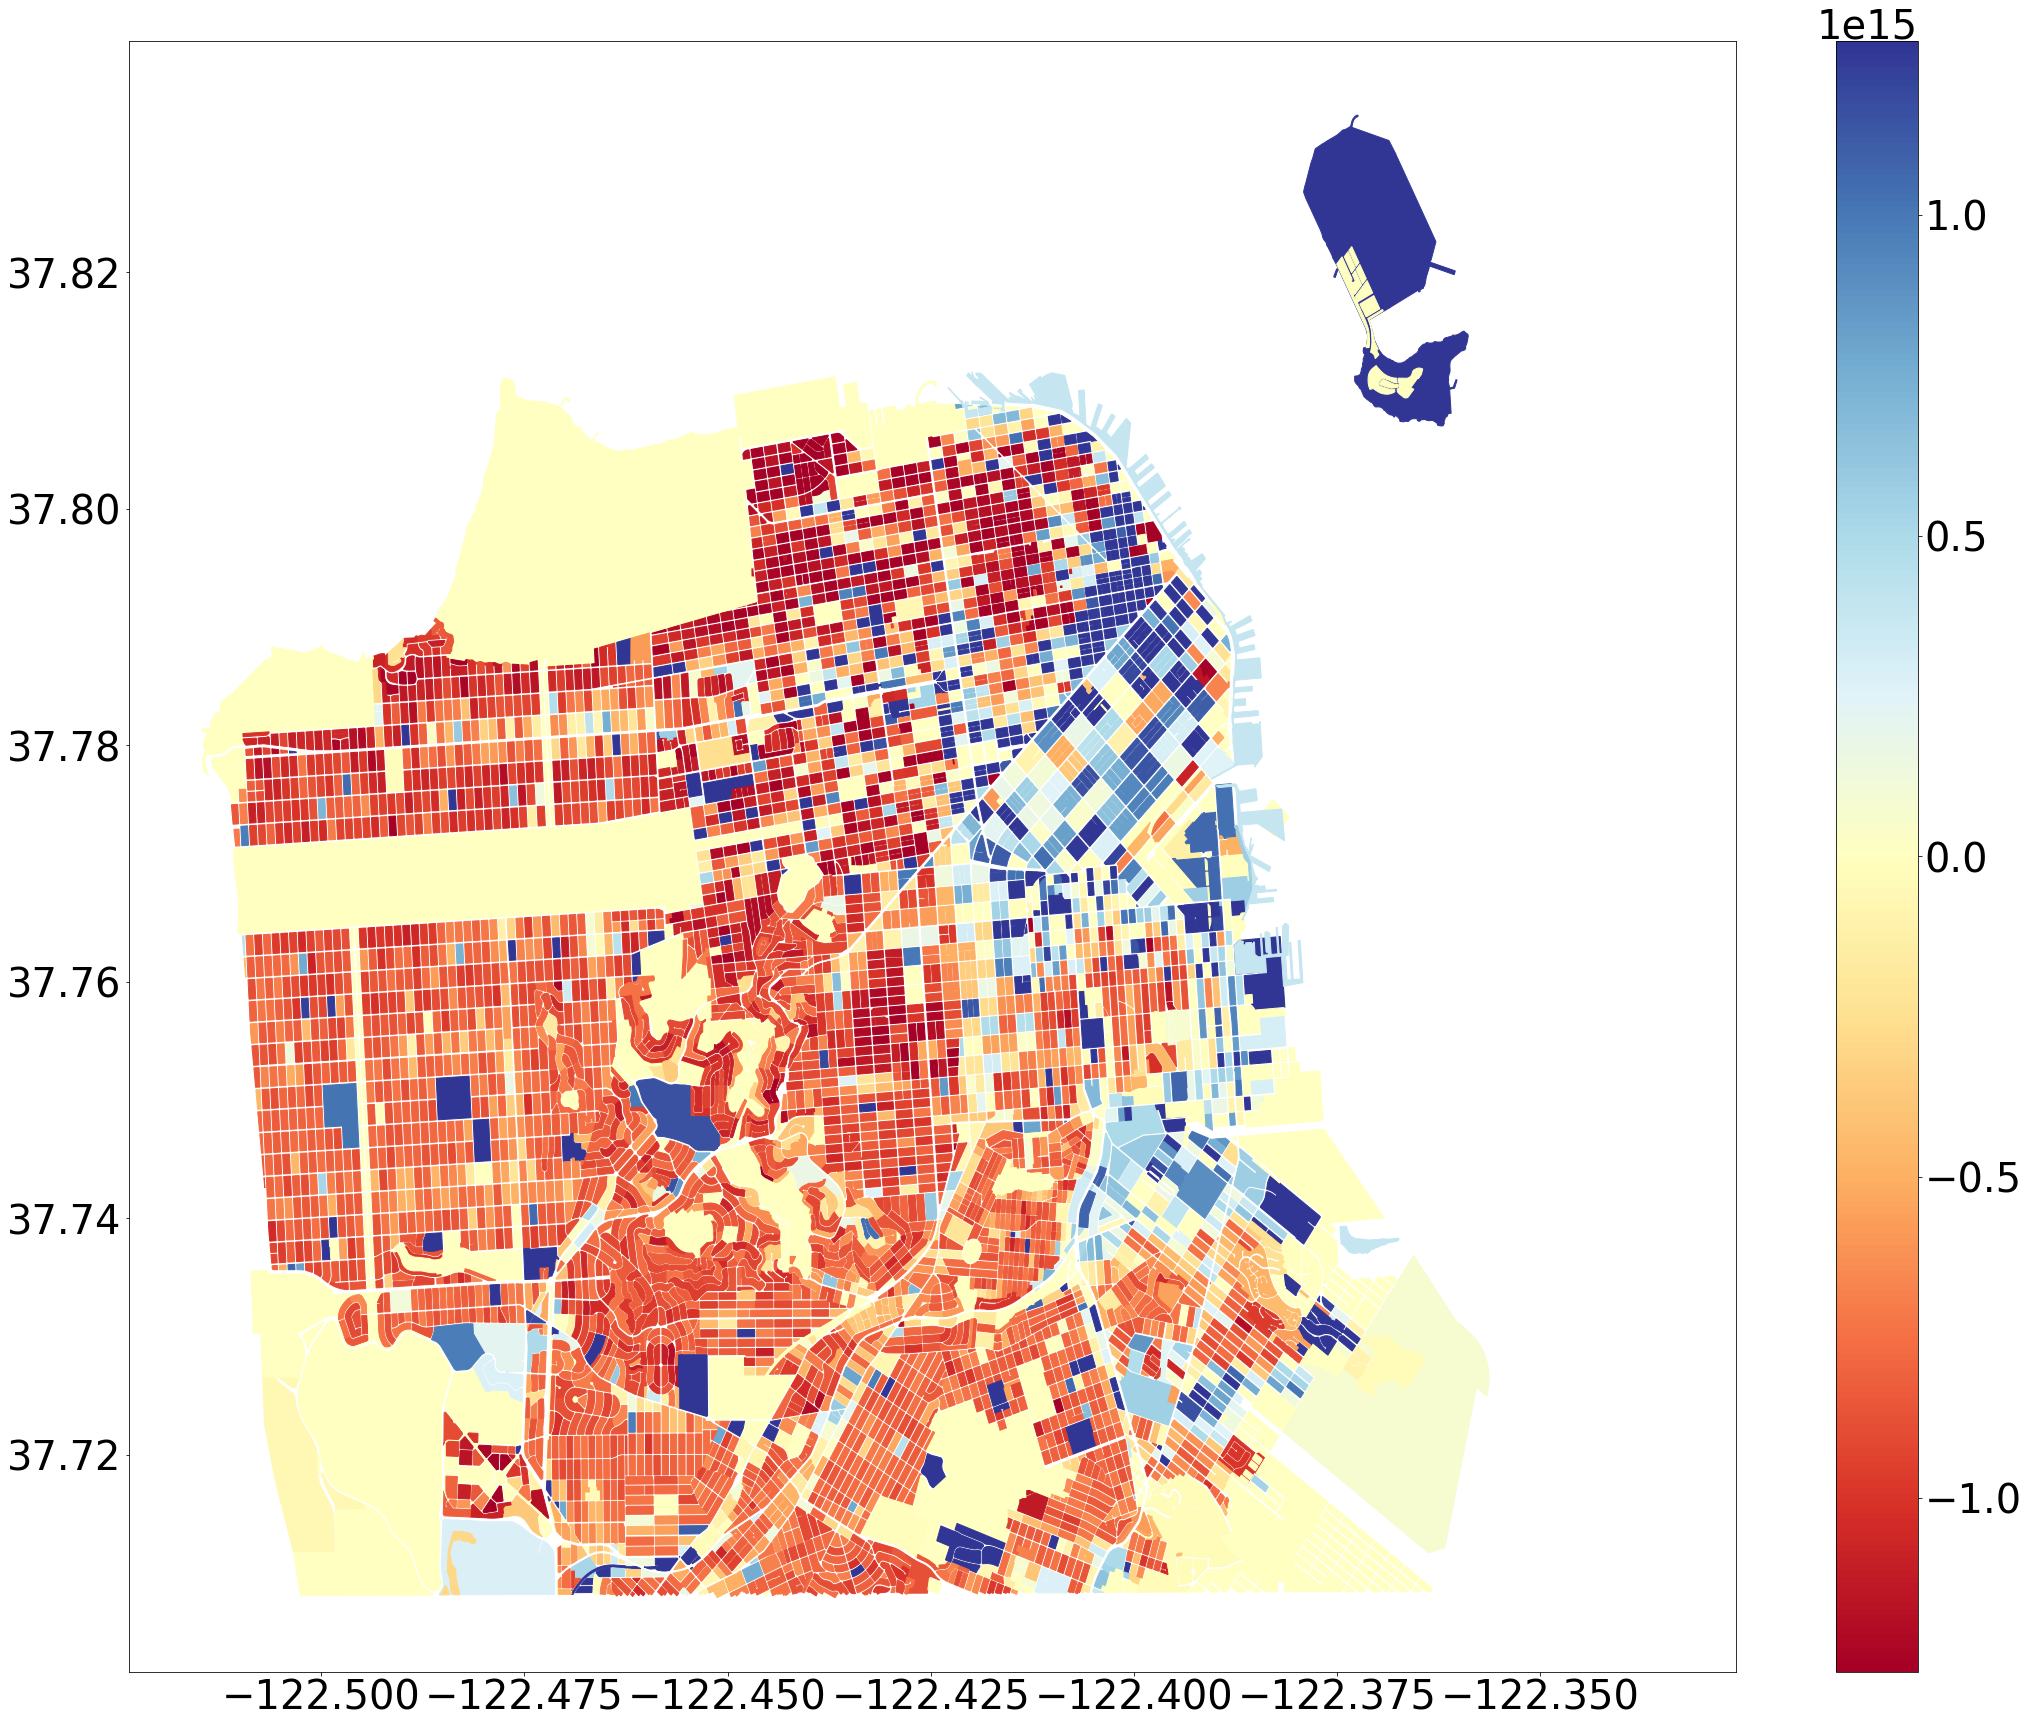

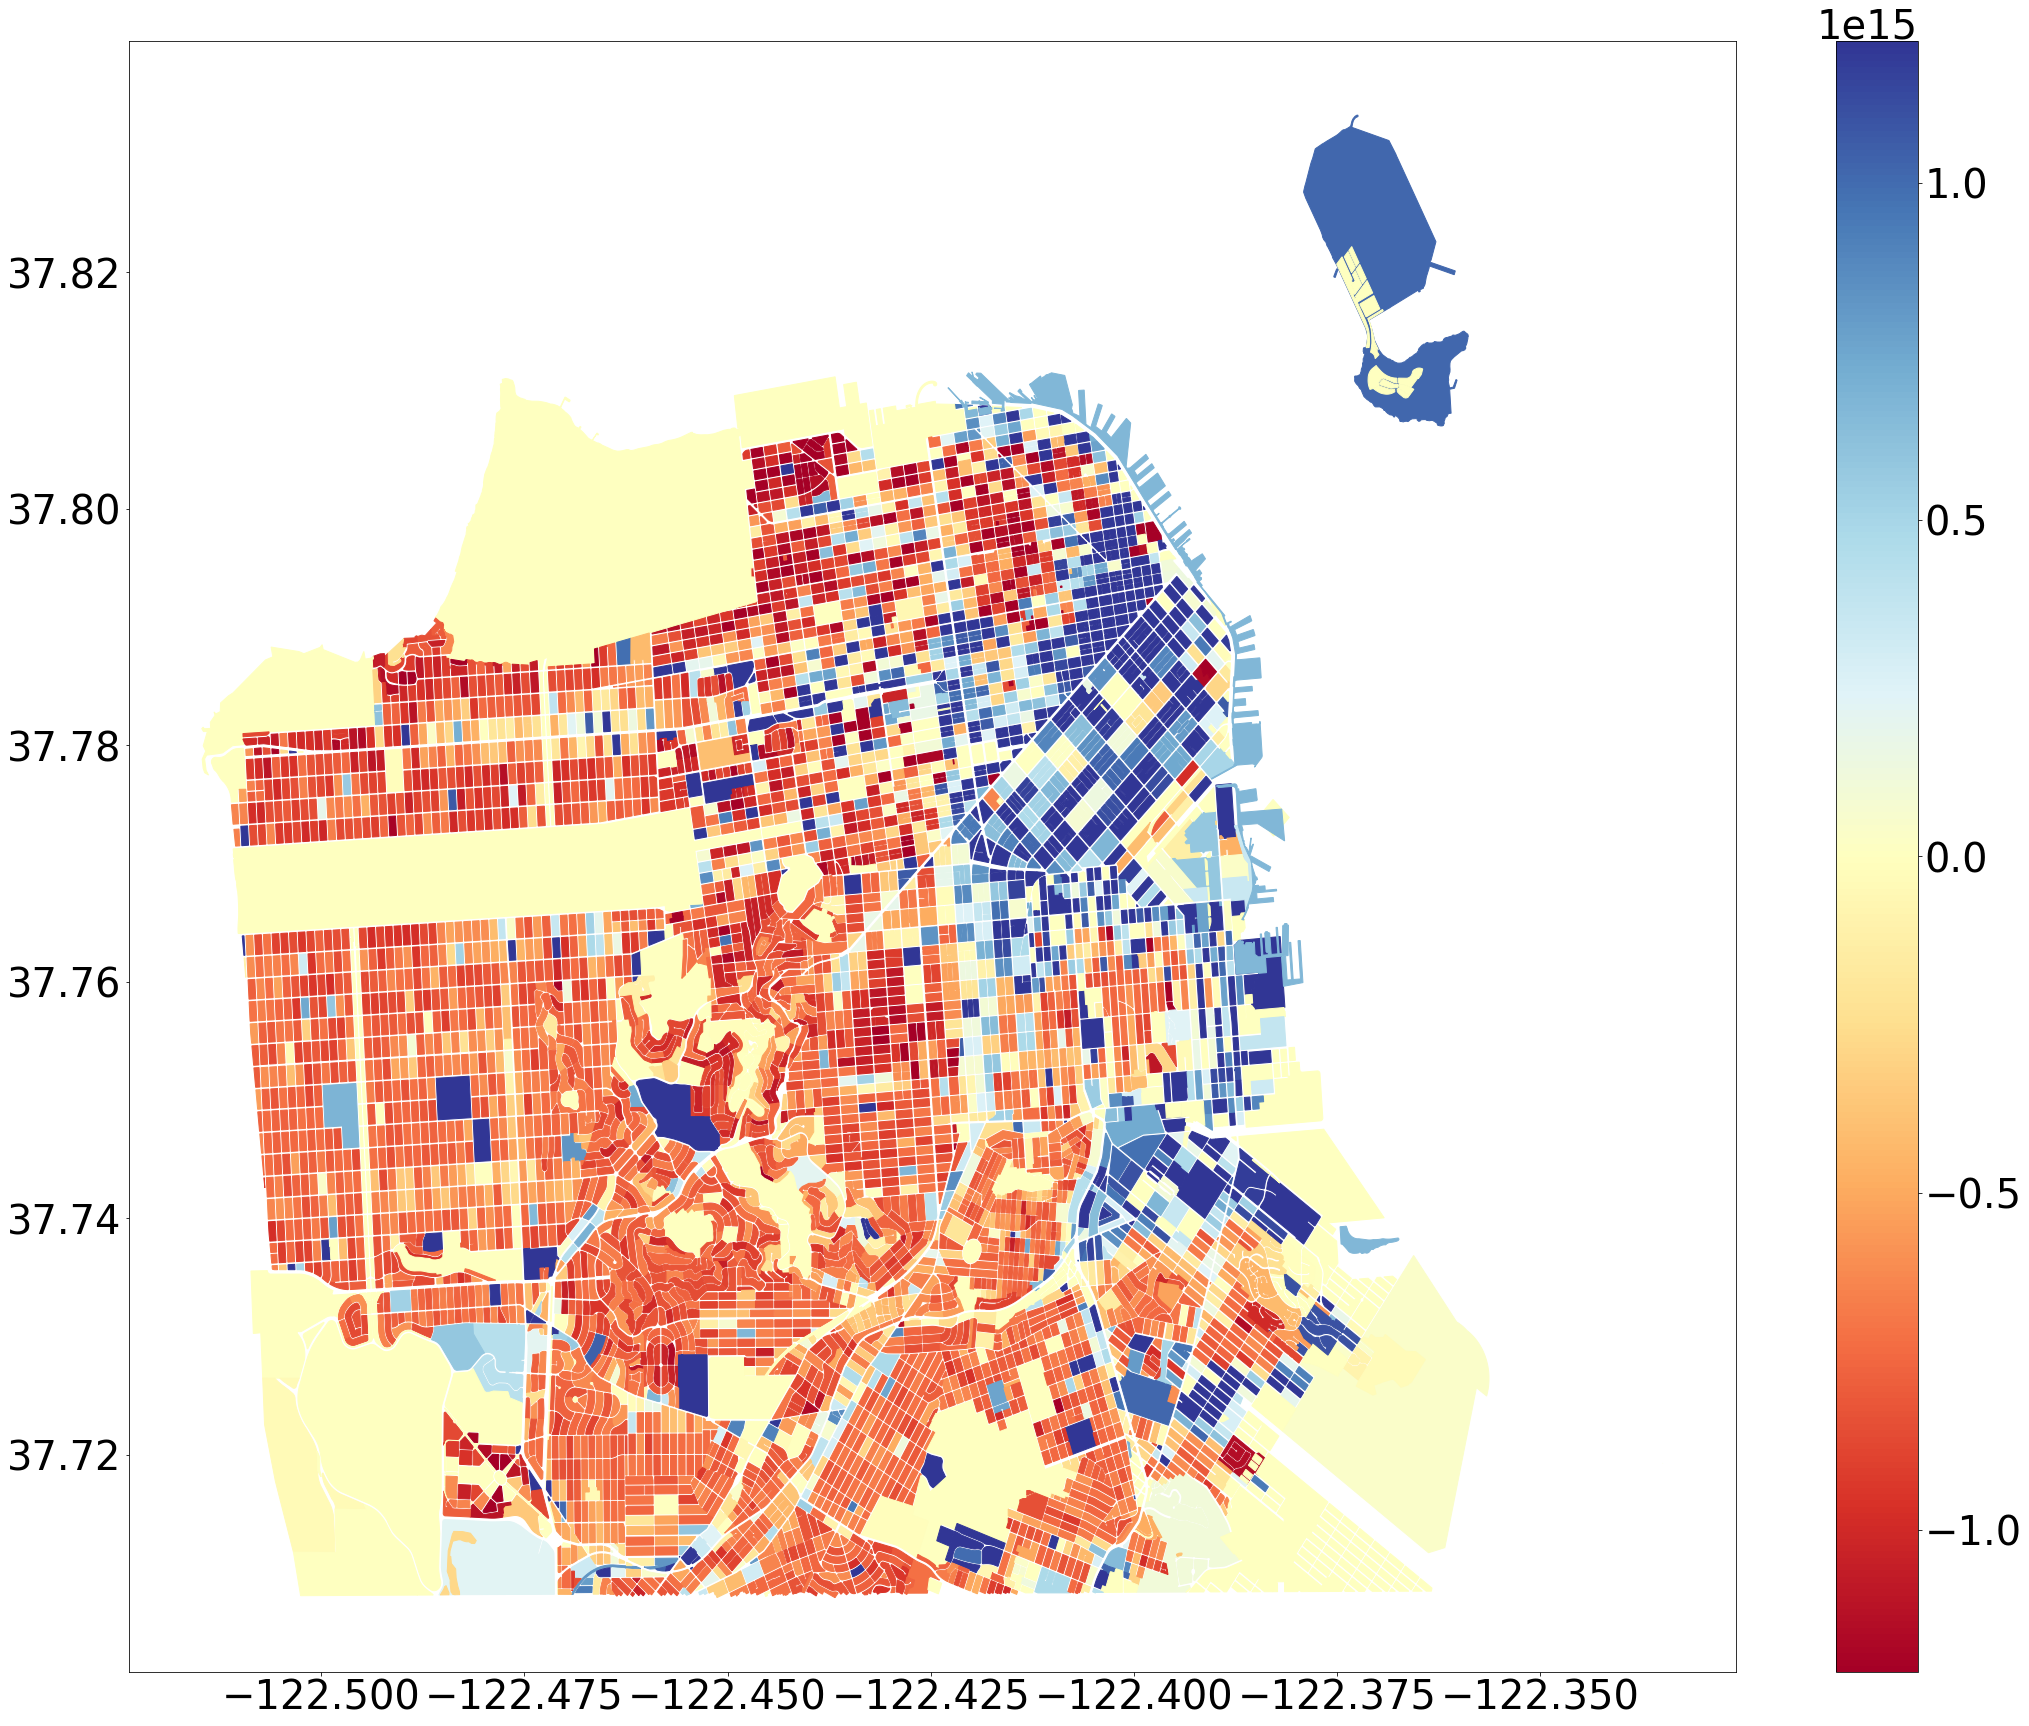

In [11]:
#plotting data
start_t = time.time()
fig1 = plt.figure(num=1, figsize=[36.0, 30.0])
plt.rcParams.update({'font.size': 40})
cmap = plt.cm.RdYlBu

list_areadmd = [0] * len(list_multipolygon)
for i in range(0, len(list_multipolygon)):
    list_areadmd[i] = list_blockdemand[i] / list_multipolygon[i].area
norm = plt.Normalize(0.15*max(min(list_areadmd), -1*max(list_areadmd)), 0.15*min(max(list_areadmd), -1*min(list_areadmd)))
#norm = plt.Normalize(min(list_areadmd), max(list_areadmd))
for i in range(0, len(list_multipolygon)):
    mpoly = list_multipolygon[i]
    dmd = list_areadmd[i]
    if mpoly.geom_type == 'MultiPolygon':
        for polygon in mpoly:
            x,y = polygon.exterior.xy
            #plt.plot(x,y)
            plt.fill(x,y, color=cmap(norm(dmd)))
    elif mpoly.geom_type == 'Polygon':
        x,y = mpoly.exterior.xy
        #plt.plot(x,y)
        plt.fill(x,y, color=cmap(norm(dmd)))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(list_areadmd)
fig1.colorbar(sm)
plt.savefig('block_demand_map.png')


fig2 = plt.figure(num=2, figsize=[36.0, 30.0])
plt.rcParams.update({'font.size': 40})
cmap = plt.cm.RdYlBu

list_areadmd = [0] * len(list_multipolygon)
for i in range(0, len(list_multipolygon)):
    list_areadmd[i] = list_blockdemand_rnd[i] / list_multipolygon[i].area
norm = plt.Normalize(0.15*max(min(list_areadmd), -1*max(list_areadmd)), 0.15*min(max(list_areadmd), -1*min(list_areadmd)))
#norm = plt.Normalize(min(list_areadmd), max(list_areadmd))
for i in range(0, len(list_multipolygon)):
    mpoly = list_multipolygon[i]
    dmd = list_areadmd[i]
    if mpoly.geom_type == 'MultiPolygon':
        for polygon in mpoly:
            x,y = polygon.exterior.xy
            #plt.plot(x,y)
            plt.fill(x,y, color=cmap(norm(dmd)))
    elif mpoly.geom_type == 'Polygon':
        x,y = mpoly.exterior.xy
        #plt.plot(x,y)
        plt.fill(x,y, color=cmap(norm(dmd)))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(list_areadmd)
fig2.colorbar(sm)
plt.savefig('block_demand_map_rnd.png')

end_t = time.time()
time_s = (end_t - start_t)
print('Plotting figures:',round(time_s, 4),'s')